In [1]:
import tarfile
import matplotlib.pyplot as plt
import matplotlib  #ajustar
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from tensorflow.keras.optimizers import SGD
import metrics
from sklearn.preprocessing import OneHotEncoder
import idx2numpy
import csv

import import_ipynb
from utils import *
from autoencoder_and_clustering_models import *

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from autoencoder_and_clustering_models.ipynb


In [2]:
def read_preprocess_dataset( indexes_train, indexes_val = np.empty(0)):

    file = 'D:\\Luiza\\OneDrive\\Documentos\\Doutorado\\MeusProjetos\\cifar_10_kmeans\\train-images-idx3-ubyte\\train-images.idx3-ubyte'
    img_train_val = idx2numpy.convert_from_file(file)

    file = 'D:\\Luiza\\OneDrive\\Documentos\\Doutorado\\MeusProjetos\\cifar_10_kmeans\\t10k-images-idx3-ubyte\\t10k-images.idx3-ubyte'
    img_test = idx2numpy.convert_from_file(file)

    file = 'D:\\Luiza\\OneDrive\\Documentos\\Doutorado\\MeusProjetos\\cifar_10_kmeans\\train-labels-idx1-ubyte\\train-labels.idx1-ubyte'
    target_train_val = idx2numpy.convert_from_file(file)

    file = 'D:\\Luiza\\OneDrive\\Documentos\\Doutorado\\MeusProjetos\\cifar_10_kmeans\\t10k-labels-idx1-ubyte\\t10k-labels.idx1-ubyte'
    target_test = idx2numpy.convert_from_file(file)
    
    
    indexes_train = indexes_train.astype(int)
    indexes_val = indexes_val.astype(int)
    
    data_train_val = np.expand_dims(img_train_val, axis=3)
    data_test = np.expand_dims(img_test, axis=3)

    data_train_val = data_train_val/255
    data_test = data_test/255
    
    
    if indexes_val.size==0:
        data_train = data_train_val
        target_train = target_train_val
        
        return data_train, data_test, target_train, target_test
    
    else:
        data_train = data_train_val[indexes_train]
        target_train = target_train_val[indexes_train]
        
        data_val = data_train_val[indexes_val]
        target_val = target_train_val[indexes_val]
        
        return data_train, data_val, data_test, target_train, target_val, target_test
    
    

In [4]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\cifar_10_kmeans\\mnist_aux_encoder_model_train_encode1_0.h5'
model, model_encoder = deep_clustering_model(arq_path , input_shape = (28,28,1))

model_encoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        1600      
_________________________________________________________________
AC_0 (Activation)            (None, 28, 28, 32)        0         
_________________________________________________________________
BN_0 (BatchNormalization)    (None, 28, 28, 32)        128       
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 16)        12816     
_________________________________________________________________
AC_1 (Activation)            (None, 14, 14, 16)        0         
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 14, 14, 16)       

In [4]:
with open(arq_path+"\crossValidation_indexes.csv", newline='') as f:
    list_indexes = csv.reader(f)
    list_indexes = list(list(rec) for rec in csv.reader(f, delimiter=','))
list_indexes = (np.array(list_indexes)).astype(int)


i_crossVal = 0
i_train = np.array([w for w in range(5) if not w == i_crossVal])
indexes_val = list_indexes[i_crossVal]
indexes_train = np.empty(0)
for i in range(len(i_train)):
    indexes_train = np.concatenate ((indexes_train, list_indexes[i_train[i]]), axis=0 )
indexes_val = np.array(indexes_val)
indexes_train = np.array(indexes_train)

data_train, data_val, data_test, label_train, label_val, label_test = read_preprocess_dataset( indexes_train, indexes_val ) 

n_clusters = 10

kmeans = KMeans(n_clusters = n_clusters,max_iter=300, n_init=10,algorithm='full', verbose=1)
kmeans.fit(data_train.reshape((len(data_train),-1)))  # Train K-Means.
y_pred_kmeans = kmeans.predict(data_test.reshape((len(data_test),-1)))  



Initialization complete
Iteration  0, inertia 3227500.802
Iteration  1, inertia 2000336.870
Iteration  2, inertia 1941617.453
Iteration  3, inertia 1919245.434
Iteration  4, inertia 1908810.581
Iteration  5, inertia 1902609.886
Iteration  6, inertia 1898414.215
Iteration  7, inertia 1895452.911
Iteration  8, inertia 1893279.870
Iteration  9, inertia 1891717.600
Iteration 10, inertia 1890514.982
Iteration 11, inertia 1889744.972
Iteration 12, inertia 1889333.684
Iteration 13, inertia 1889084.740
Iteration 14, inertia 1888896.241
Iteration 15, inertia 1888741.382
Iteration 16, inertia 1888588.148
Iteration 17, inertia 1888424.528
Iteration 18, inertia 1888235.031
Iteration 19, inertia 1887988.740
Iteration 20, inertia 1887735.040
Iteration 21, inertia 1887492.347
Iteration 22, inertia 1887267.631
Iteration 23, inertia 1887102.687
Iteration 24, inertia 1886943.016
Iteration 25, inertia 1886750.526
Iteration 26, inertia 1886566.821
Iteration 27, inertia 1886395.347
Iteration 28, inertia 18

Iteration 37, inertia 1885939.303
Iteration 38, inertia 1885338.548
Iteration 39, inertia 1884837.926
Iteration 40, inertia 1884437.637
Iteration 41, inertia 1884112.727
Iteration 42, inertia 1883887.754
Iteration 43, inertia 1883651.224
Iteration 44, inertia 1883443.740
Iteration 45, inertia 1883258.645
Iteration 46, inertia 1883067.186
Iteration 47, inertia 1882837.771
Iteration 48, inertia 1882590.494
Iteration 49, inertia 1882396.386
Iteration 50, inertia 1882225.874
Iteration 51, inertia 1882125.581
Iteration 52, inertia 1882040.285
Iteration 53, inertia 1881995.871
Iteration 54, inertia 1881978.941
Iteration 55, inertia 1881965.475
Iteration 56, inertia 1881959.542
Iteration 57, inertia 1881958.087
Iteration 58, inertia 1881957.443
Iteration 59, inertia 1881957.170
Iteration 60, inertia 1881956.934
Iteration 61, inertia 1881956.850
Converged at iteration 61: center shift 0.000000e+00 within tolerance 6.727540e-06
Initialization complete
Iteration  0, inertia 3186604.885
Iteration

Iteration  8, inertia 1908495.219
Iteration  9, inertia 1901949.665
Iteration 10, inertia 1896816.113
Iteration 11, inertia 1892726.514
Iteration 12, inertia 1889656.164
Iteration 13, inertia 1887107.599
Iteration 14, inertia 1885143.725
Iteration 15, inertia 1883871.893
Iteration 16, inertia 1883229.394
Iteration 17, inertia 1882890.595
Iteration 18, inertia 1882661.080
Iteration 19, inertia 1882498.544
Iteration 20, inertia 1882375.472
Iteration 21, inertia 1882286.038
Iteration 22, inertia 1882215.264
Iteration 23, inertia 1882158.350
Iteration 24, inertia 1882108.597
Iteration 25, inertia 1882070.500
Iteration 26, inertia 1882039.401
Iteration 27, inertia 1882018.486
Iteration 28, inertia 1881999.155
Iteration 29, inertia 1881985.872
Iteration 30, inertia 1881975.382
Iteration 31, inertia 1881969.960
Iteration 32, inertia 1881965.932
Iteration 33, inertia 1881964.268
Iteration 34, inertia 1881963.284
Iteration 35, inertia 1881962.342
Iteration 36, inertia 1881960.592
Iteration 37, 

Initialization complete
Iteration  0, inertia 3064545.198
Iteration  1, inertia 1997207.579
Iteration  2, inertia 1950794.459
Iteration  3, inertia 1926067.941
Iteration  4, inertia 1913035.963
Iteration  5, inertia 1904452.912
Iteration  6, inertia 1897305.775
Iteration  7, inertia 1891635.176
Iteration  8, inertia 1888138.092
Iteration  9, inertia 1886305.518
Iteration 10, inertia 1885334.867
Iteration 11, inertia 1884784.646
Iteration 12, inertia 1884446.332
Iteration 13, inertia 1884214.874
Iteration 14, inertia 1884040.959
Iteration 15, inertia 1883867.981
Iteration 16, inertia 1883711.291
Iteration 17, inertia 1883588.315
Iteration 18, inertia 1883485.388
Iteration 19, inertia 1883380.597
Iteration 20, inertia 1883278.810
Iteration 21, inertia 1883195.496
Iteration 22, inertia 1883143.951
Iteration 23, inertia 1883108.134
Iteration 24, inertia 1883079.746
Iteration 25, inertia 1883059.926
Iteration 26, inertia 1883038.949
Iteration 27, inertia 1883015.819
Iteration 28, inertia 18

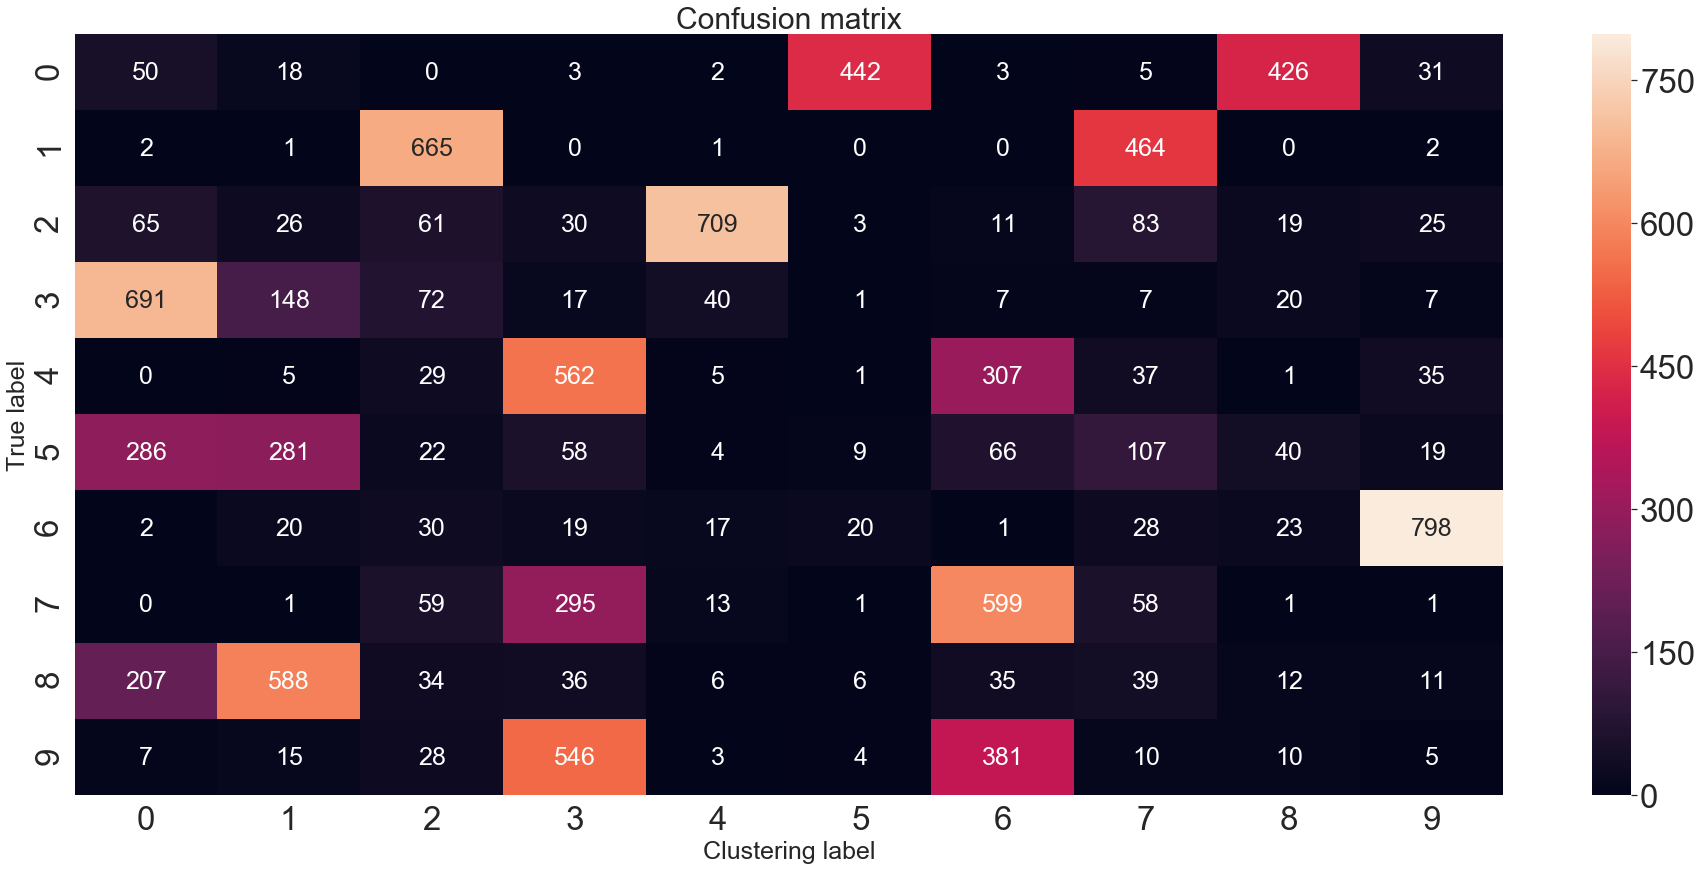

Accuracy =  59.440000000000005  - Error =  40.56


In [5]:
from utils import *

n_classes = 10
confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_test), n_classes = n_classes, n_clusters = n_clusters )
plot_cm(confusion_matrix)
acc,err = accuracy(n_clusters, confusion_matrix)
print('Accuracy = ',acc*100,' - Error = ',err*100)



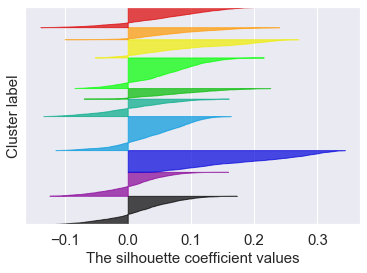

In [6]:
silhouette_avg = silhouette_score(data_test.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
sample_silhouette_values = silhouette_samples(data_test.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
silhouette_plot(np.squeeze(y_pred_kmeans),silhouette_avg, sample_silhouette_values, n_clusters)



 
 
	 	 	 Results Validated with Batch  0  Dataset



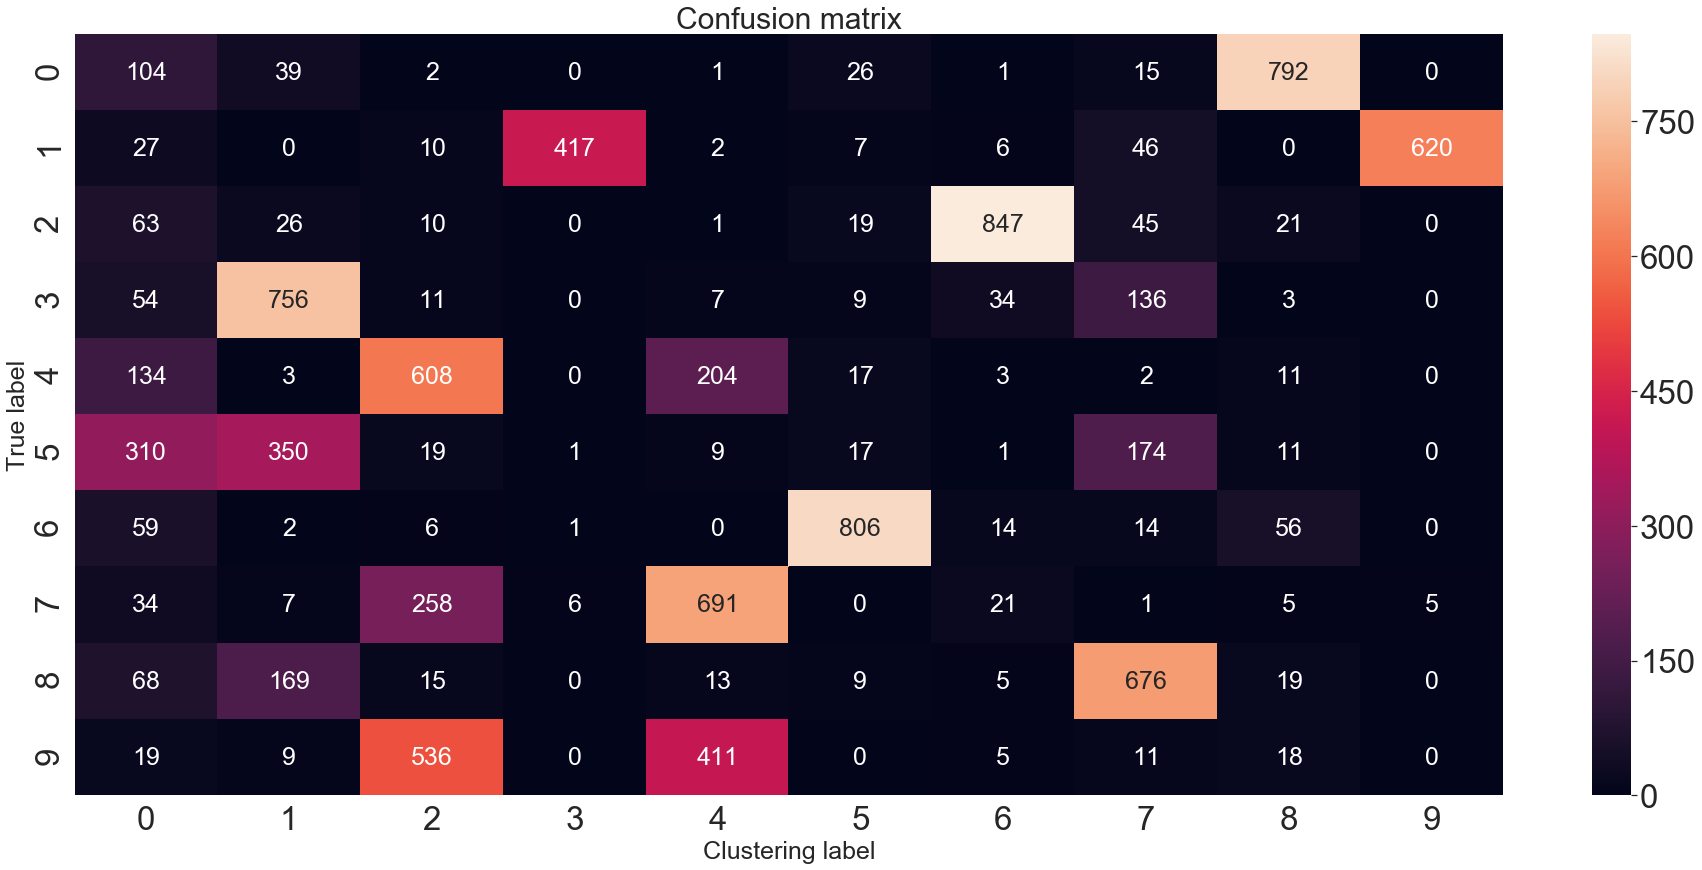

Accuracy =  65.23  - Error =  34.77




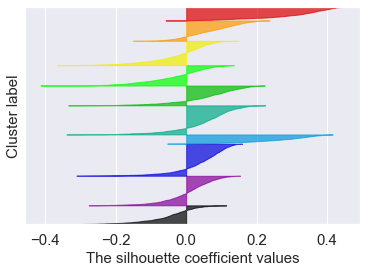


 
 
	 	 	 Results Validated with Batch  1  Dataset



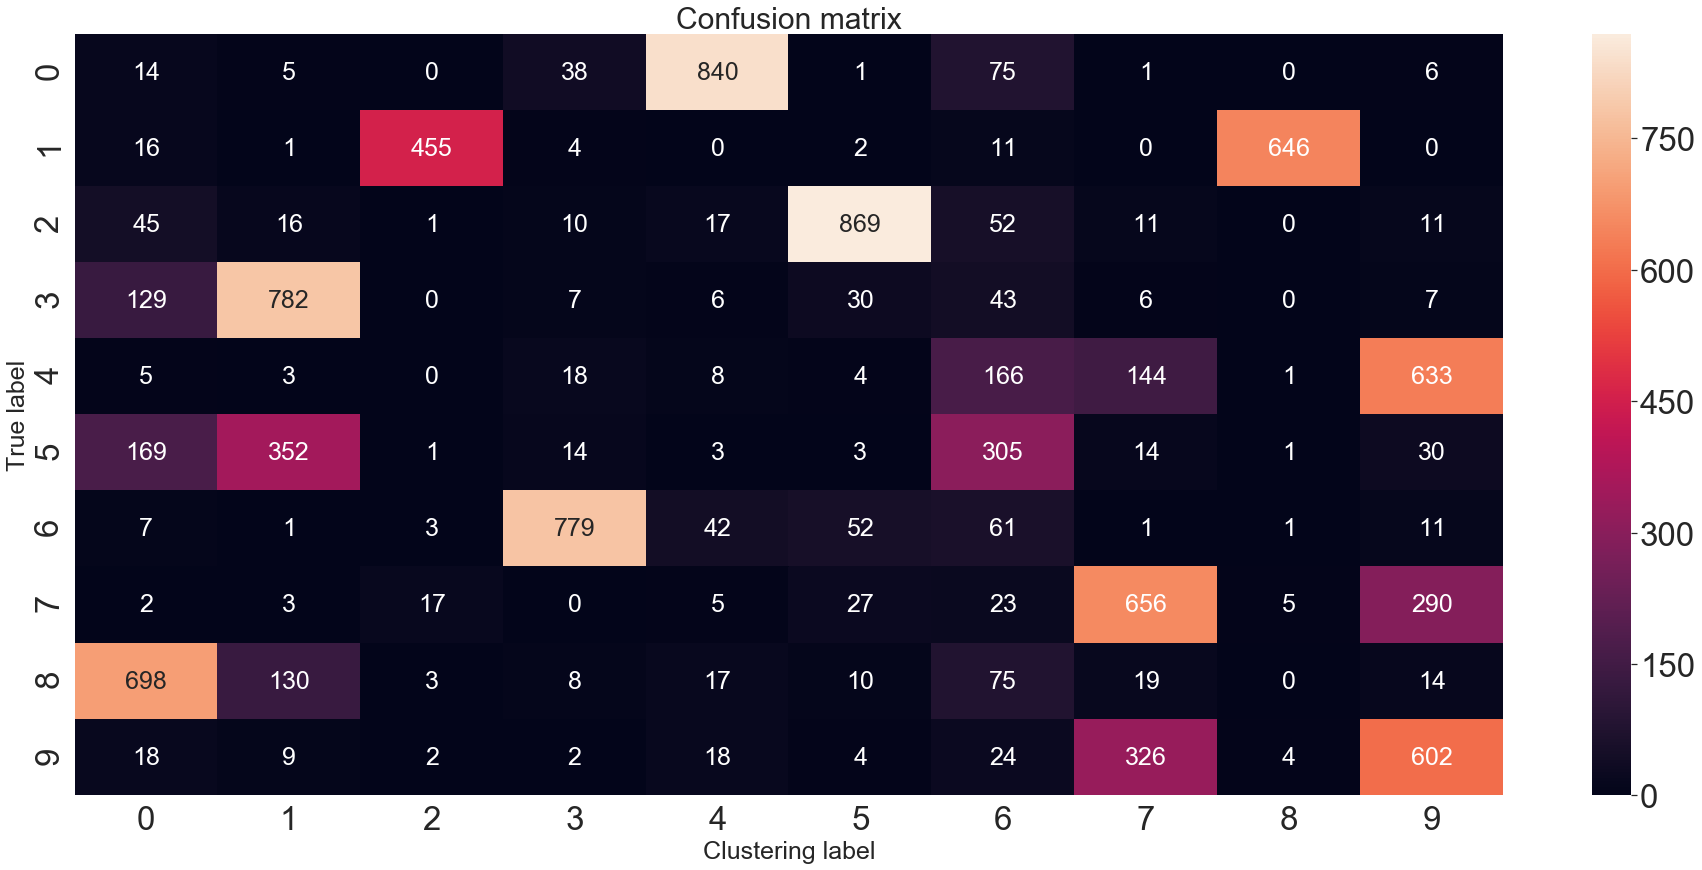

Accuracy =  66.63  - Error =  33.37




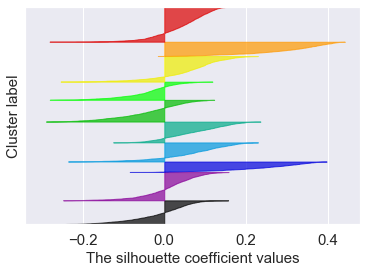


 
 
	 	 	 Results Validated with Batch  2  Dataset



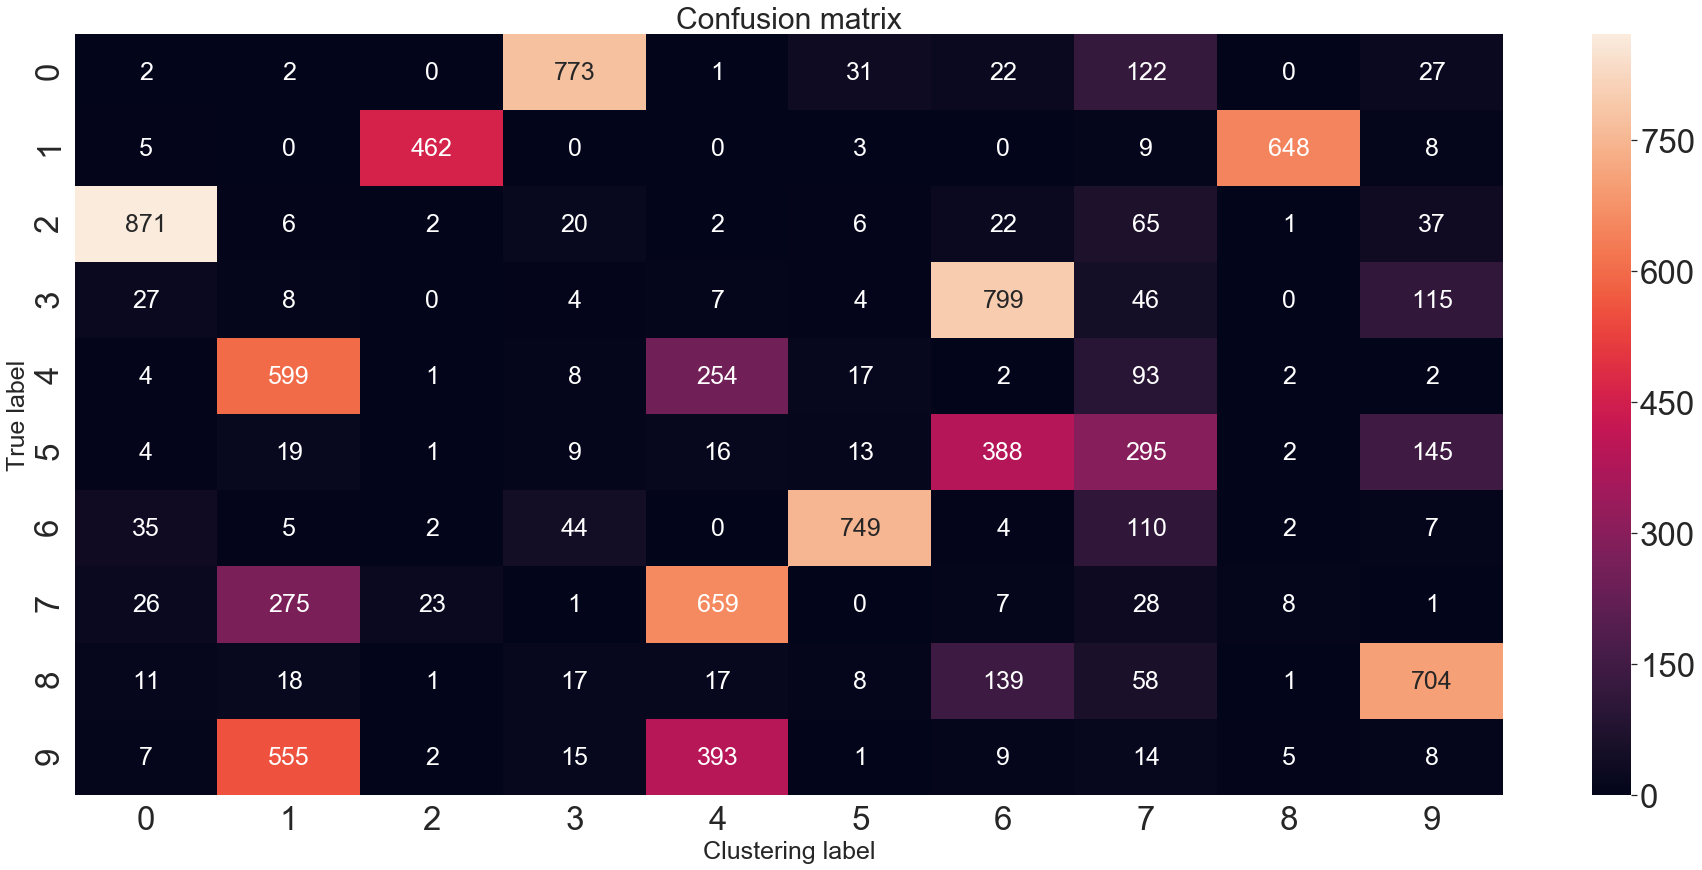

Accuracy =  65.59  - Error =  34.410000000000004




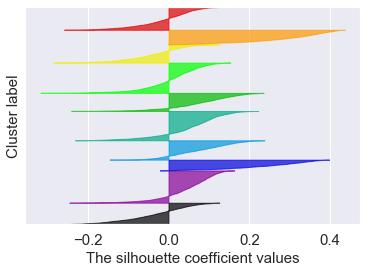


 
 
	 	 	 Results Validated with Batch  3  Dataset



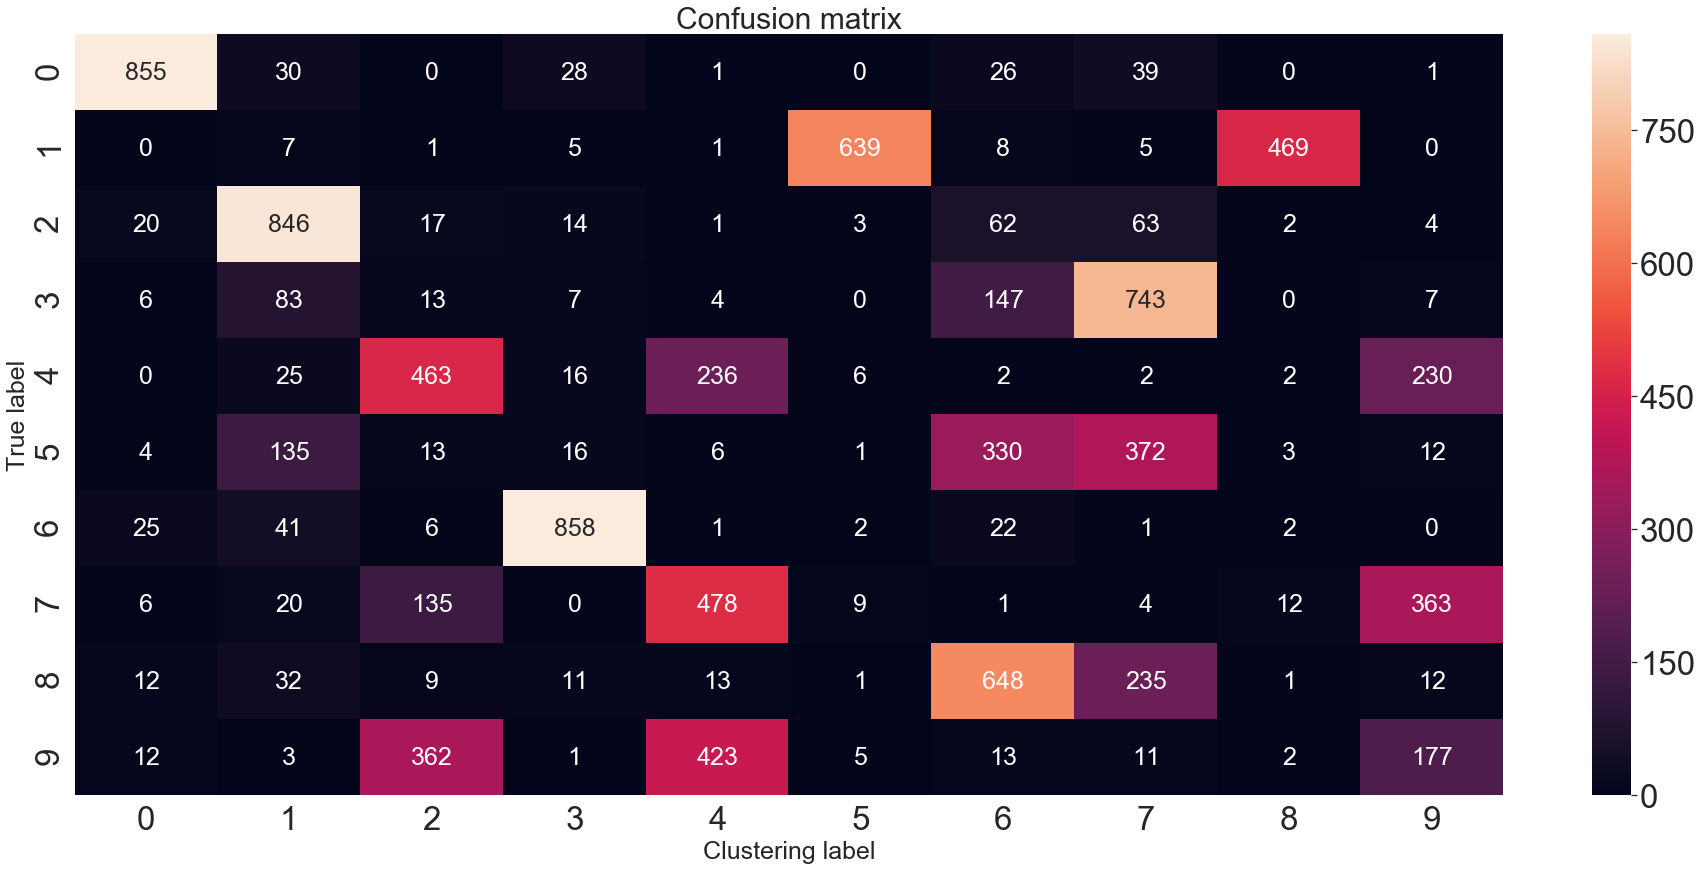

Accuracy =  63.62  - Error =  36.38




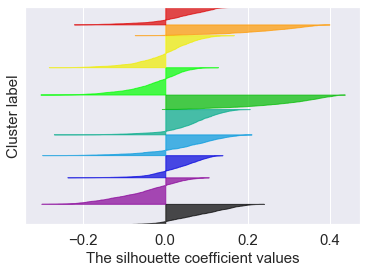


 
 
	 	 	 Results Validated with Batch  4  Dataset



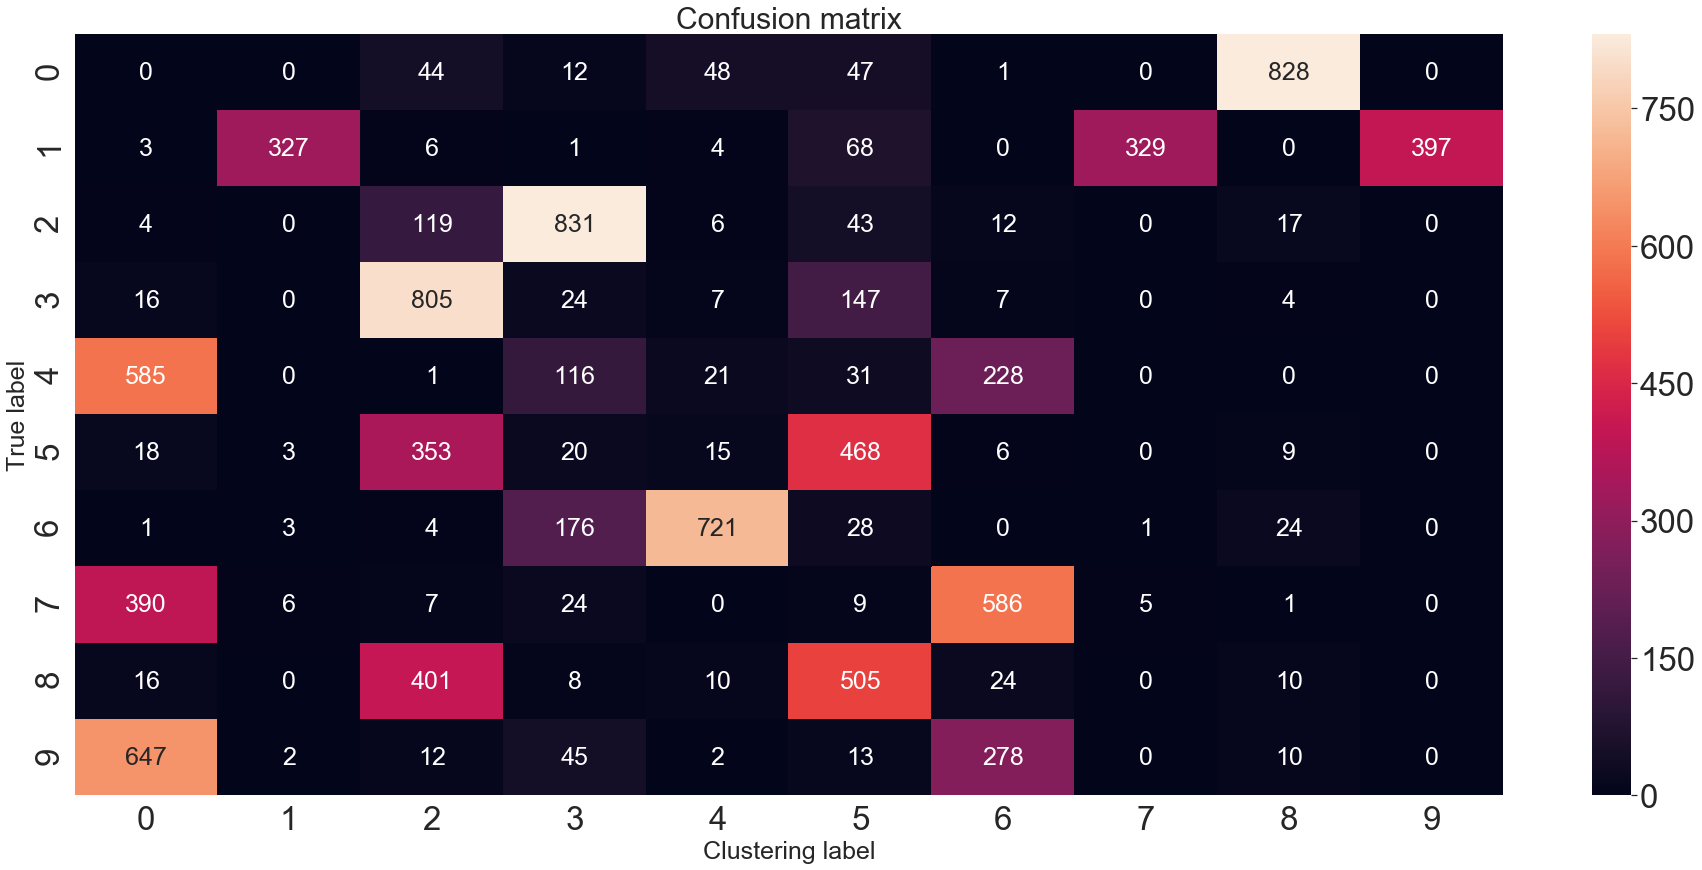

Accuracy =  59.760000000000005  - Error =  40.239999999999995




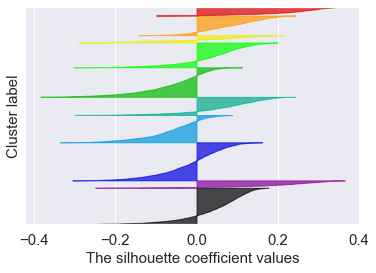

The Mean Test Accuracy for the Cross-Validation =  0.64166  - with Standard Deviation =  0.024059143791914123


In [8]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\mnist'

with open(arq_path+"\crossValidation_indexes.csv", newline='') as f:
    list_indexes = csv.reader(f)
    list_indexes = list(list(rec) for rec in csv.reader(f, delimiter=','))
list_indexes = (np.array(list_indexes)).astype(int)

test_accuracy = np.zeros((5))

for i_crossVal in range(5):
    
    print('\n \n ')
    print('\t \t \t Results Validated with Batch ', i_crossVal, ' Dataset\n')
    
    i_train = np.array([w for w in range(5) if not w == i_crossVal])
    indexes_val = list_indexes[i_crossVal]
    indexes_train = np.empty(0)
    for i in range(len(i_train)):
        indexes_train = np.concatenate ((indexes_train, list_indexes[i_train[i]]), axis=0 )
    indexes_val = np.array(indexes_val)
    indexes_train = np.array(indexes_train)
    data_train, data_val, data_test, label_train, label_val, label_test = read_preprocess_dataset( indexes_train, indexes_val ) 



    model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_'+str(i_crossVal)+'.h5', input_shape = (28,28,1))
    
    
    y_hat_train = model_encoder.predict( data_train )
    y_hat_test = model_encoder.predict( data_test )
    
    
    kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=10,algorithm='full', verbose=0)
    kmeans.fit(y_hat_train)  # Train K-Means.
    y_pred_kmeans = kmeans.predict(y_hat_test)  

    confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_test), n_classes=n_classes, n_clusters=n_clusters )
    plot_cm(confusion_matrix)
    test_accuracy[i_crossVal],err = accuracy(n_clusters, confusion_matrix)
    print('Accuracy = ',test_accuracy[i_crossVal]*100,' - Error = ',err*100)
    
    
    print ('\n')
    
    silhouette_avg = silhouette_score(data_test.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    sample_silhouette_values = silhouette_samples(data_test.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    silhouette_plot(np.squeeze(y_pred_kmeans),silhouette_avg, sample_silhouette_values, n_clusters)
    plt.show()
    
test_accuracy_mean = np.mean(test_accuracy)
test_accuracy_std = np.std(test_accuracy)

print('The Mean Test Accuracy for the Cross-Validation = ', test_accuracy_mean, ' - with Standard Deviation = ', test_accuracy_std)
    

D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 0: acc = 0.78758, nmi = 0.72854, ari = 0.66073  ; loss= 0


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 140: acc = 0.80229, nmi = 0.75154, ari = 0.68367  ; loss= 0.05705


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 280: acc = 0.80960, nmi = 0.76659, ari = 0.69633  ; loss= 0.13475


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 420: acc = 0.81775, nmi = 0.78224, ari = 0.70804  ; loss= 0.15852


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 560: acc = 0.82596, nmi = 0.79342, ari = 0.72491  ; loss= 0.16207


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 700: acc = 0.83260, nmi = 0.80178, ari = 0.73770  ; loss= 0.18593


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 840: acc = 0.84031, nmi = 0.81158, ari = 0.75347  ; loss= 0.19665


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 980: acc = 0.84154, nmi = 0.81476, ari = 0.75743  ; loss= 0.19046


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 1120: acc = 0.84619, nmi = 0.82179, ari = 0.76519  ; loss= 0.14646


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 1260: acc = 0.85250, nmi = 0.82720, ari = 0.77743  ; loss= 0.18984


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 1400: acc = 0.85377, nmi = 0.83009, ari = 0.78058  ; loss= 0.15173


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 1540: acc = 0.11233, nmi = -2.87500, ari = 0.00000  ; loss= 0.16777


D:\Programas\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
D:\Programas\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 1680: acc = 0.11233, nmi = -2.87500, ari = 0.00000  ; loss= 0.01096
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.


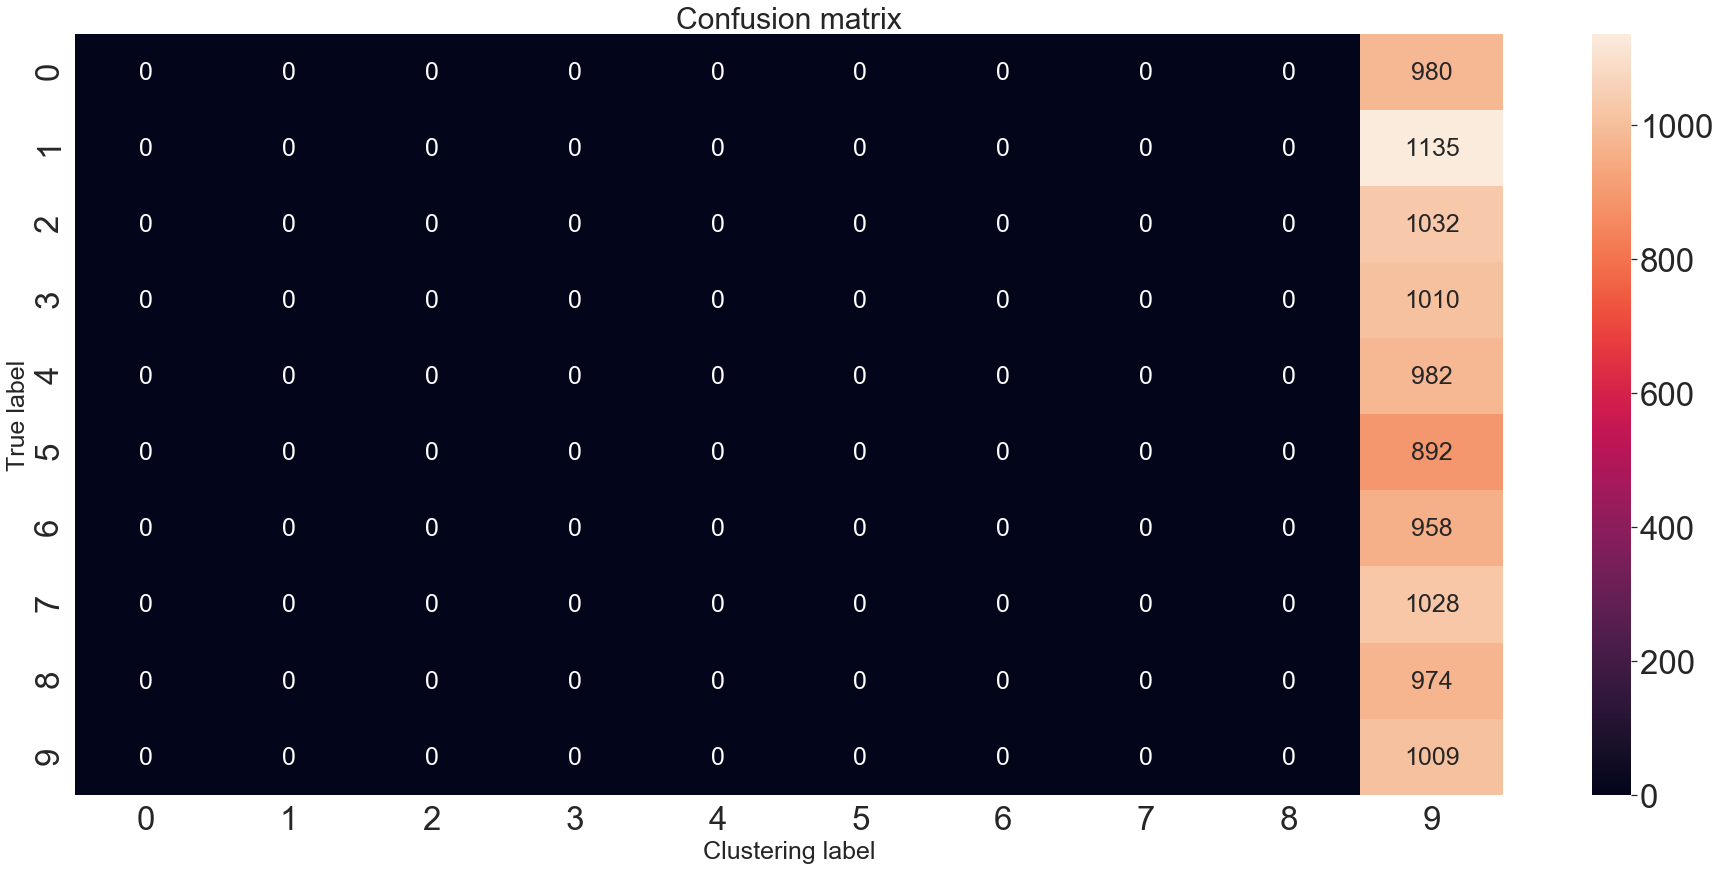

Accuracy =  11.35
Error =  88.64999999999999


ValueError: cannot reshape array of size 37632000 into shape (10000,newaxis)

In [8]:



n_clusters = 10
n_classes = 10

arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\mnist_rev2'
arq_path_2 = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\mnist'

with open(arq_path+"\crossValidation_indexes.csv", newline='') as f:
    list_indexes = csv.reader(f)
    list_indexes = list(list(rec) for rec in csv.reader(f, delimiter=','))
list_indexes = (np.array(list_indexes)).astype(int)

for i_crossVal in range(5):
    
    i_train = np.array([w for w in range(5) if not w == i_crossVal])

    i_train = np.array([w for w in range(5) if not w == i_crossVal])
    indexes_val = list_indexes[i_crossVal]
    indexes_train = np.empty(0)
    for i in range(len(i_train)):
        indexes_train = np.concatenate ((indexes_train, list_indexes[i_train[i]]), axis=0 )
    indexes_val = np.array(indexes_val)
    indexes_train = np.array(indexes_train)
    data_train, data_val, data_test, label_train, label_val, label_test = read_preprocess_dataset( indexes_train, indexes_val ) 

    
    model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_'+str(i_crossVal)+'.h5', input_shape = (28,28,1))
    clustering_layer = ClusteringLayer(n_clusters, name='clustering')(model_encoder.output)
    
    
    model = Model(inputs=model_encoder.input, outputs=clustering_layer)
    
    
    model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

    kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=10,algorithm='full', verbose=0)
    y_pred = kmeans.fit_predict(model_encoder.predict(data_train))


    y_pred_last = np.copy(y_pred)
    model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])


    batch_size = 32

    loss = 0
    index = 0
    maxiter = 8000
    update_interval = 140
    index_array = np.arange(data_train.shape[0])

    tol = 0.001 # tolerance threshold to stop training


    for ite in range(int(maxiter)):
        if ite % update_interval == 0:
            q = model.predict(data_train, verbose=0)
            p = target_distribution(q)  # update the auxiliary target distribution p

            # evaluate the clustering performance
            y_pred = q.argmax(1)
            if label_train is not None:
                acc = np.round(metrics.acc(np.squeeze(label_train), y_pred), 5)
                nmi = np.round(metrics.nmi(np.squeeze(label_train), y_pred), 5)
                ari = np.round(metrics.ari(np.squeeze(label_train), y_pred), 5)
                loss = np.round(loss, 5)
                print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

            # check stop criterion - model convergence
            delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
            y_pred_last = np.copy(y_pred)
            if ite > 0 and delta_label < tol:
                print('delta_label ', delta_label, '< tol ', tol)
                print('Reached tolerance threshold. Stopping training.')
                break
        idx = index_array[index * batch_size: min((index+1) * batch_size, data_train.shape[0])]
        loss = model.train_on_batch(x=data_train[idx], y=p[idx])
        index = index + 1 if (index + 1) * batch_size <= data_train.shape[0] else 0

    model.save(arq_path_2 + '\Keras_Deep_Clustering_model_'+str(i_crossVal)+'.h5')





    # evaluate the clustering performance
    q = model.predict(data_test, verbose=0)
    y_pred = q.argmax(1)
    # Evaluate the K-Means clustering accuracy.
    confusion_matrix = confusion_matrix_fn(y_pred,np.squeeze(label_train), n_classes=n_classes, n_clusters=n_clusters)
    acc,error = accuracy(n_clusters, confusion_matrix)
    plot_cm(confusion_matrix,arq=arq_path_2+'\confusioMatrix_KerasDeepClusteringModel_'+str(i_crossVal))


    print('Accuracy = ',acc*100)
    print('Error = ', error*100)

    silhouette_avg = silhouette_score(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred),metric='euclidean')
    sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred),metric='euclidean')
    silhouette_plot(np.squeeze(y_pred_kmeans),silhouette_avg, sample_silhouette_values, n_clusters)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_0 (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
AC_0 (Activation)            (None, 28, 28, 32)        0         
_________________________________________________________________
BN_0 (BatchNormalization)    (None, 28, 28, 32)        128       
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 14, 14, 16)        12816     
_________________________________________________________________
AC_1 (Activation)            (None, 14, 14, 16)        0     

y_features shape:  (48000, 128)
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
AC_0 (Activation)            (None, 28, 28, 32)        0         
_________________________________________________________________
BN_0 (BatchNormalization)    (None, 28, 28, 32)        128       
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 14, 14, 16)        12816     
_________________________________________________________________
AC_1 (Activation)            (None, 14, 14, 16)        0         
_________________________________________________________________
BN_1 (BatchNormalizat

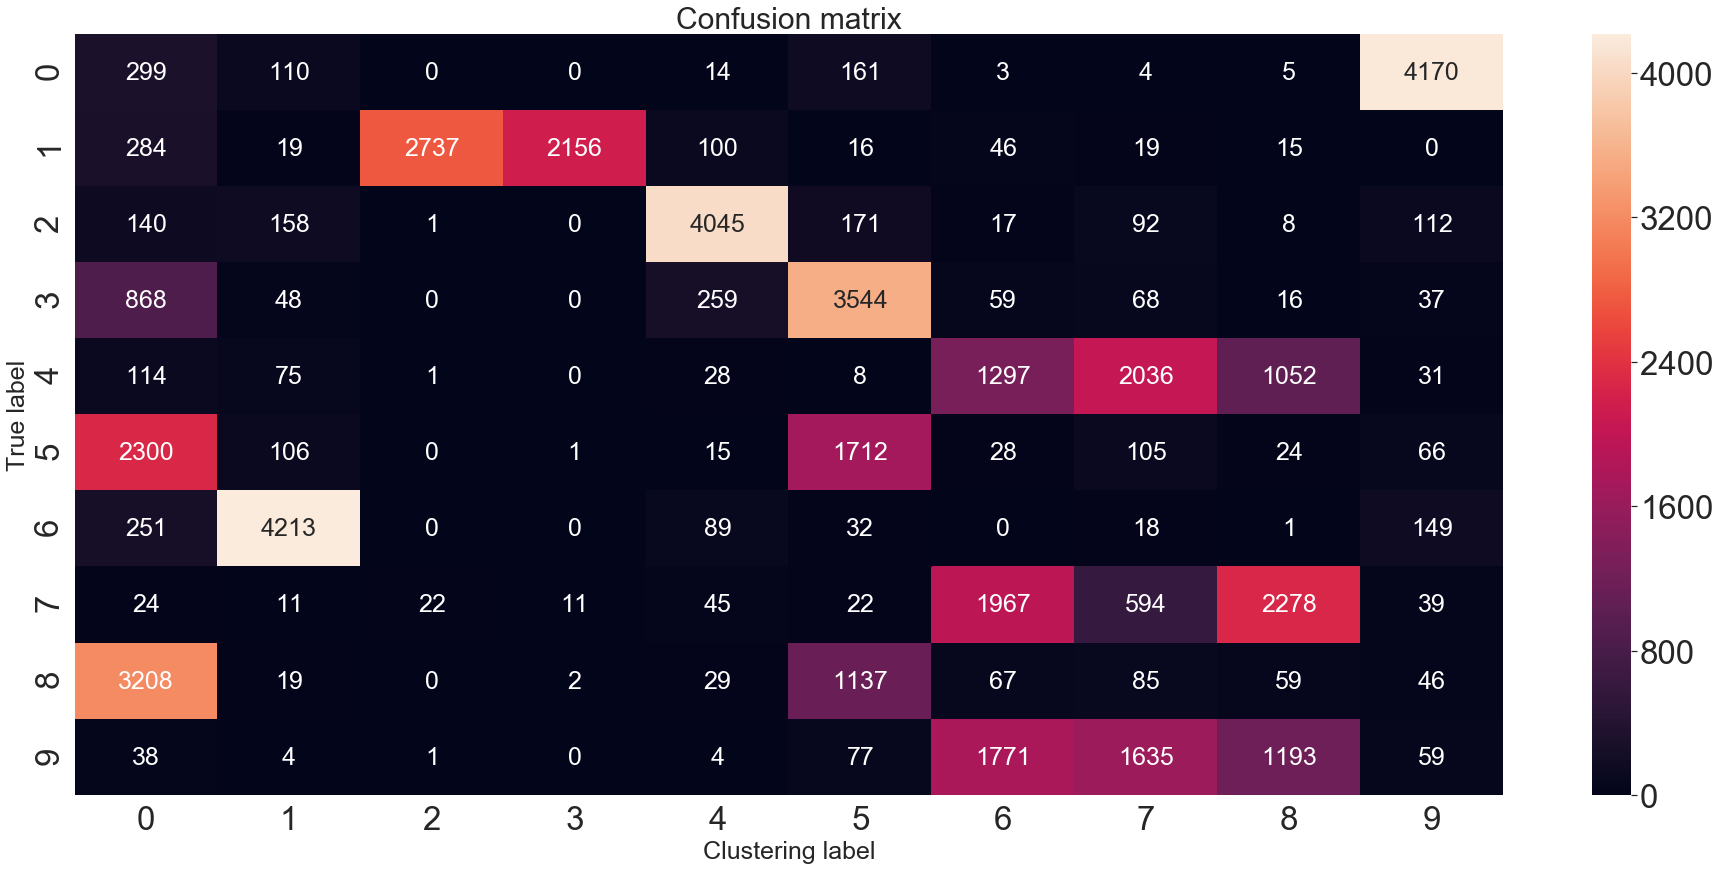

Accuracy =  63.237500000000004  - Error =  36.762499999999996
silhouette_avg 0.087531574
-------------------
epoch:  0
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 161us/sample - loss: 0.5852 - accuracy: 0.5303
Accuracy =  57.487500000000004  - Error =  42.512499999999996
silhouette_avg 0.14280356
last silhouette_avg 0.087531574
caso 3


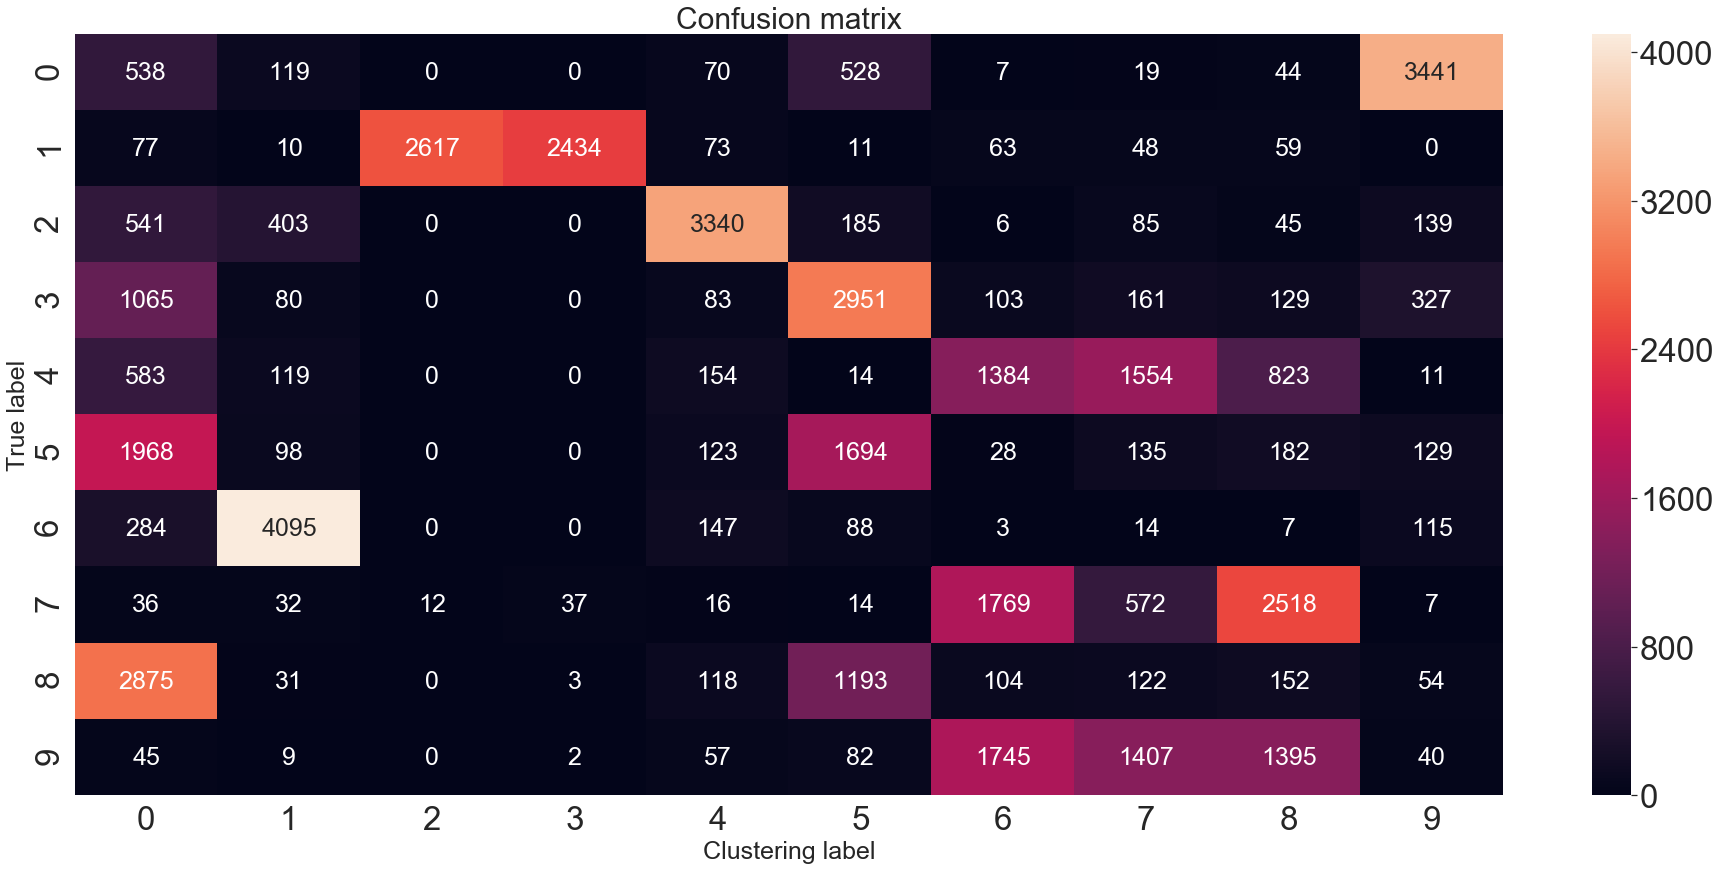

epoch:  1
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 159us/sample - loss: 0.4126 - accuracy: 0.7724
Accuracy =  57.63333333333334  - Error =  42.36666666666667
silhouette_avg 0.16250913
last silhouette_avg 0.14280356
caso 3


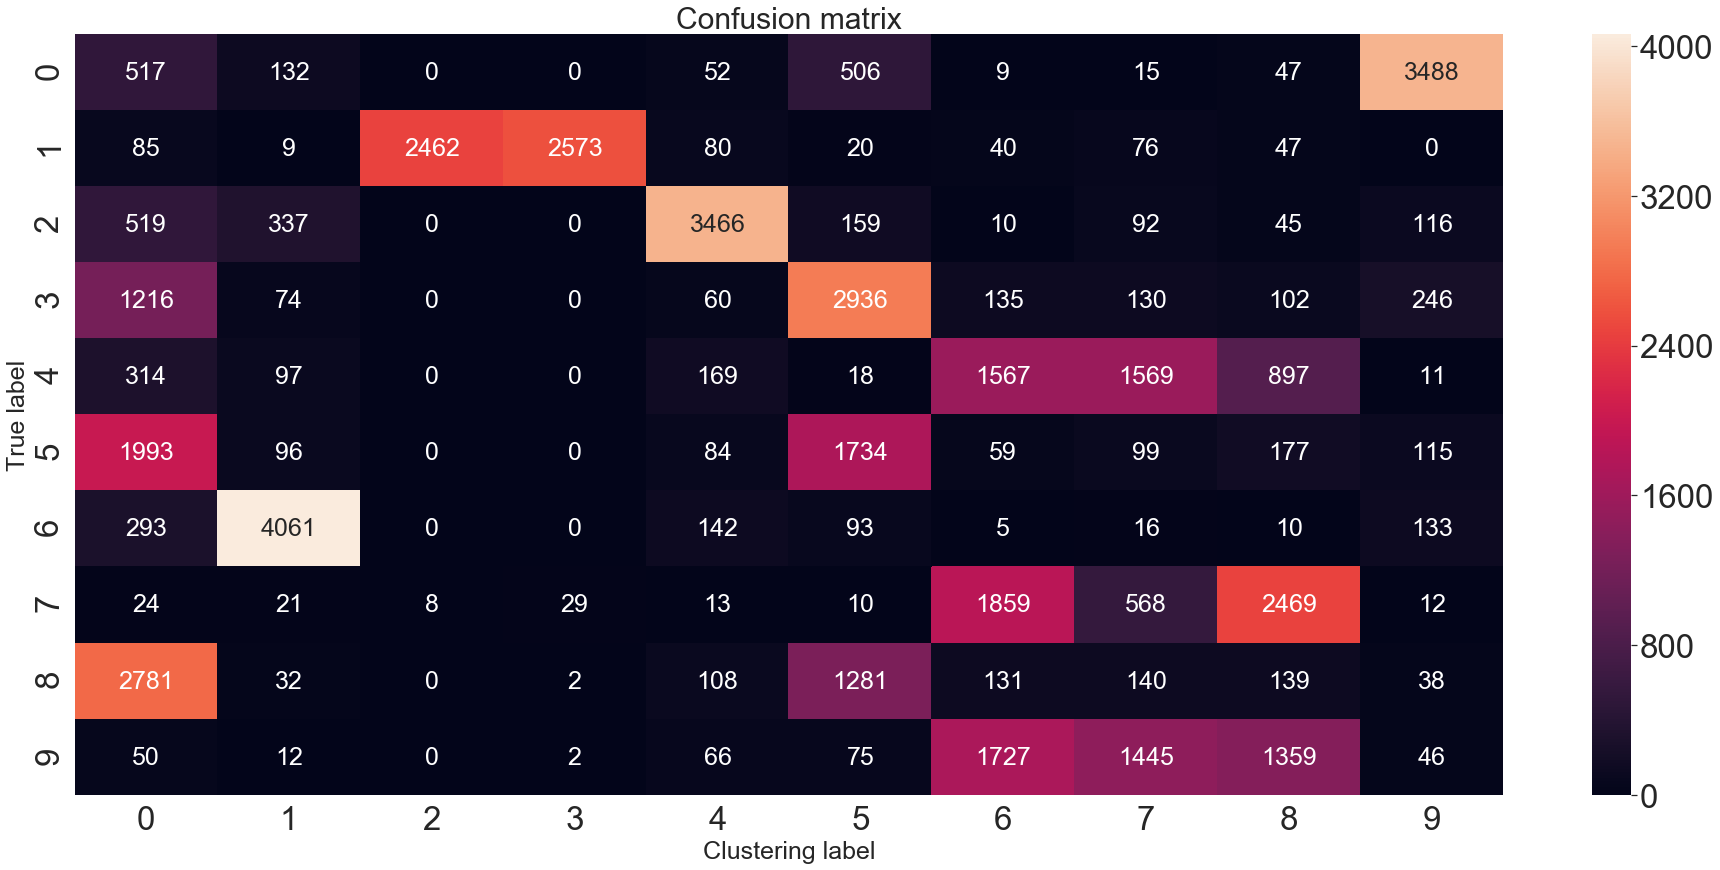

epoch:  2
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 158us/sample - loss: 0.3232 - accuracy: 0.8395
Accuracy =  56.3875  - Error =  43.6125
silhouette_avg 0.17985149
last silhouette_avg 0.16250913
caso 3


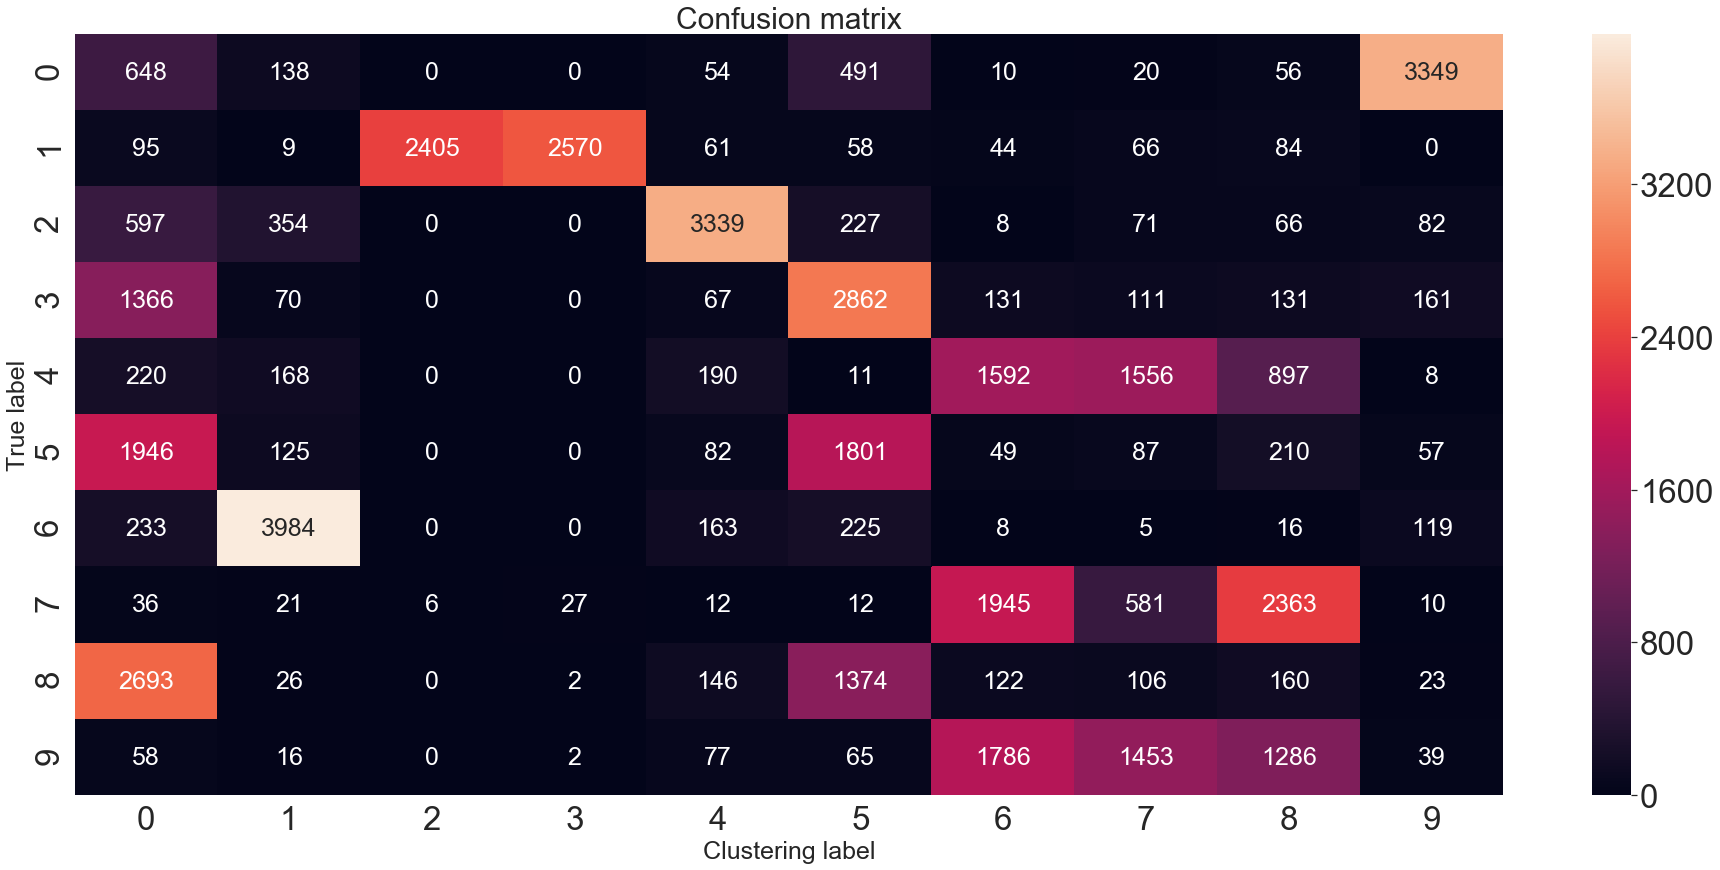

epoch:  3
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 157us/sample - loss: 0.2390 - accuracy: 0.8594
Accuracy =  56.756249999999994  - Error =  43.24375
silhouette_avg 0.19147894
last silhouette_avg 0.17985149
caso 3


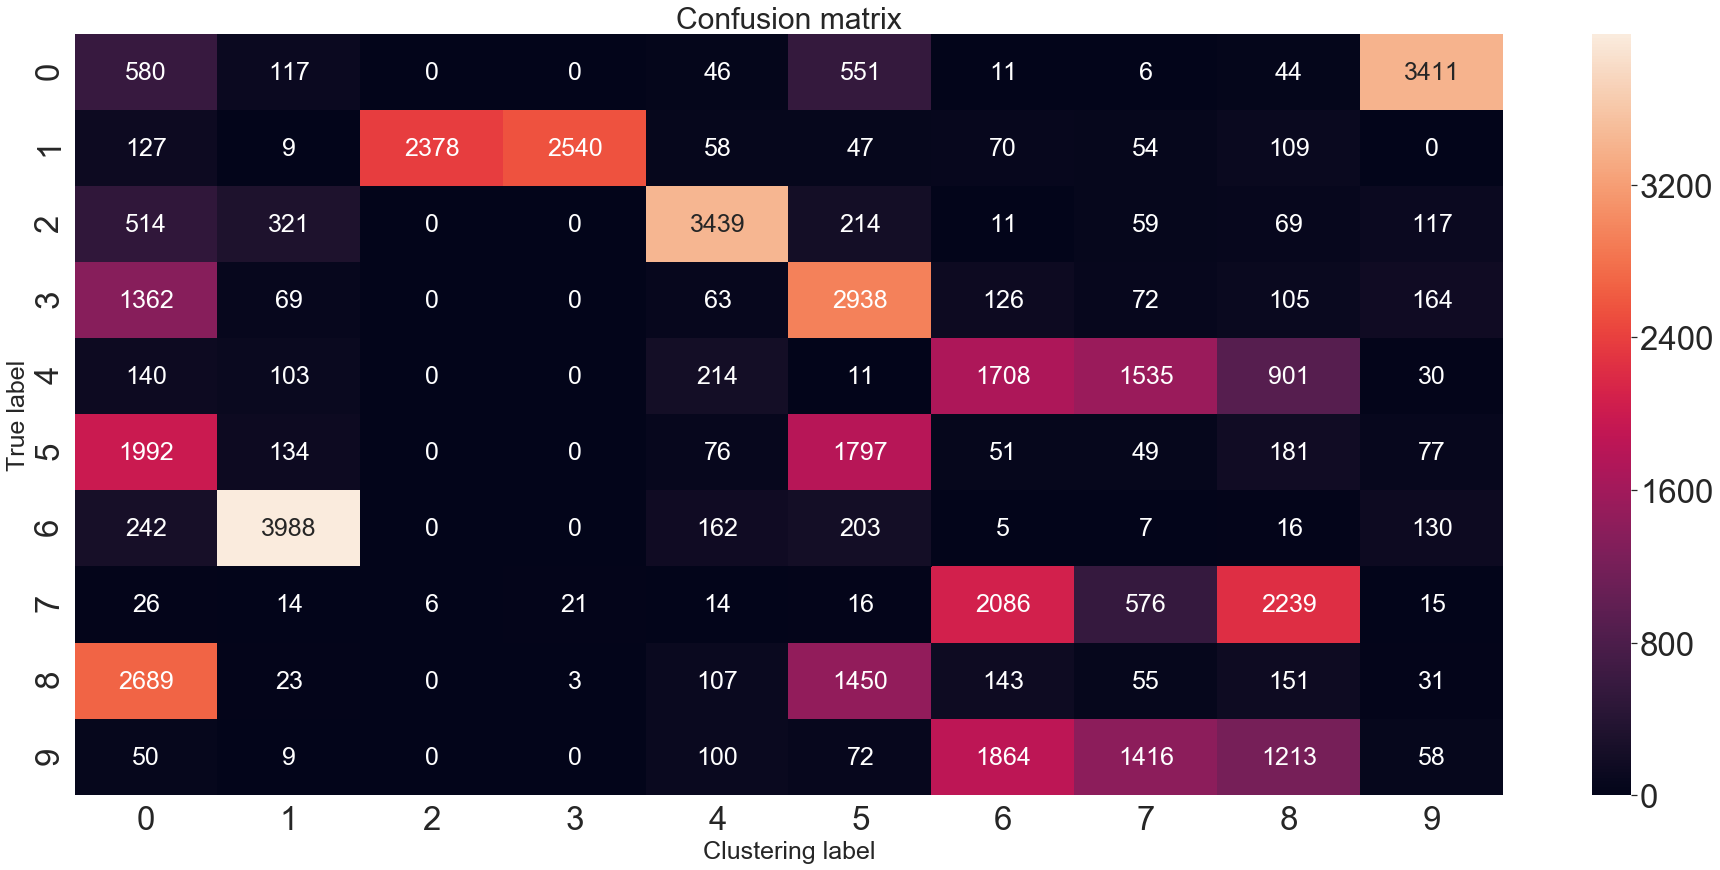

epoch:  4
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 159us/sample - loss: 0.1694 - accuracy: 0.8807
Accuracy =  55.53333333333333  - Error =  44.46666666666667
silhouette_avg 0.21143314
last silhouette_avg 0.19147894
caso 3


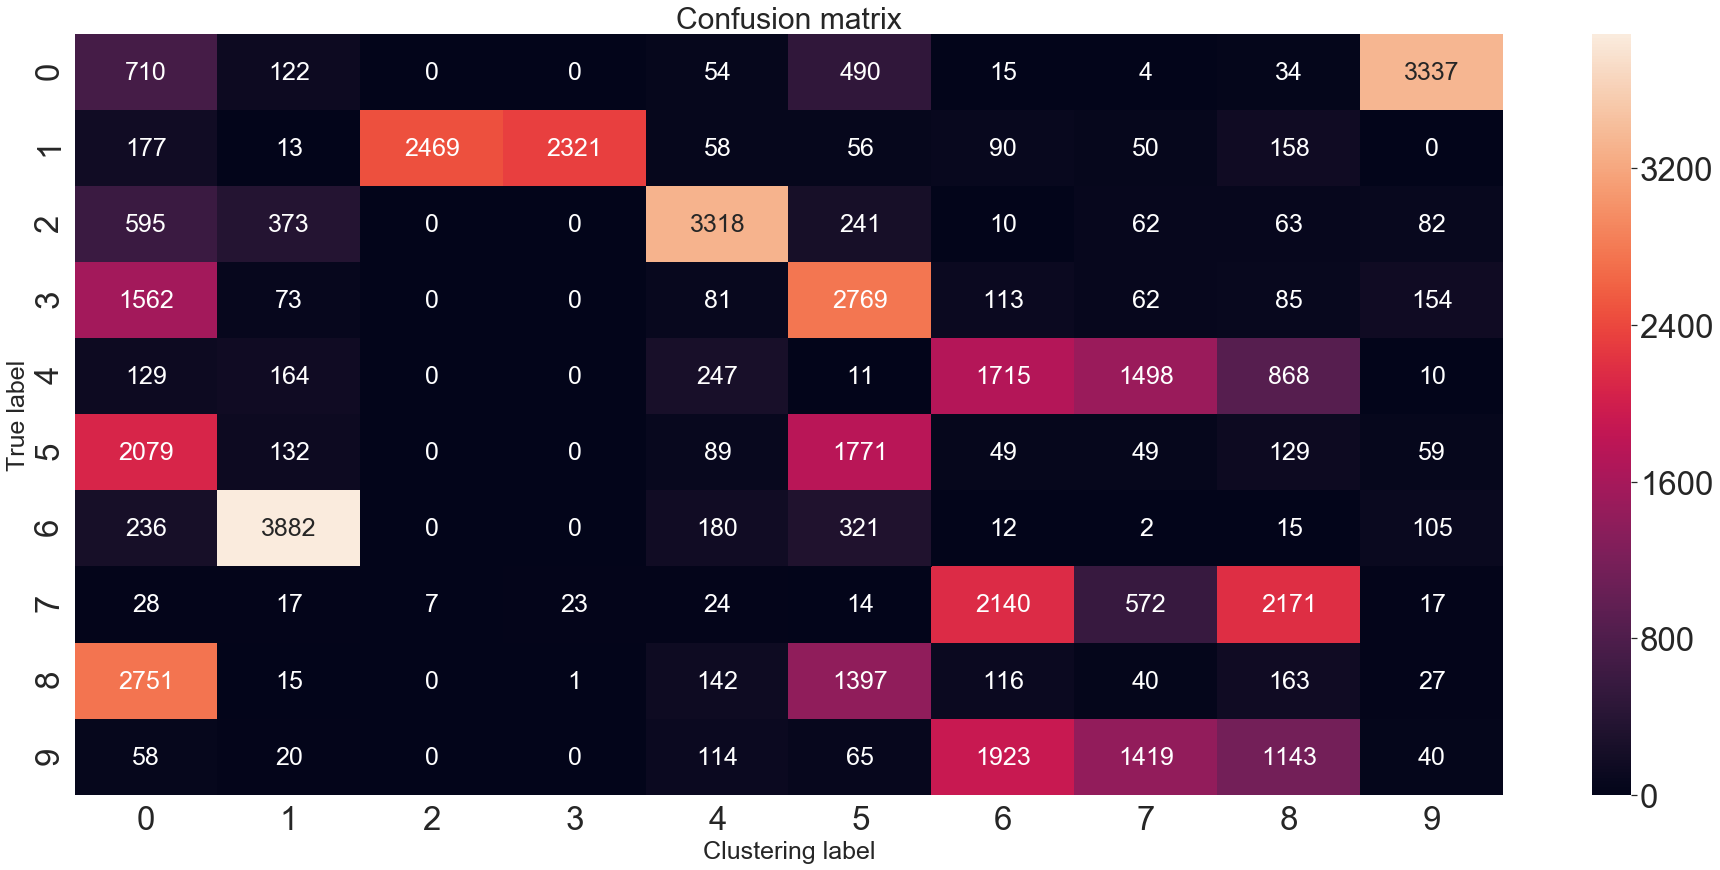

epoch:  5
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 157us/sample - loss: 0.1353 - accuracy: 0.8829
Accuracy =  55.37708333333333  - Error =  44.62291666666667
silhouette_avg 0.21501672
last silhouette_avg 0.21143314
caso 3


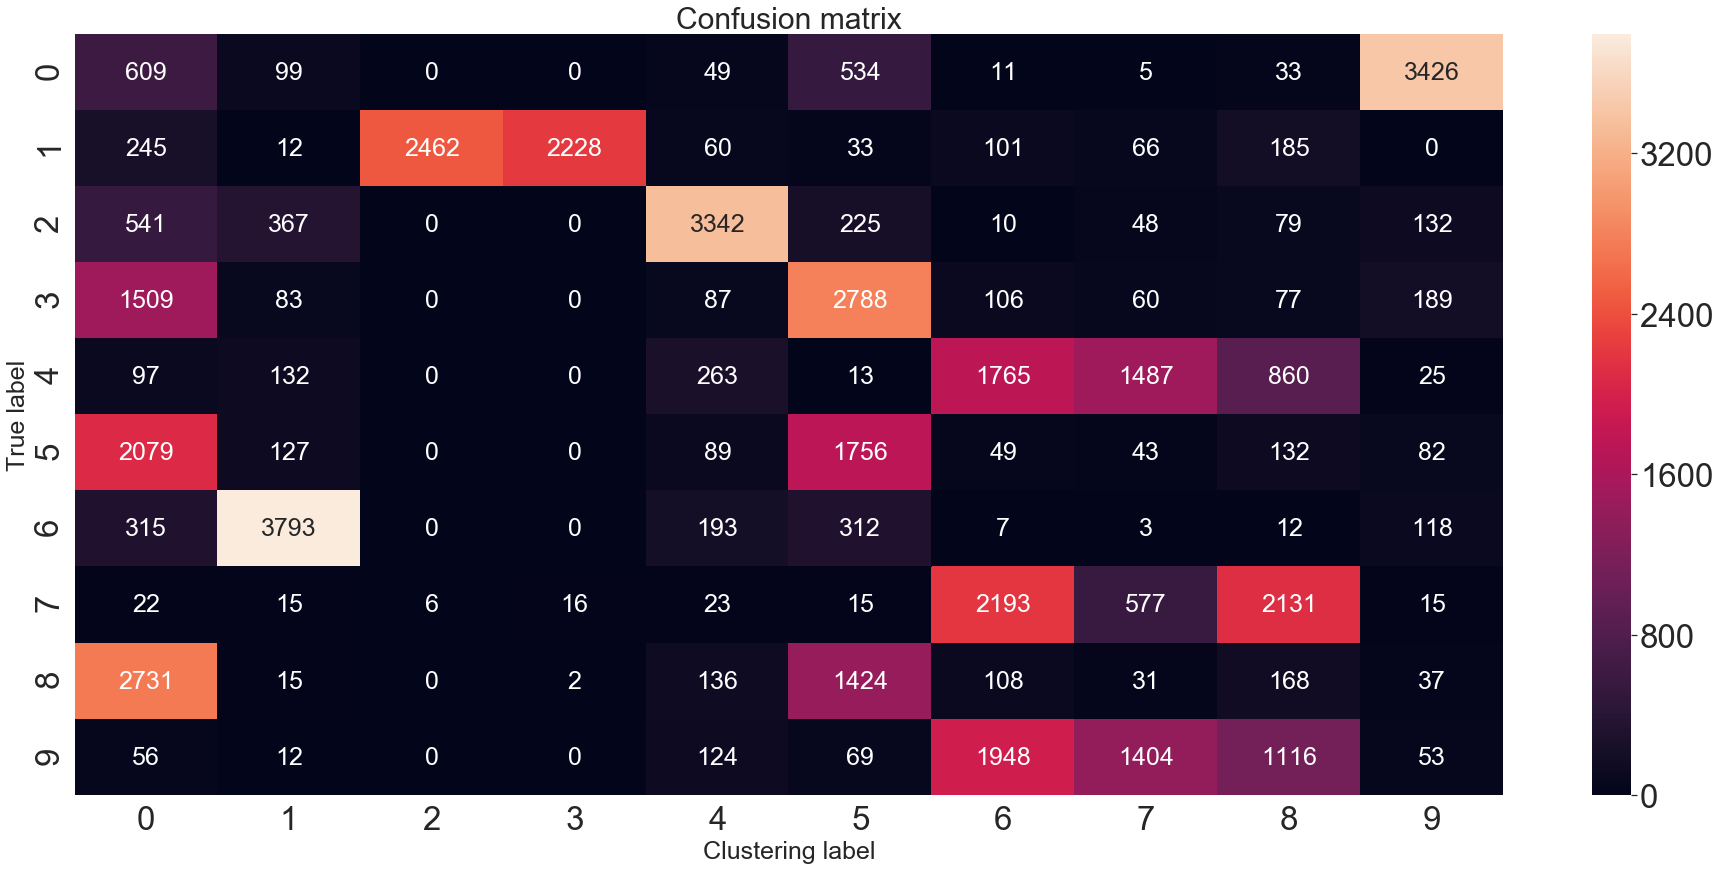

epoch:  6
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 159us/sample - loss: 0.1115 - accuracy: 0.8918
Accuracy =  54.90625  - Error =  45.09375
silhouette_avg 0.22953713
last silhouette_avg 0.21501672
caso 3


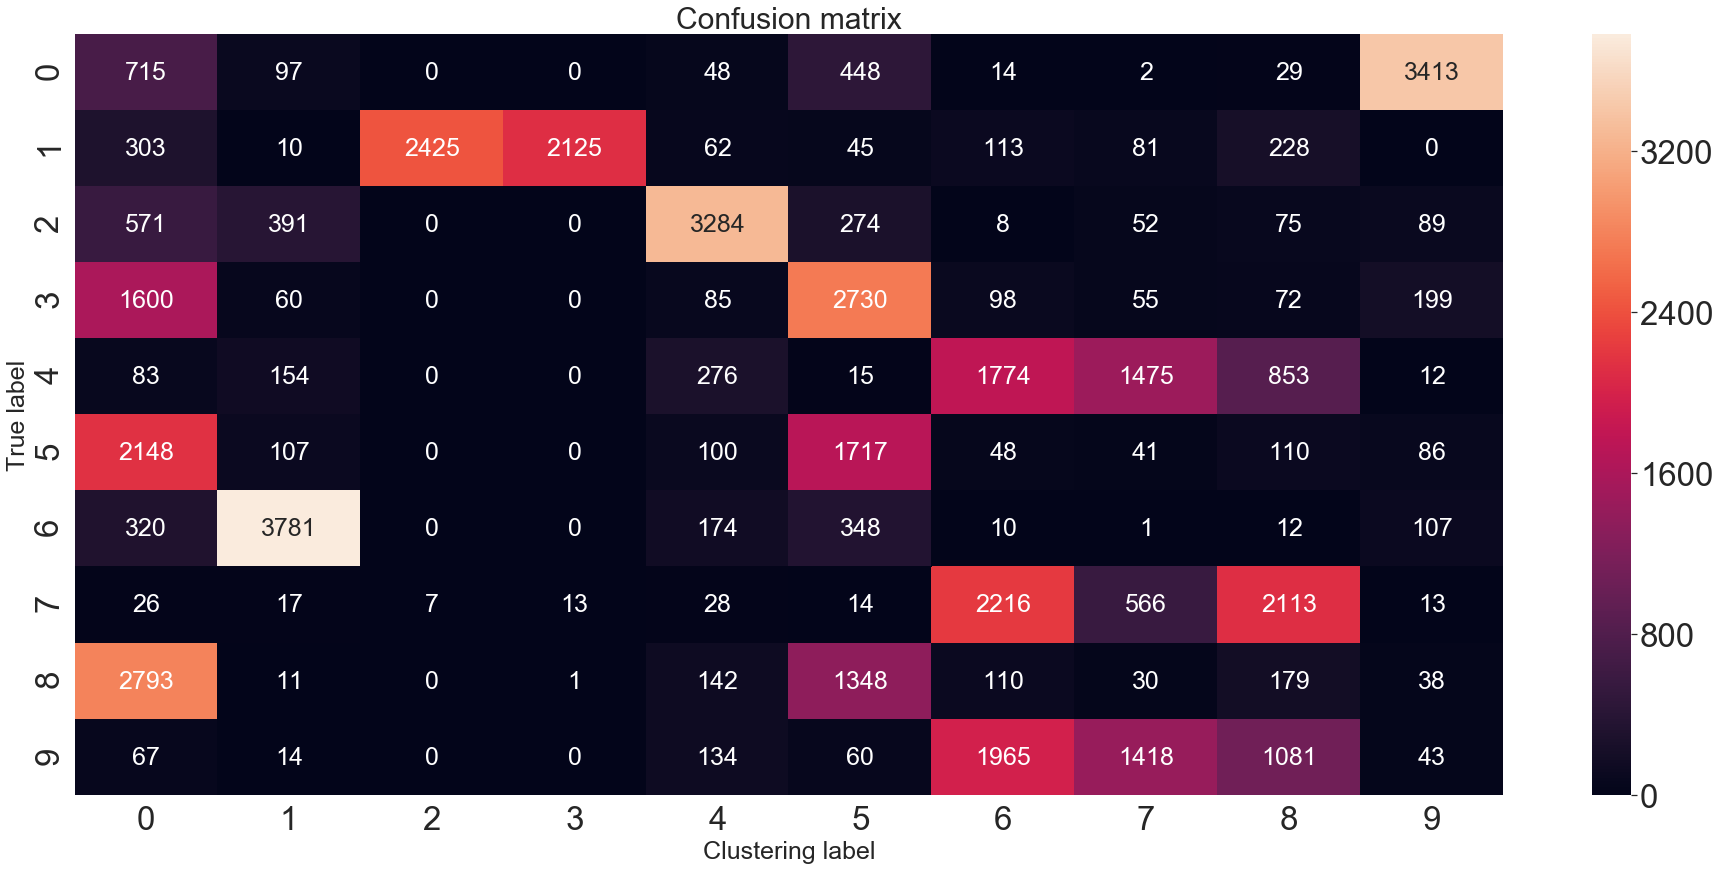

epoch:  7
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 158us/sample - loss: 0.0986 - accuracy: 0.9012
Accuracy =  54.99791666666667  - Error =  45.00208333333333
silhouette_avg 0.22416352
last silhouette_avg 0.22953713
caso 2


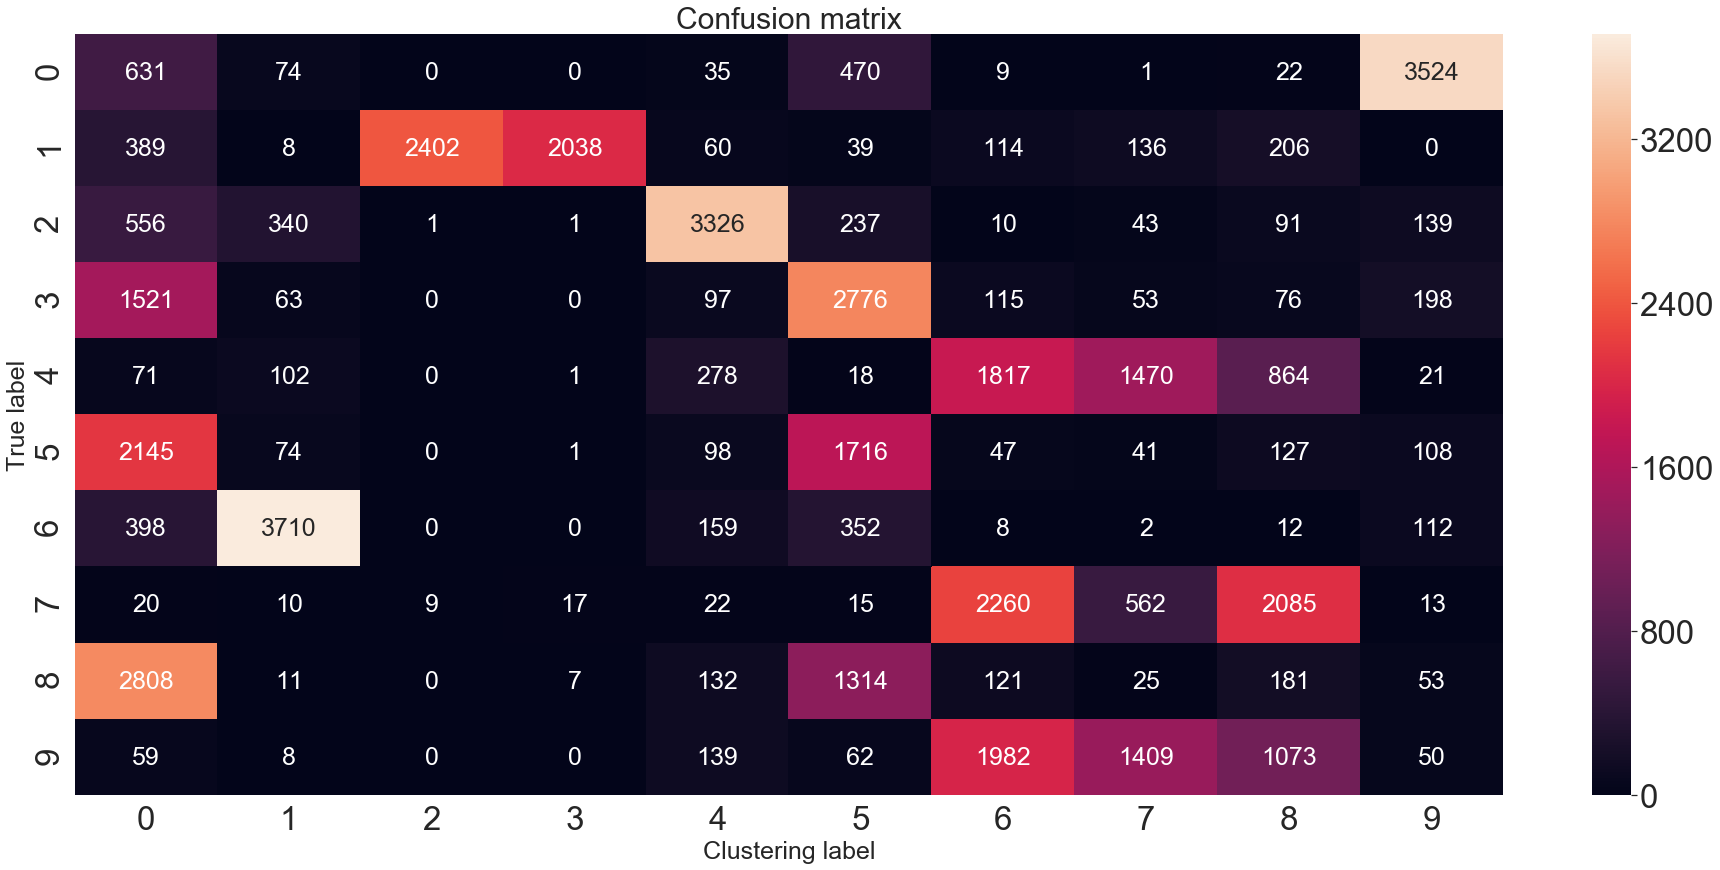

epoch:  8
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 161us/sample - loss: 0.0870 - accuracy: 0.9323
Accuracy =  54.78125  - Error =  45.21875
silhouette_avg 0.22793995
last silhouette_avg 0.22953713
caso 2


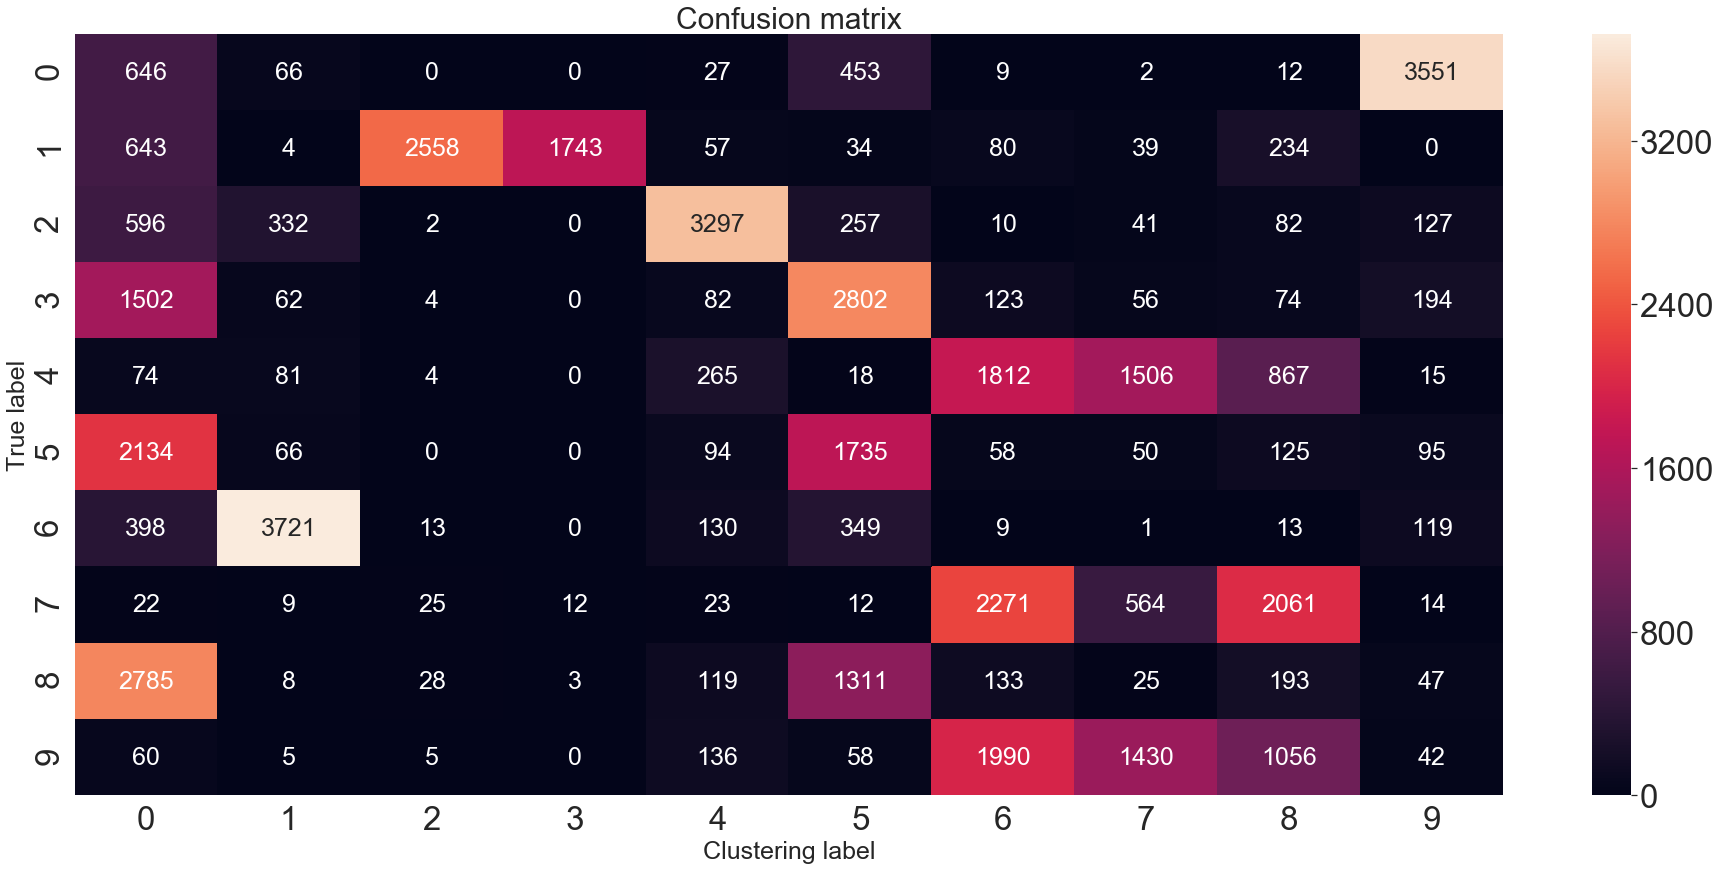

epoch:  9
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 9s 193us/sample - loss: 0.0590 - accuracy: 0.9545
Accuracy =  53.67916666666667  - Error =  46.32083333333333
silhouette_avg 0.24520072
last silhouette_avg 0.22953713
caso 3


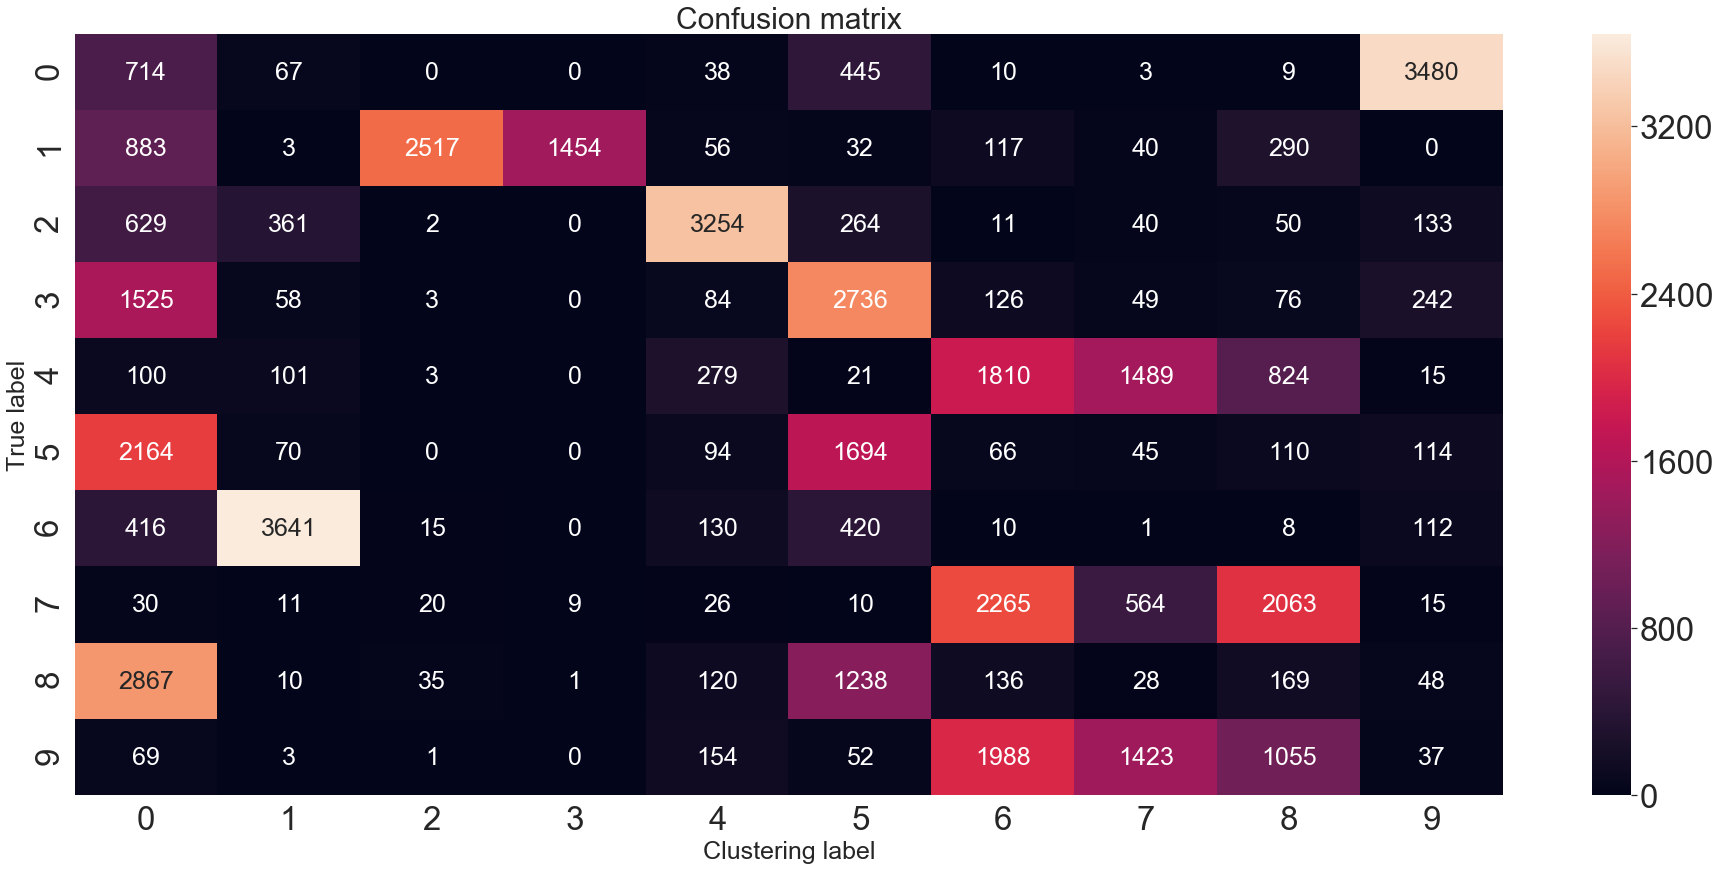

epoch:  10
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 9s 179us/sample - loss: 0.0537 - accuracy: 0.9536
Accuracy =  53.962500000000006  - Error =  46.037499999999994
silhouette_avg 0.22952494
last silhouette_avg 0.24520072
caso 2


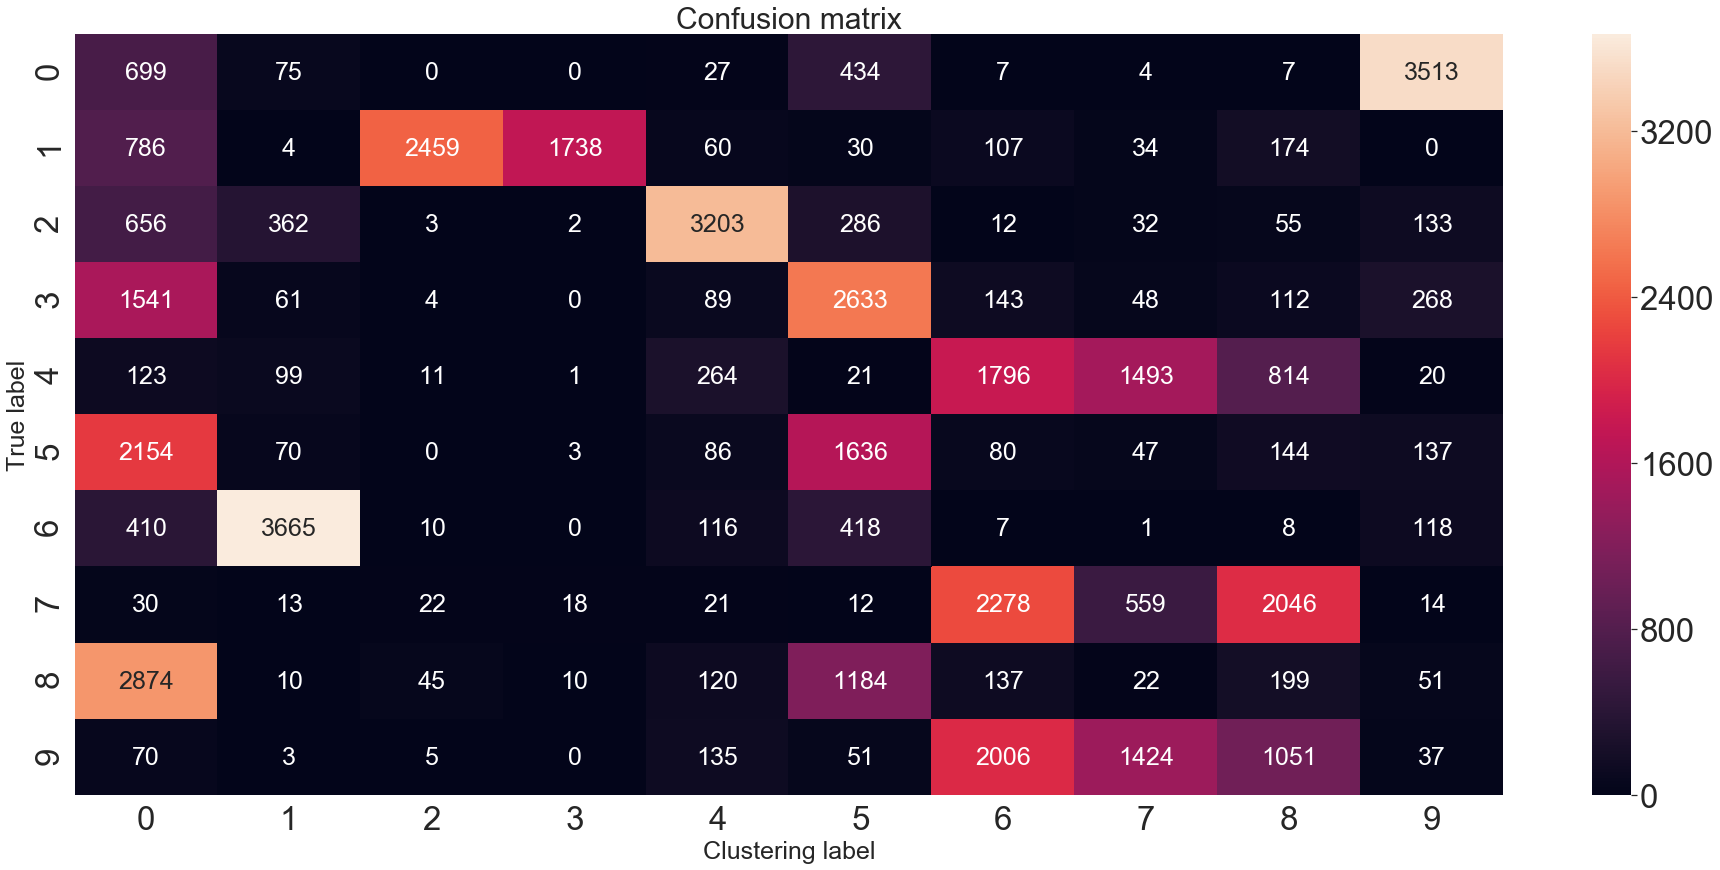

epoch:  11
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 172us/sample - loss: 0.0596 - accuracy: 0.9517
Accuracy =  53.27291666666667  - Error =  46.72708333333333
silhouette_avg 0.25349343
last silhouette_avg 0.24520072
caso 3


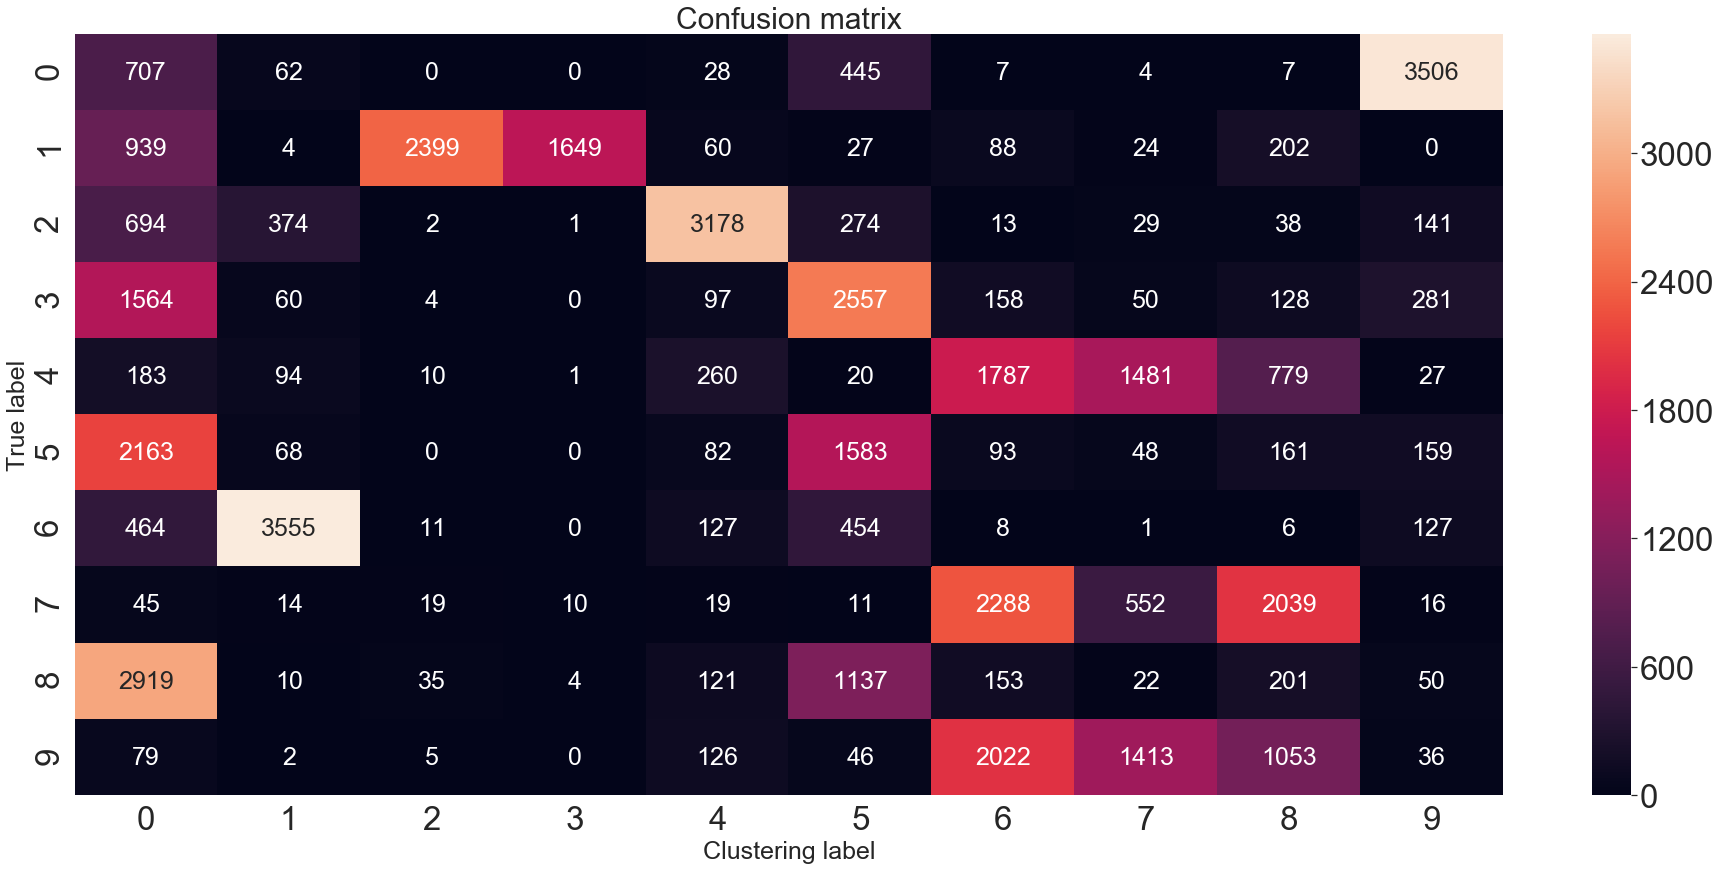

epoch:  12
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 168us/sample - loss: 0.0458 - accuracy: 0.9575
Accuracy =  52.72708333333333  - Error =  47.27291666666667
silhouette_avg 0.26191592
last silhouette_avg 0.25349343
caso 3


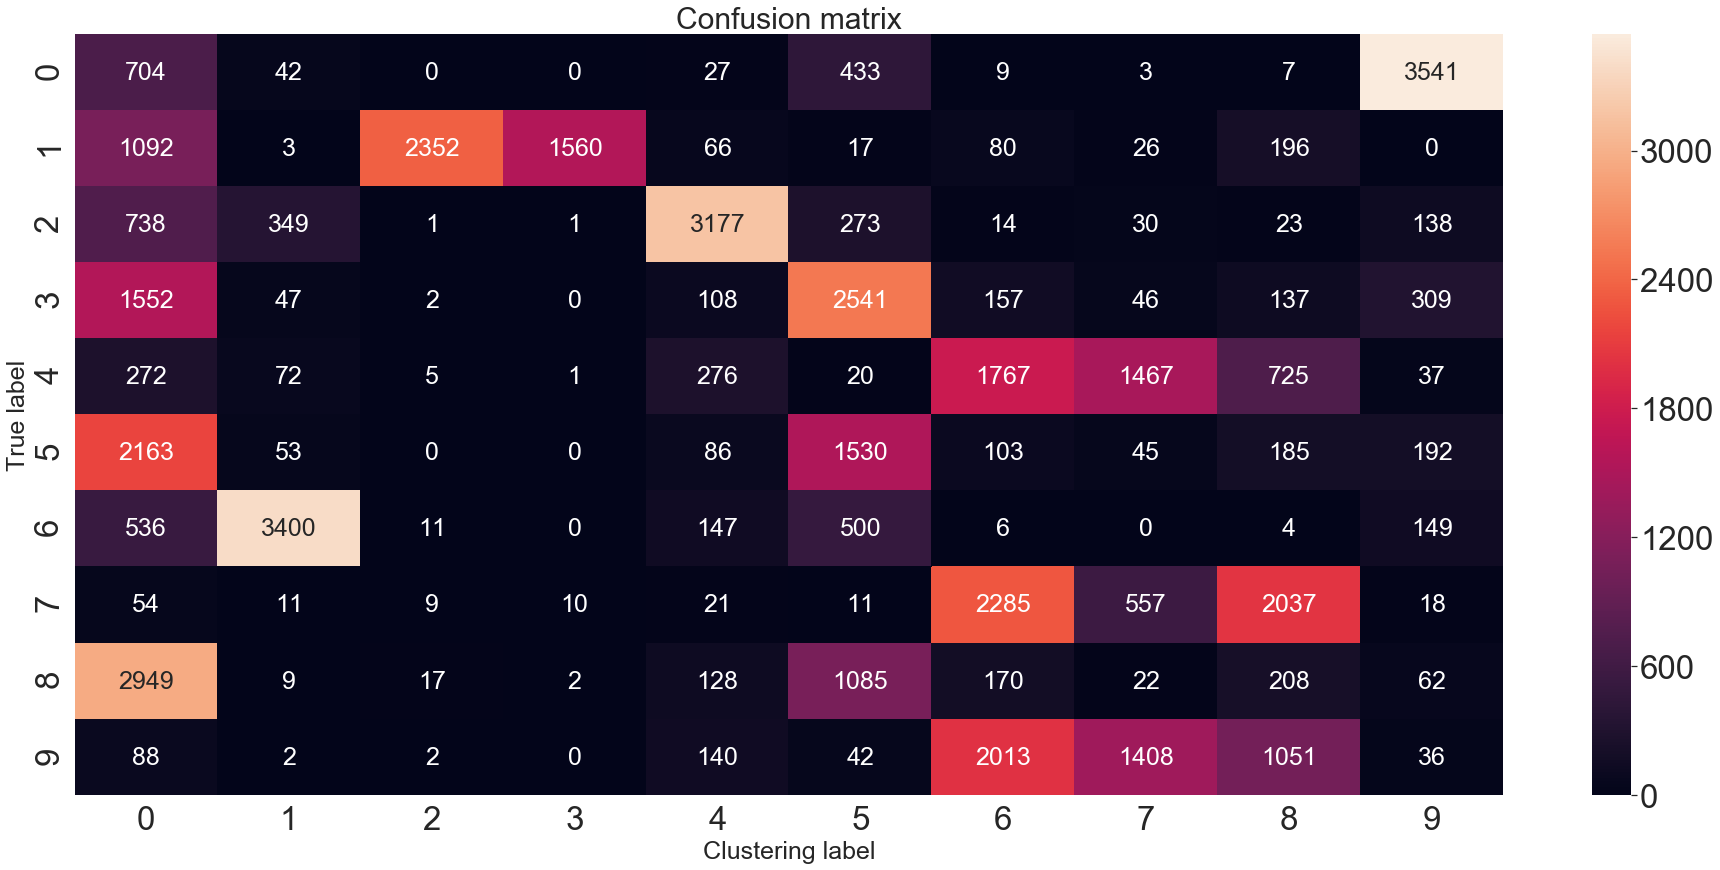

epoch:  13
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 176us/sample - loss: 0.0363 - accuracy: 0.9620
Accuracy =  51.65625  - Error =  48.34375
silhouette_avg 0.27052966
last silhouette_avg 0.26191592
caso 3


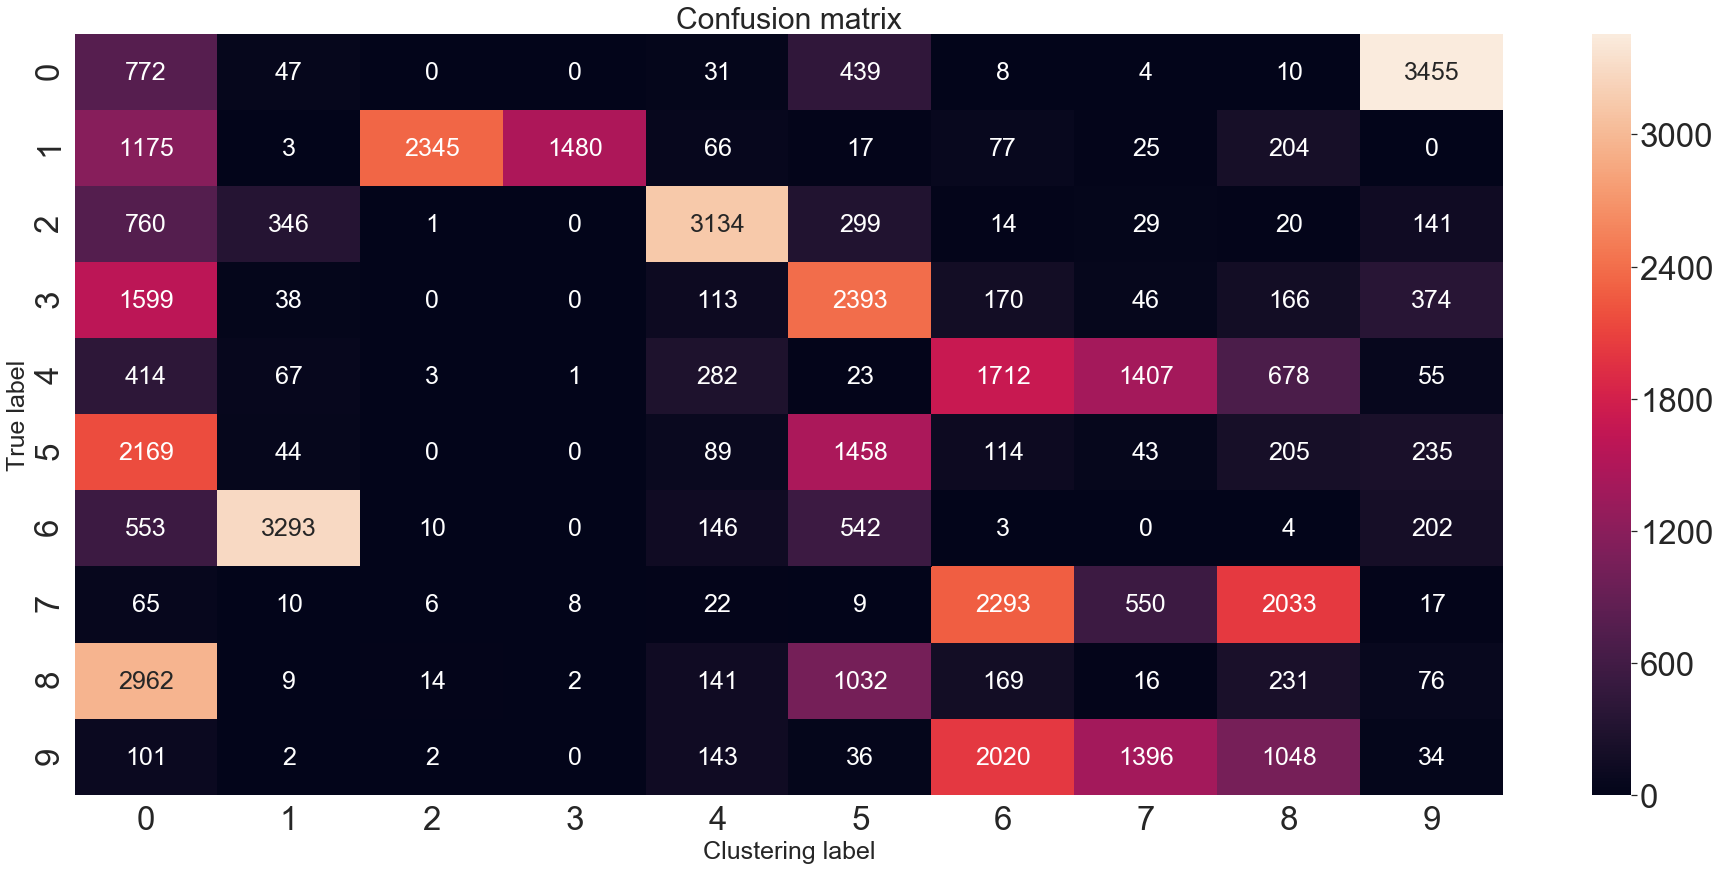

epoch:  14
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 157us/sample - loss: 0.0372 - accuracy: 0.9574
Accuracy =  51.05  - Error =  48.949999999999996
silhouette_avg 0.2679847
last silhouette_avg 0.27052966
caso 2


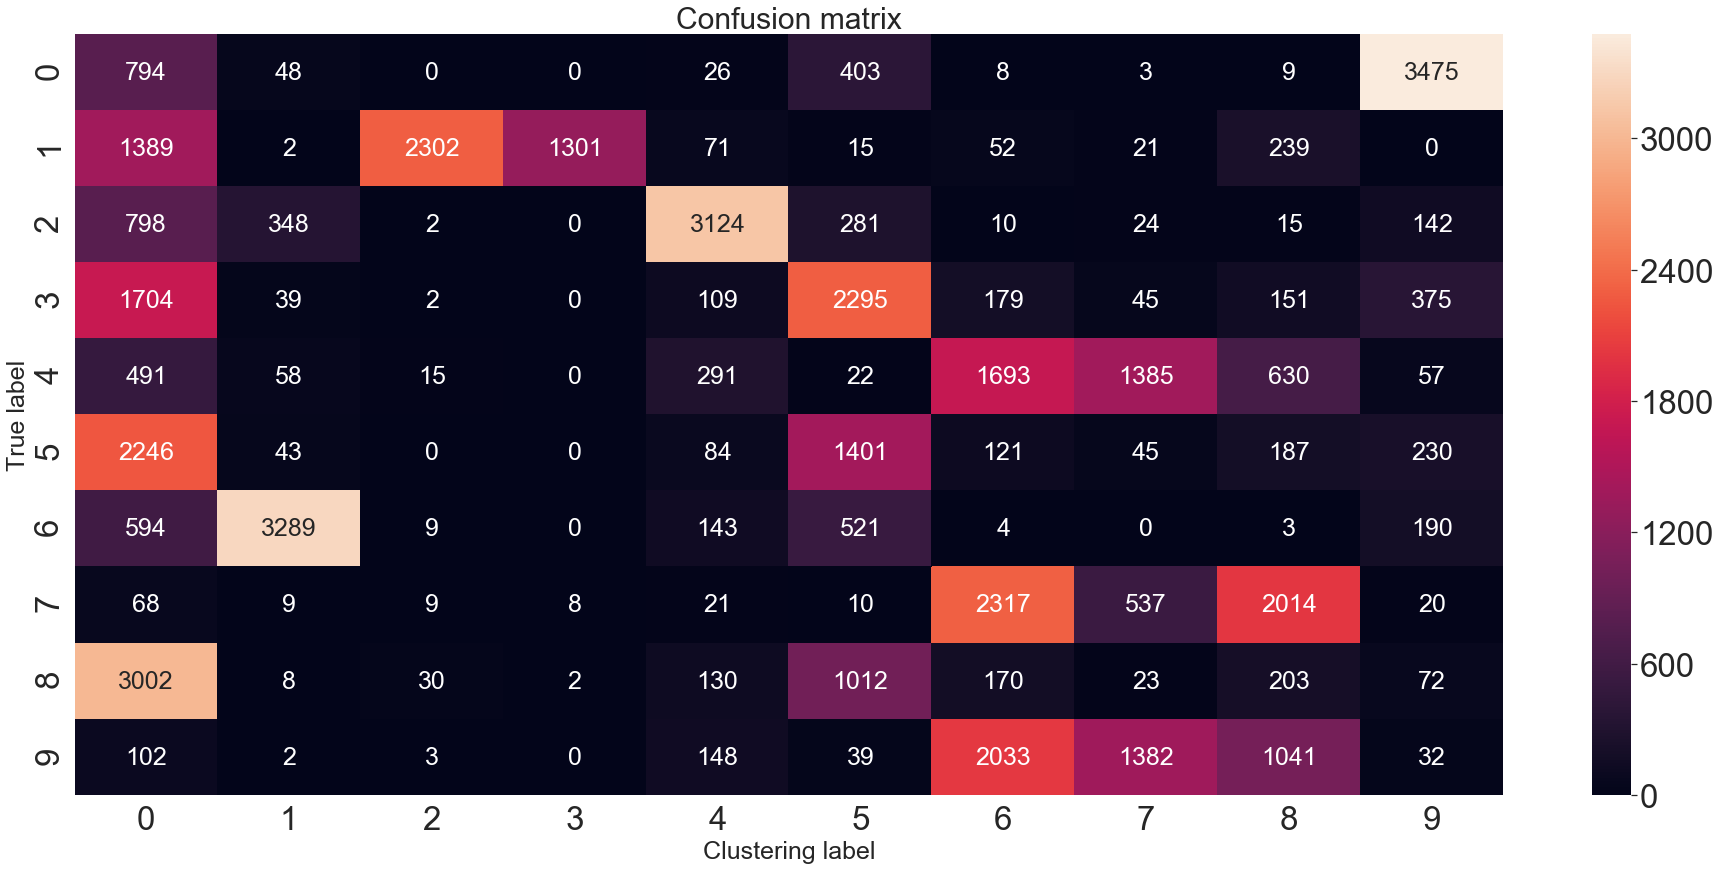

epoch:  15
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 161us/sample - loss: 0.0320 - accuracy: 0.9606
Accuracy =  50.12291666666666  - Error =  49.87708333333333
silhouette_avg 0.27560228
last silhouette_avg 0.27052966
caso 3


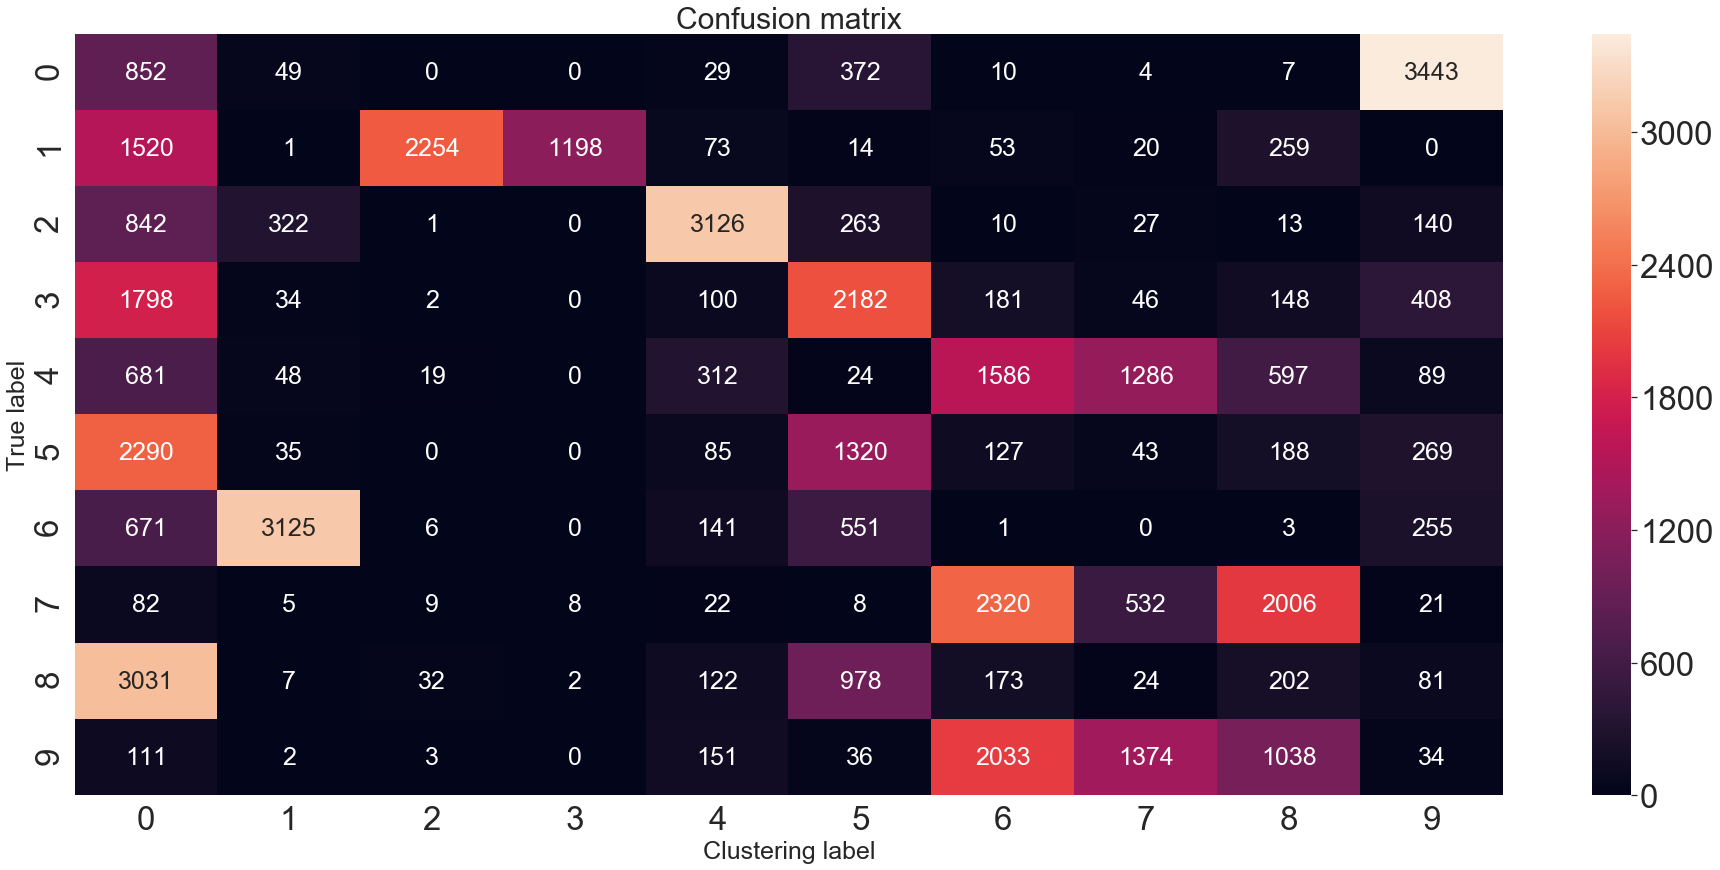

epoch:  16
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 157us/sample - loss: 0.0342 - accuracy: 0.9531
Accuracy =  48.99791666666667  - Error =  51.00208333333334
silhouette_avg 0.26937267
last silhouette_avg 0.27560228
caso 2


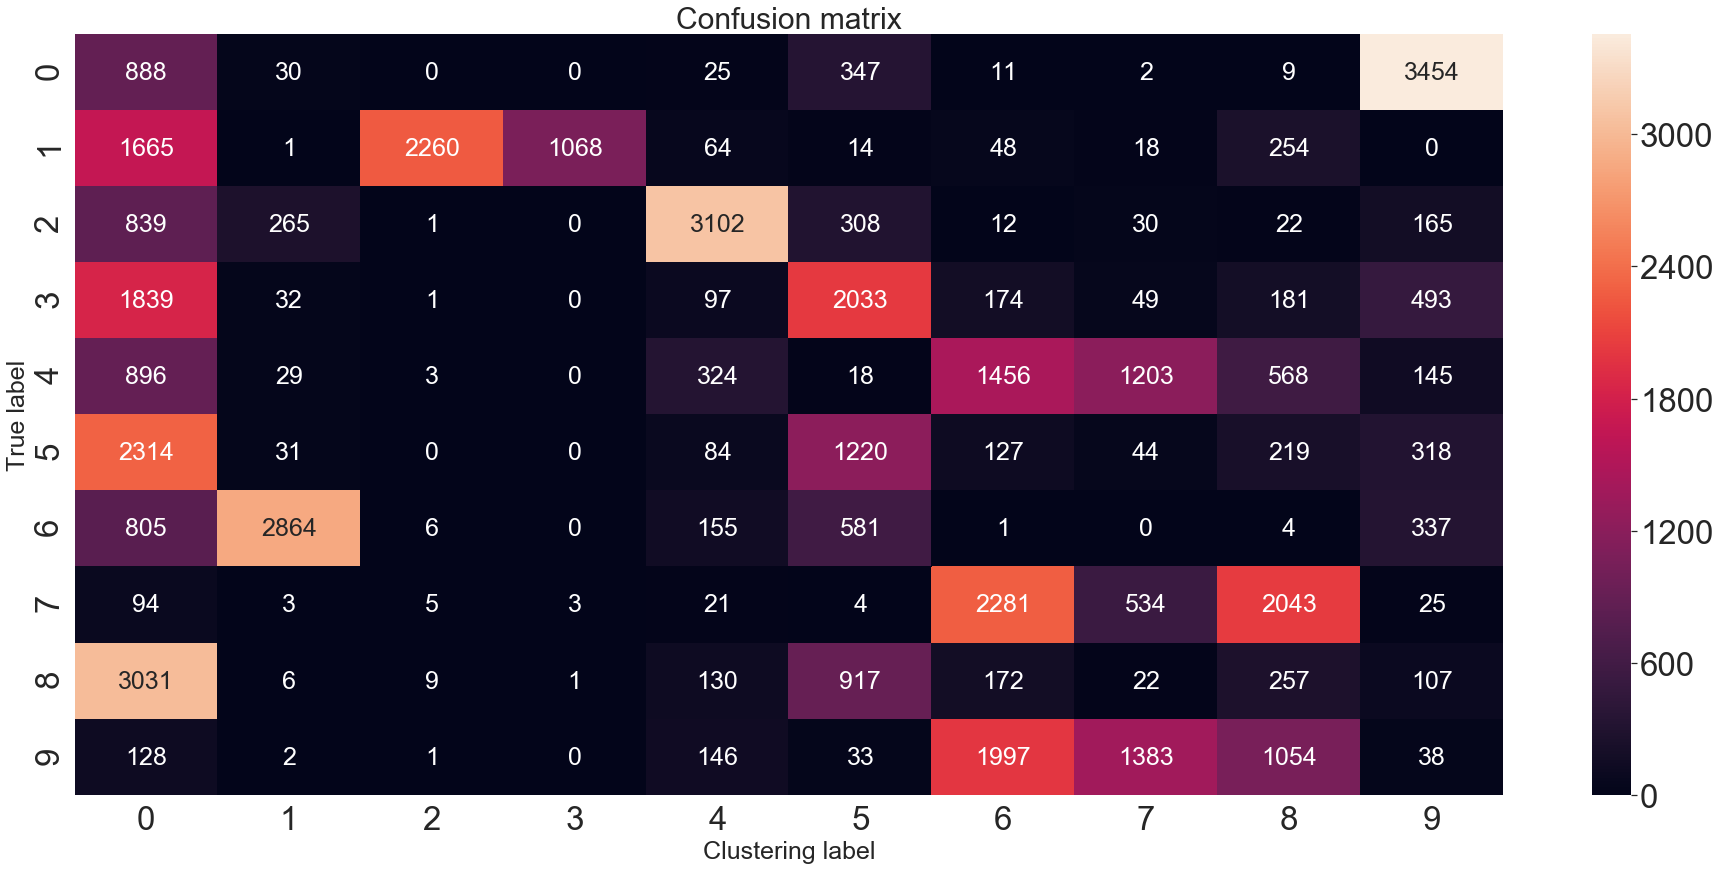

epoch:  17
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 157us/sample - loss: 0.0327 - accuracy: 0.9539
Accuracy =  51.195833333333326  - Error =  48.80416666666667
silhouette_avg 0.22184995
last silhouette_avg 0.27560228
caso 1
epoch:  18
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 9s 187us/sample - loss: 0.0401 - accuracy: 0.9562
Accuracy =  48.52916666666667  - Error =  51.47083333333333
silhouette_avg 0.27465105
last silhouette_avg 0.27560228
caso 2


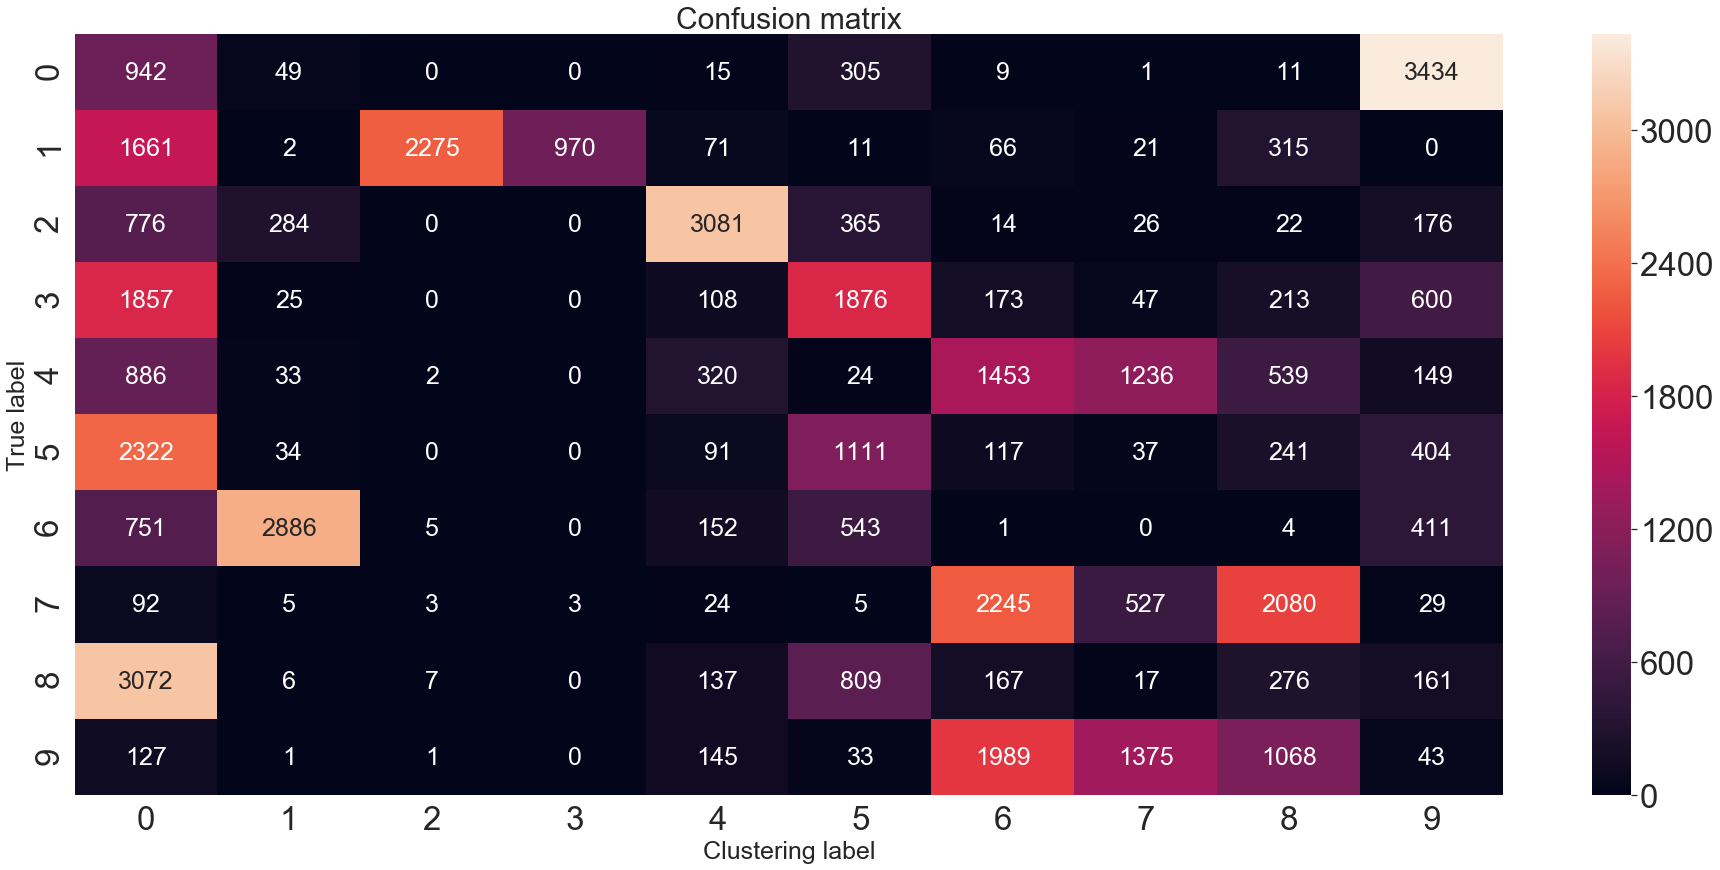

epoch:  19
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0309 - accuracy: 0.9592
Accuracy =  48.38333333333333  - Error =  51.61666666666667
silhouette_avg 0.27125725
last silhouette_avg 0.27560228
caso 2


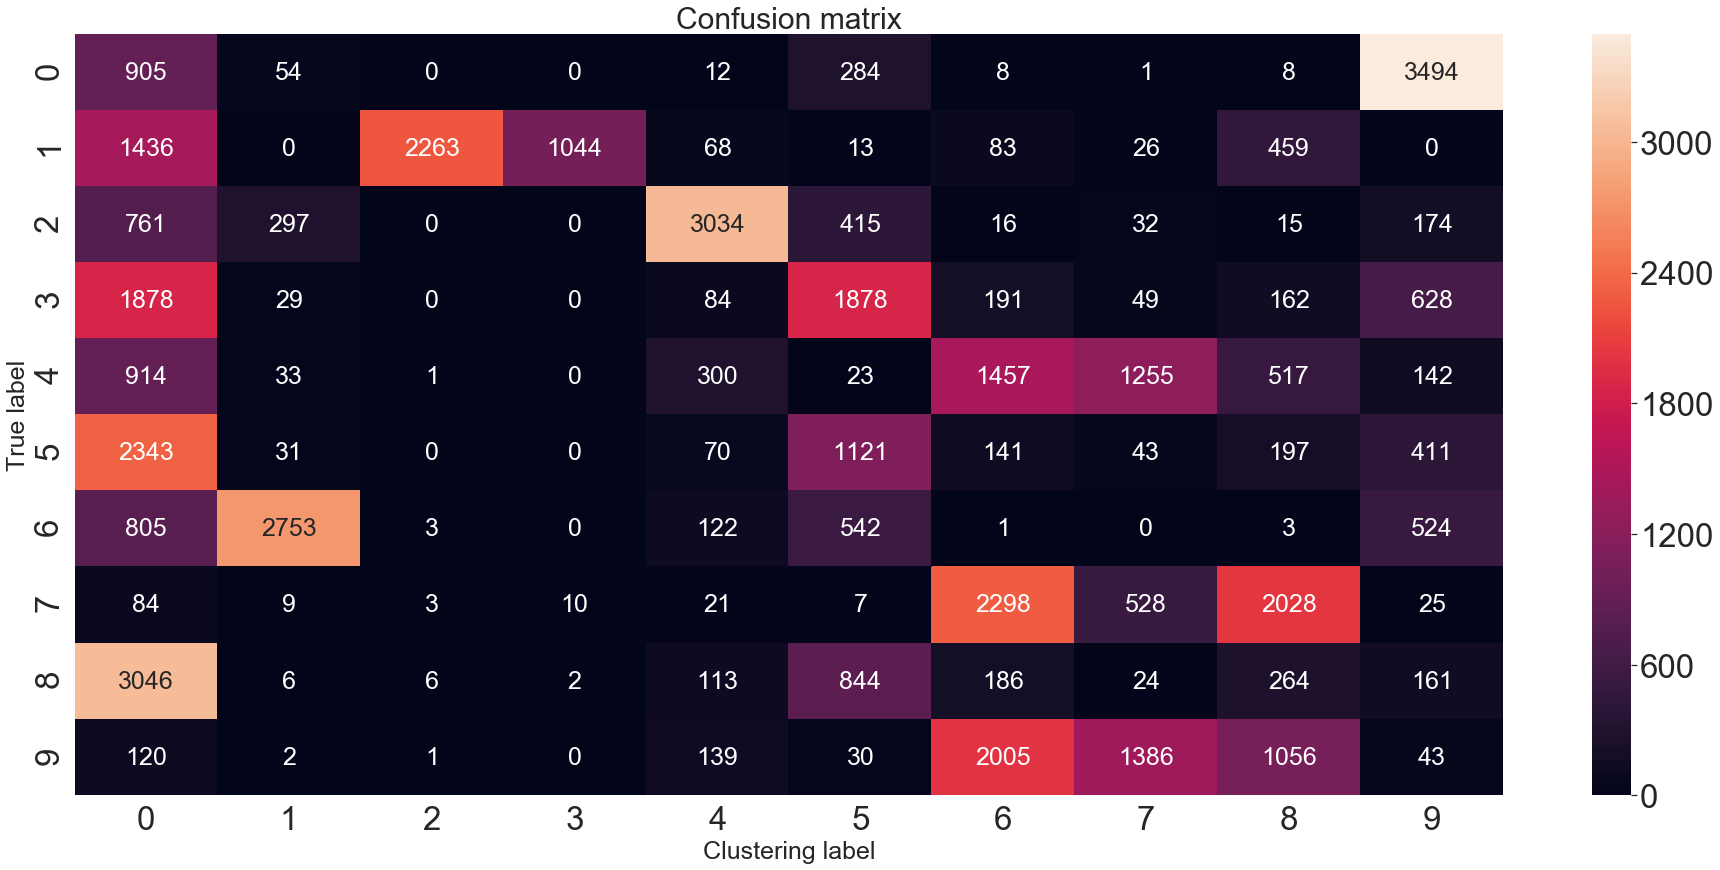

epoch:  20
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 10s 198us/sample - loss: 0.0289 - accuracy: 0.9595- loss: 0.029
Accuracy =  48.02916666666667  - Error =  51.97083333333333
silhouette_avg 0.2838678
last silhouette_avg 0.27560228
caso 3


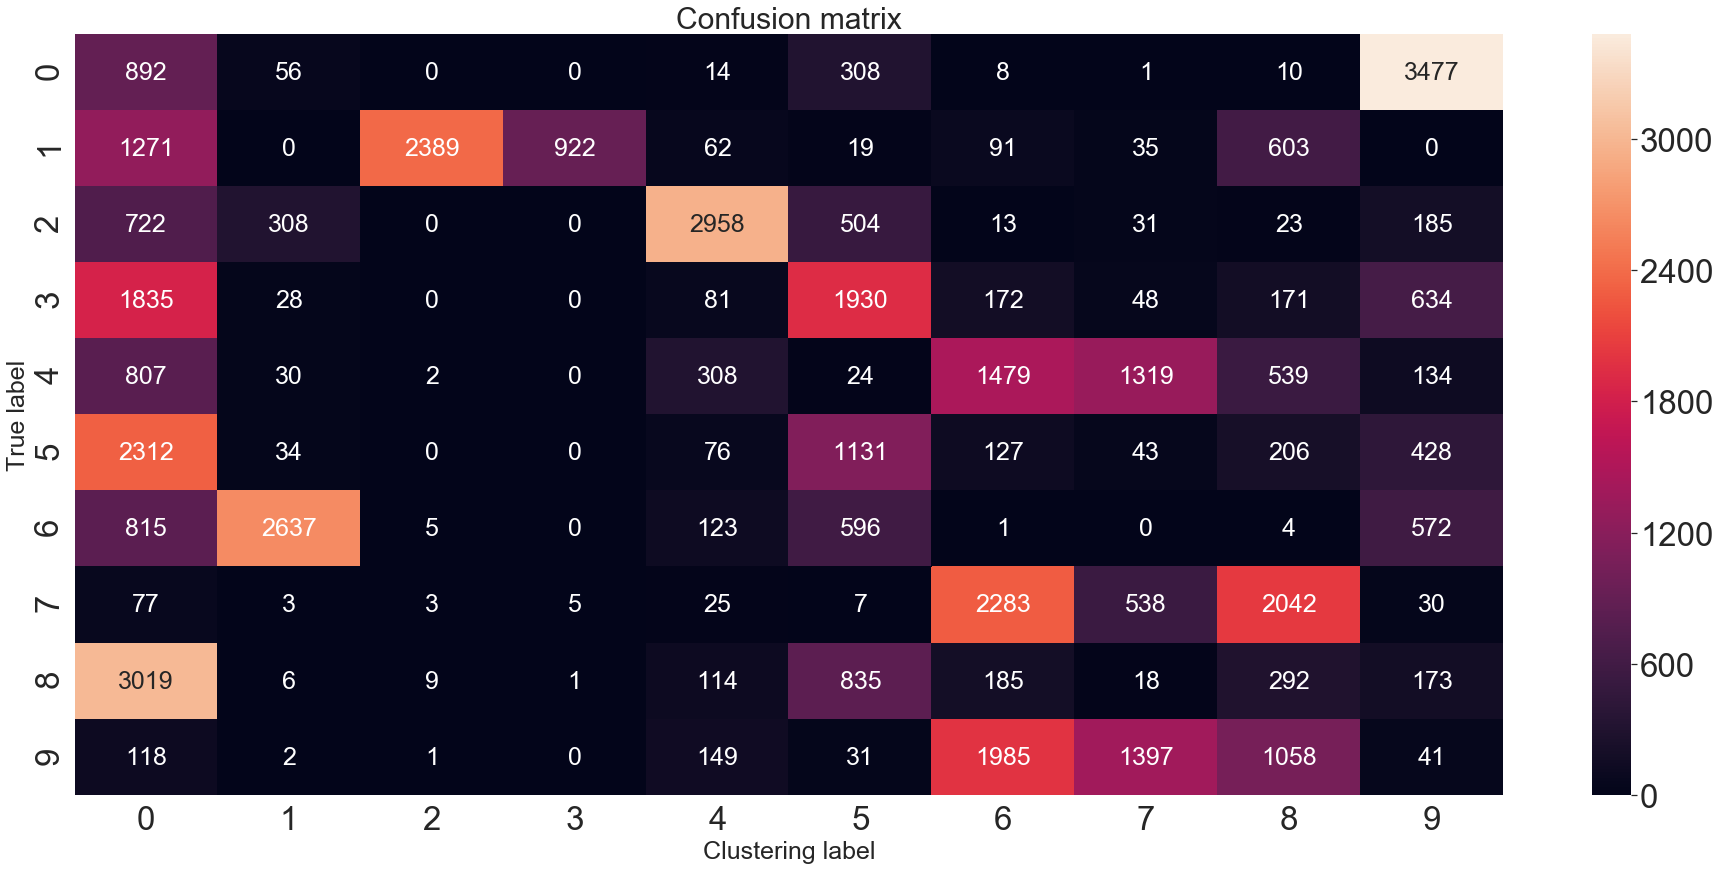

epoch:  21
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 10s 218us/sample - loss: 0.0260 - accuracy: 0.9625
Accuracy =  47.375  - Error =  52.625
silhouette_avg 0.2992977
last silhouette_avg 0.2838678
caso 3


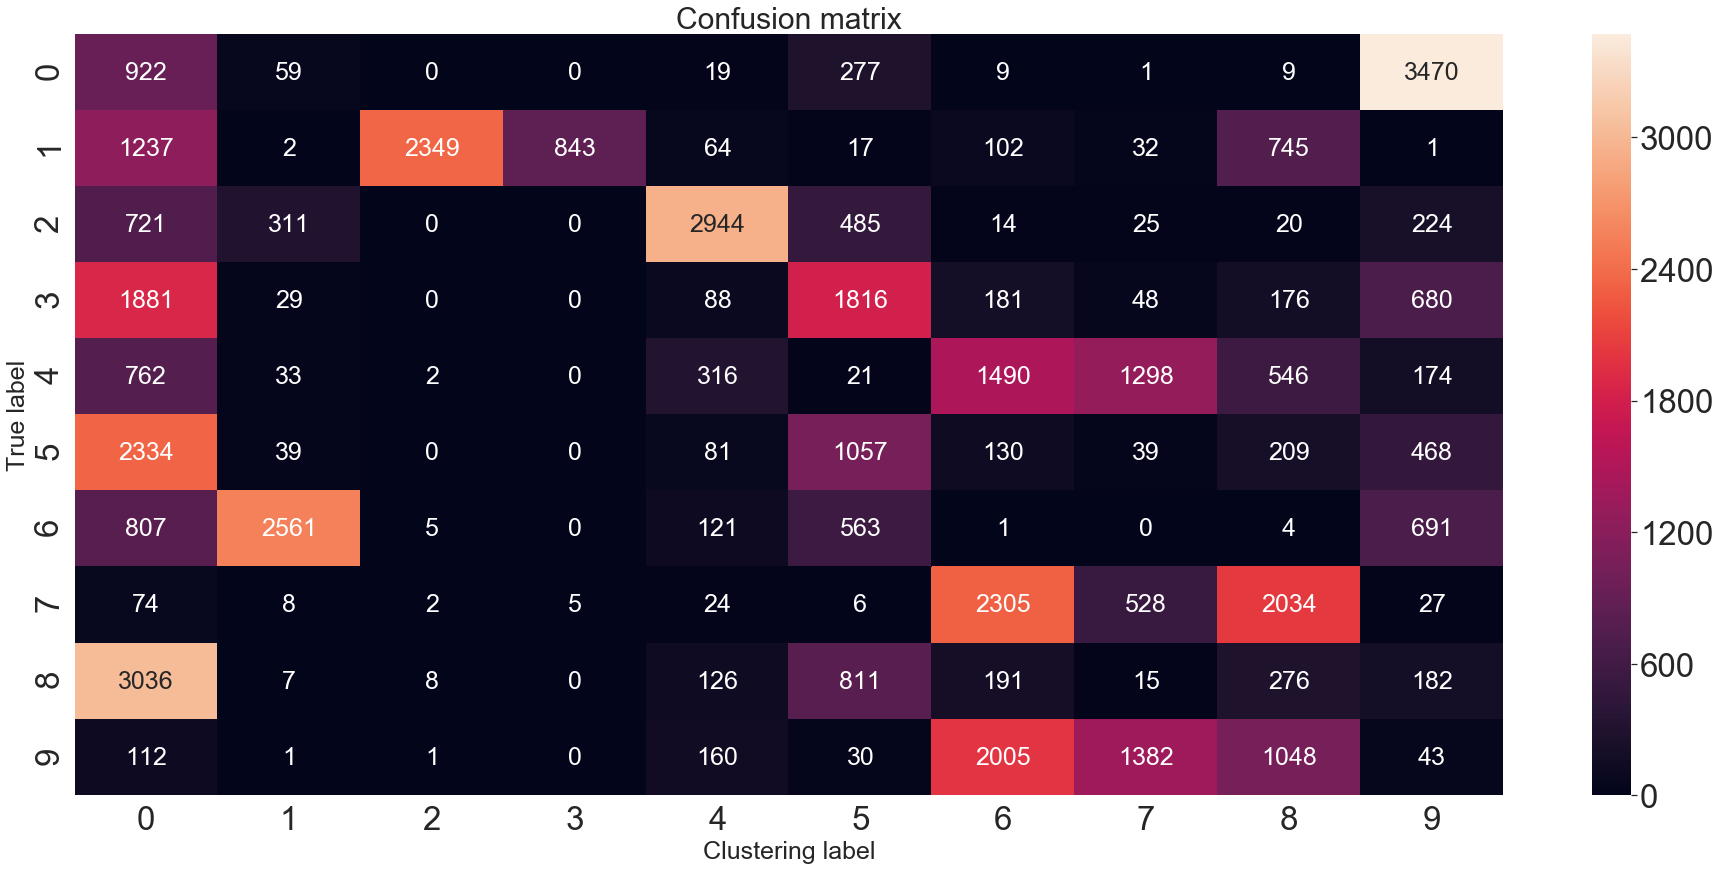

epoch:  22
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 10s 201us/sample - loss: 0.0323 - accuracy: 0.9587
Accuracy =  45.86666666666667  - Error =  54.13333333333333
silhouette_avg 0.30316448
last silhouette_avg 0.2992977
caso 3


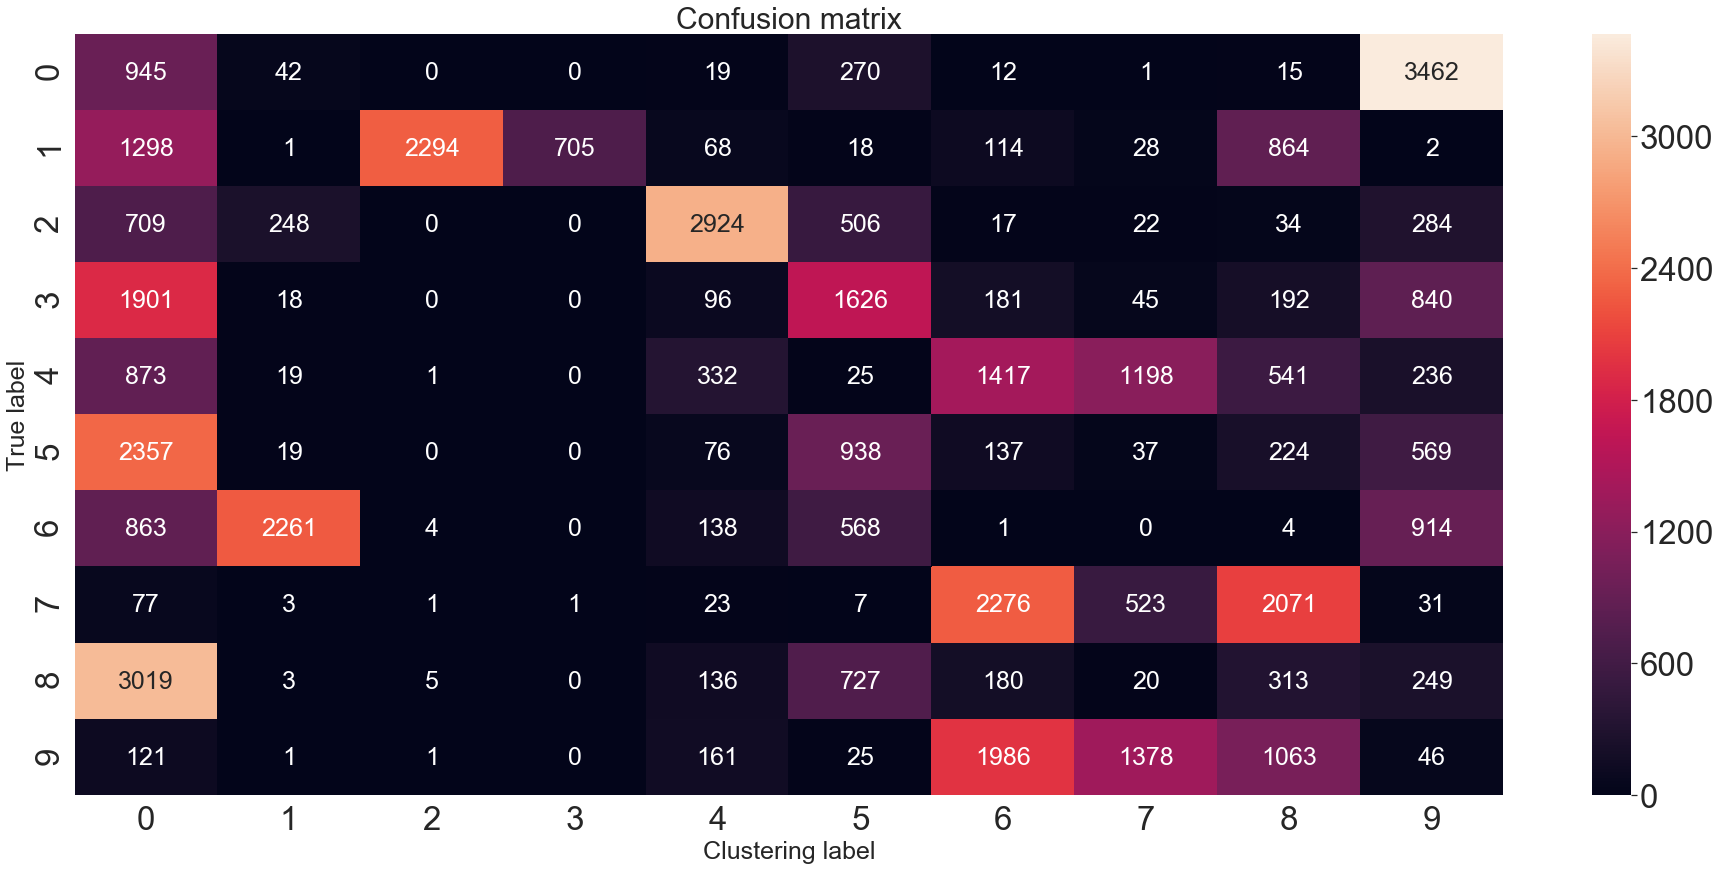

epoch:  23
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 11s 229us/sample - loss: 0.0384 - accuracy: 0.9536
Accuracy =  46.225  - Error =  53.77499999999999
silhouette_avg 0.29123634
last silhouette_avg 0.30316448
caso 2


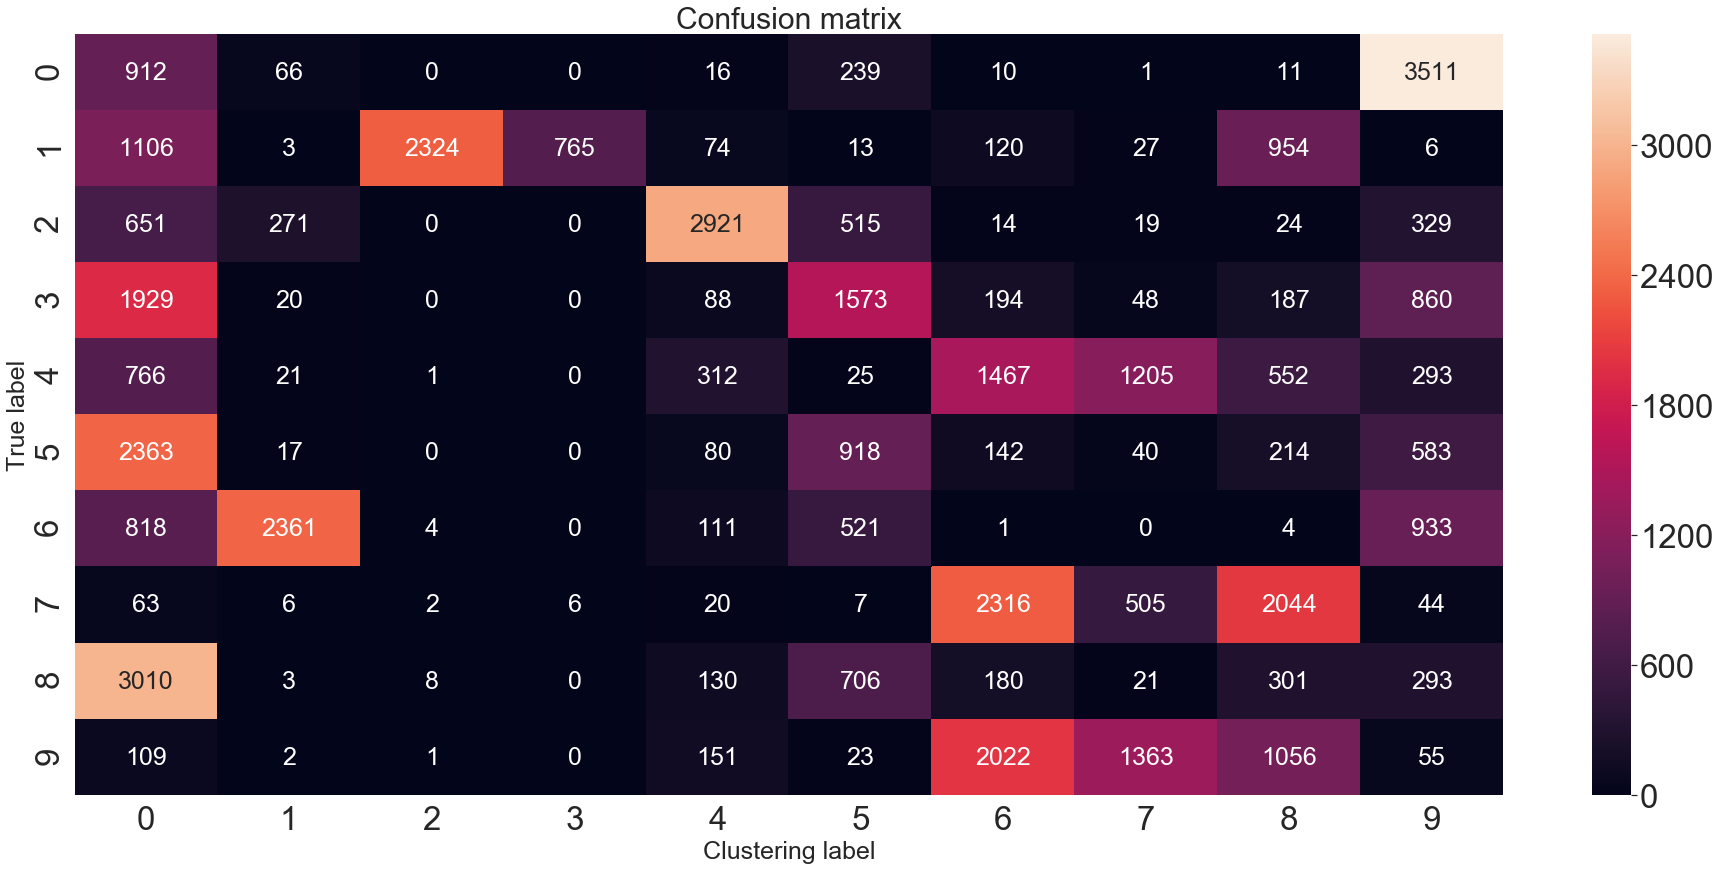

epoch:  24
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 167us/sample - loss: 0.0297 - accuracy: 0.9593
Accuracy =  46.016666666666666  - Error =  53.98333333333334
silhouette_avg 0.30167225
last silhouette_avg 0.30316448
caso 2


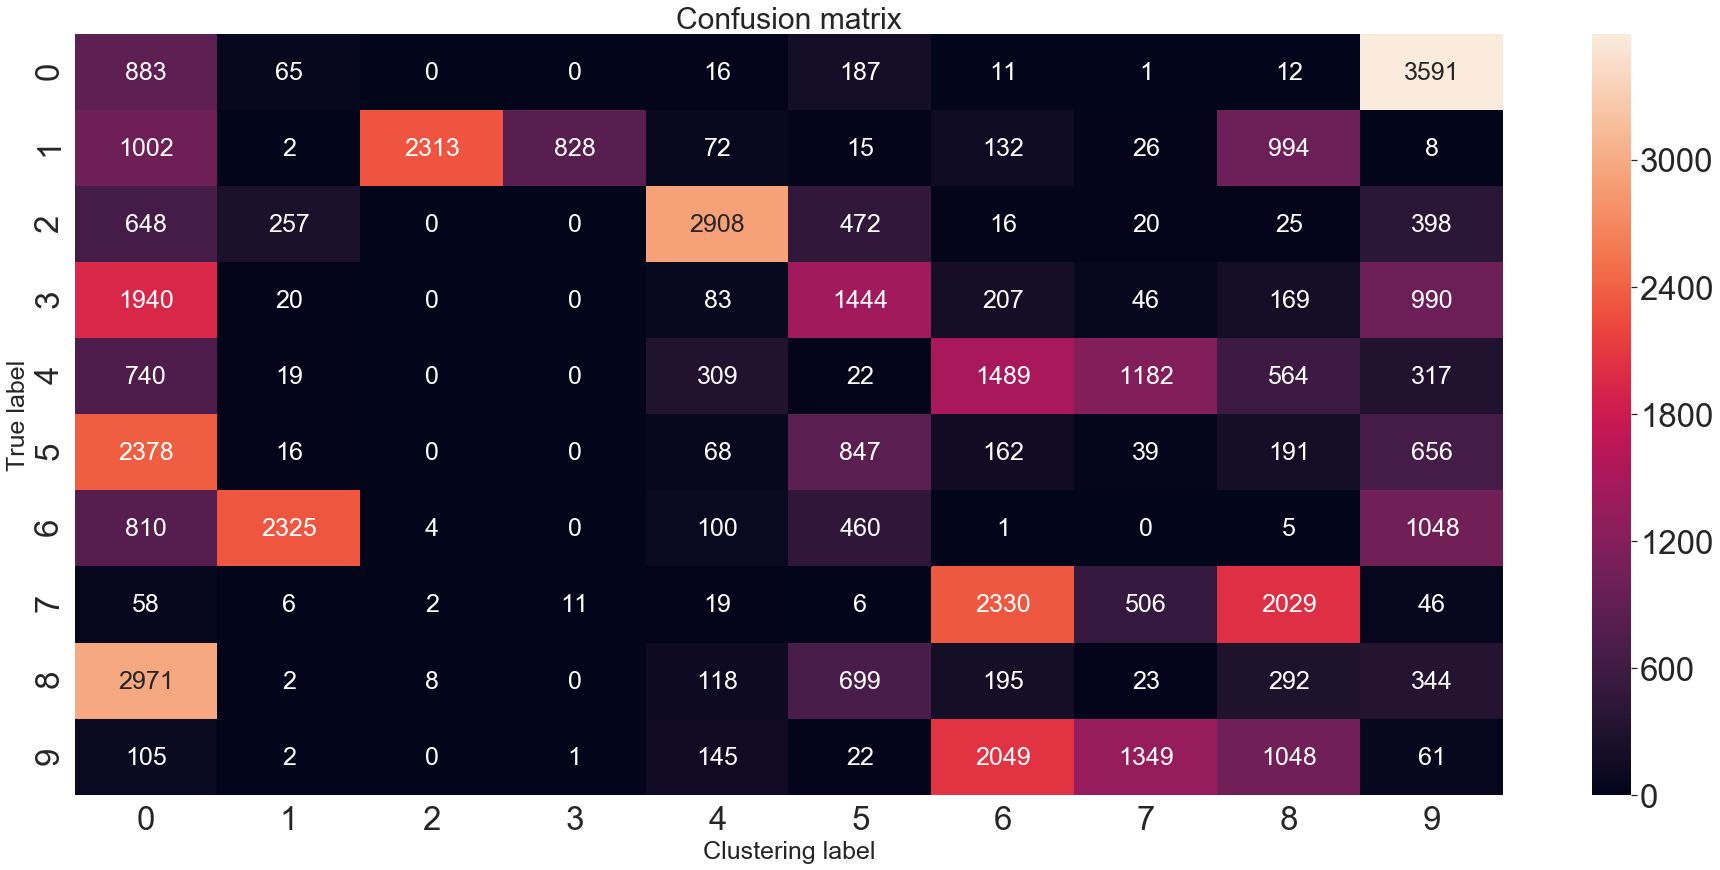

epoch:  25
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 9s 191us/sample - loss: 0.0296 - accuracy: 0.9582
Accuracy =  44.82083333333333  - Error =  55.17916666666667
silhouette_avg 0.3011418
last silhouette_avg 0.30316448
caso 2


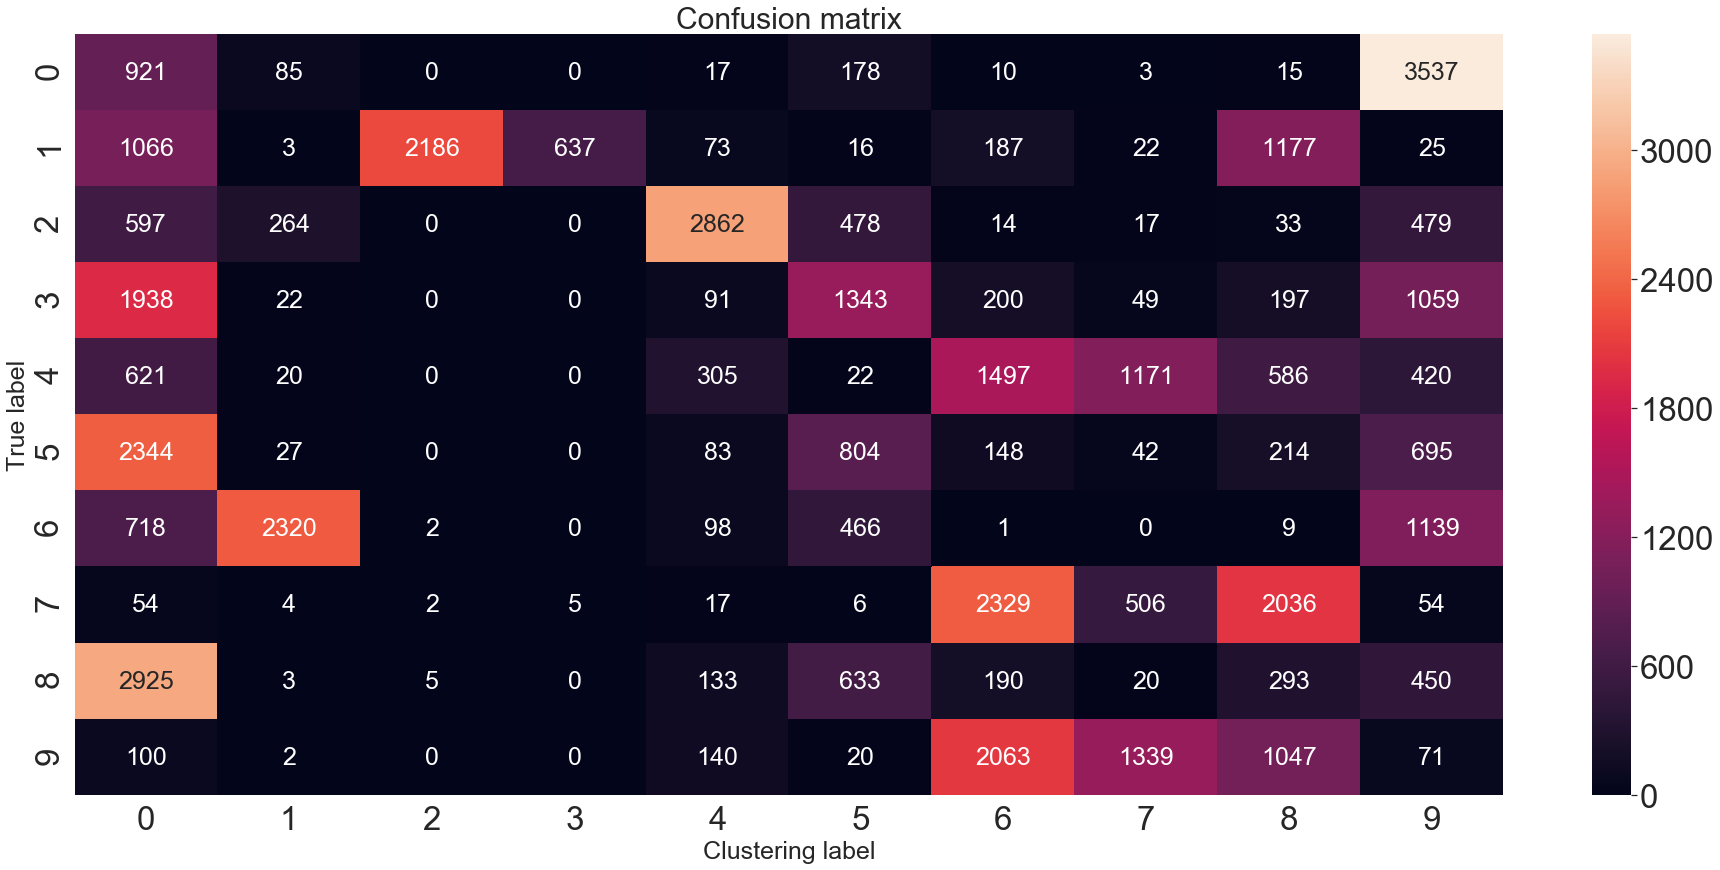

epoch:  26
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 8s 172us/sample - loss: 0.0362 - accuracy: 0.9553
Accuracy =  44.797916666666666  - Error =  55.20208333333333
silhouette_avg 0.307384
last silhouette_avg 0.30316448
caso 3


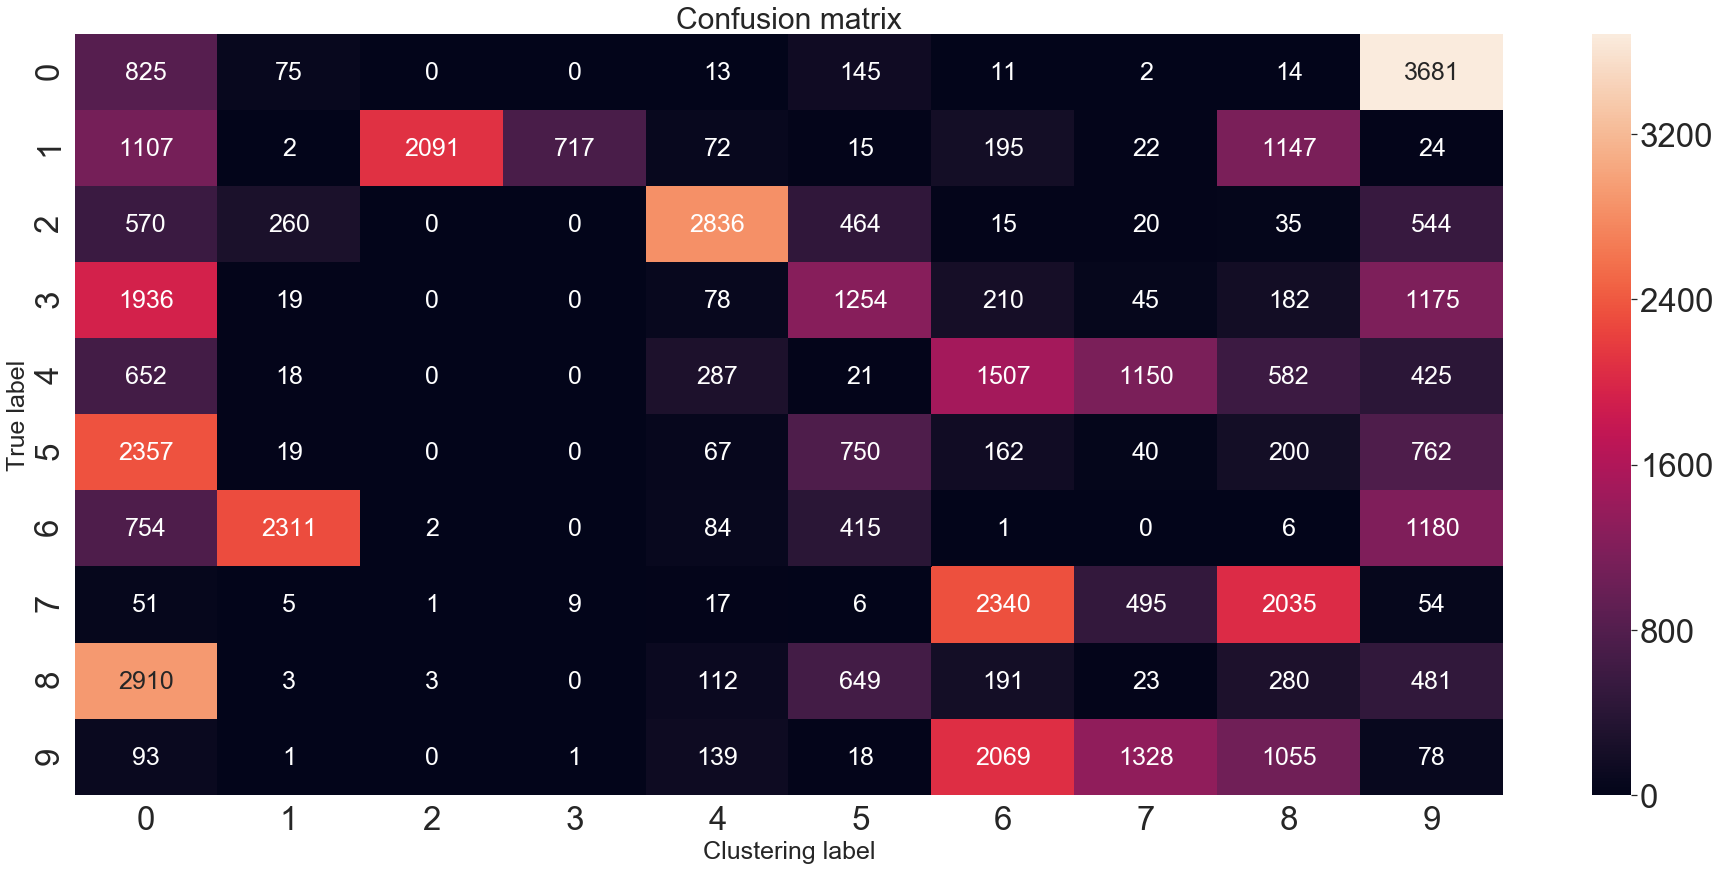

epoch:  27
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0283 - accuracy: 0.9638 - loss: 0.0282 - accu
Accuracy =  42.93125  - Error =  57.06875
silhouette_avg 0.24435909
last silhouette_avg 0.307384
caso 1
epoch:  28
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 10s 201us/sample - loss: 0.0351 - accuracy: 0.9649
Accuracy =  44.675  - Error =  55.325
silhouette_avg 0.29538757
last silhouette_avg 0.307384
caso 2


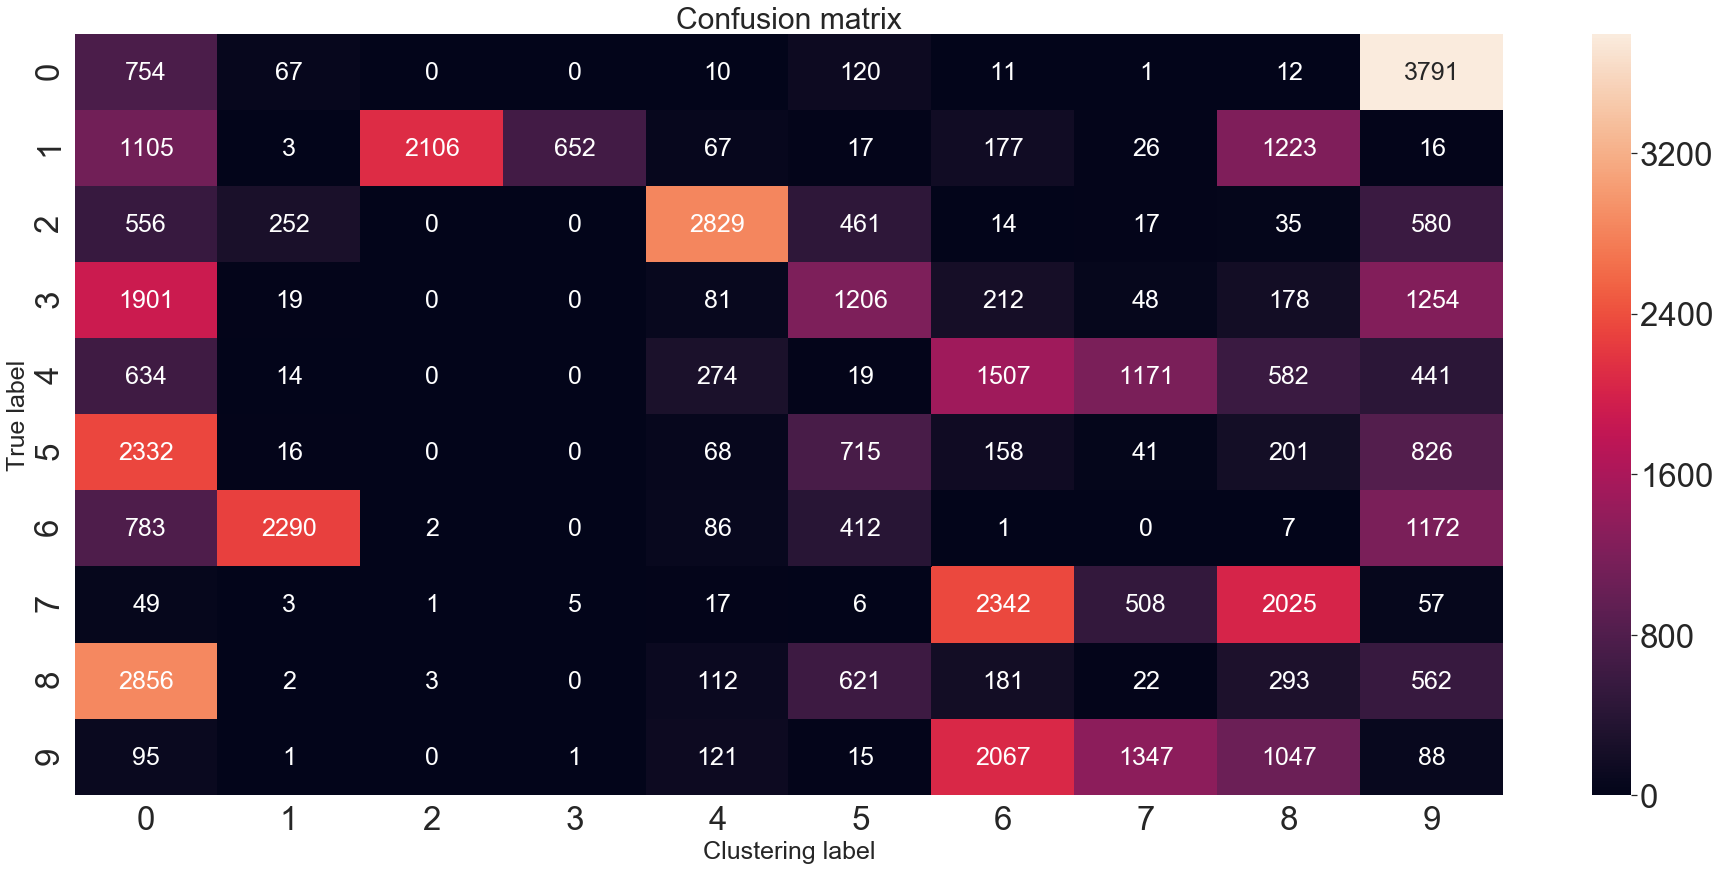

epoch:  29
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 15s 310us/sample - loss: 0.0263 - accuracy: 0.9666
Accuracy =  44.03125  - Error =  55.96875
silhouette_avg 0.29339498
last silhouette_avg 0.307384
caso 2


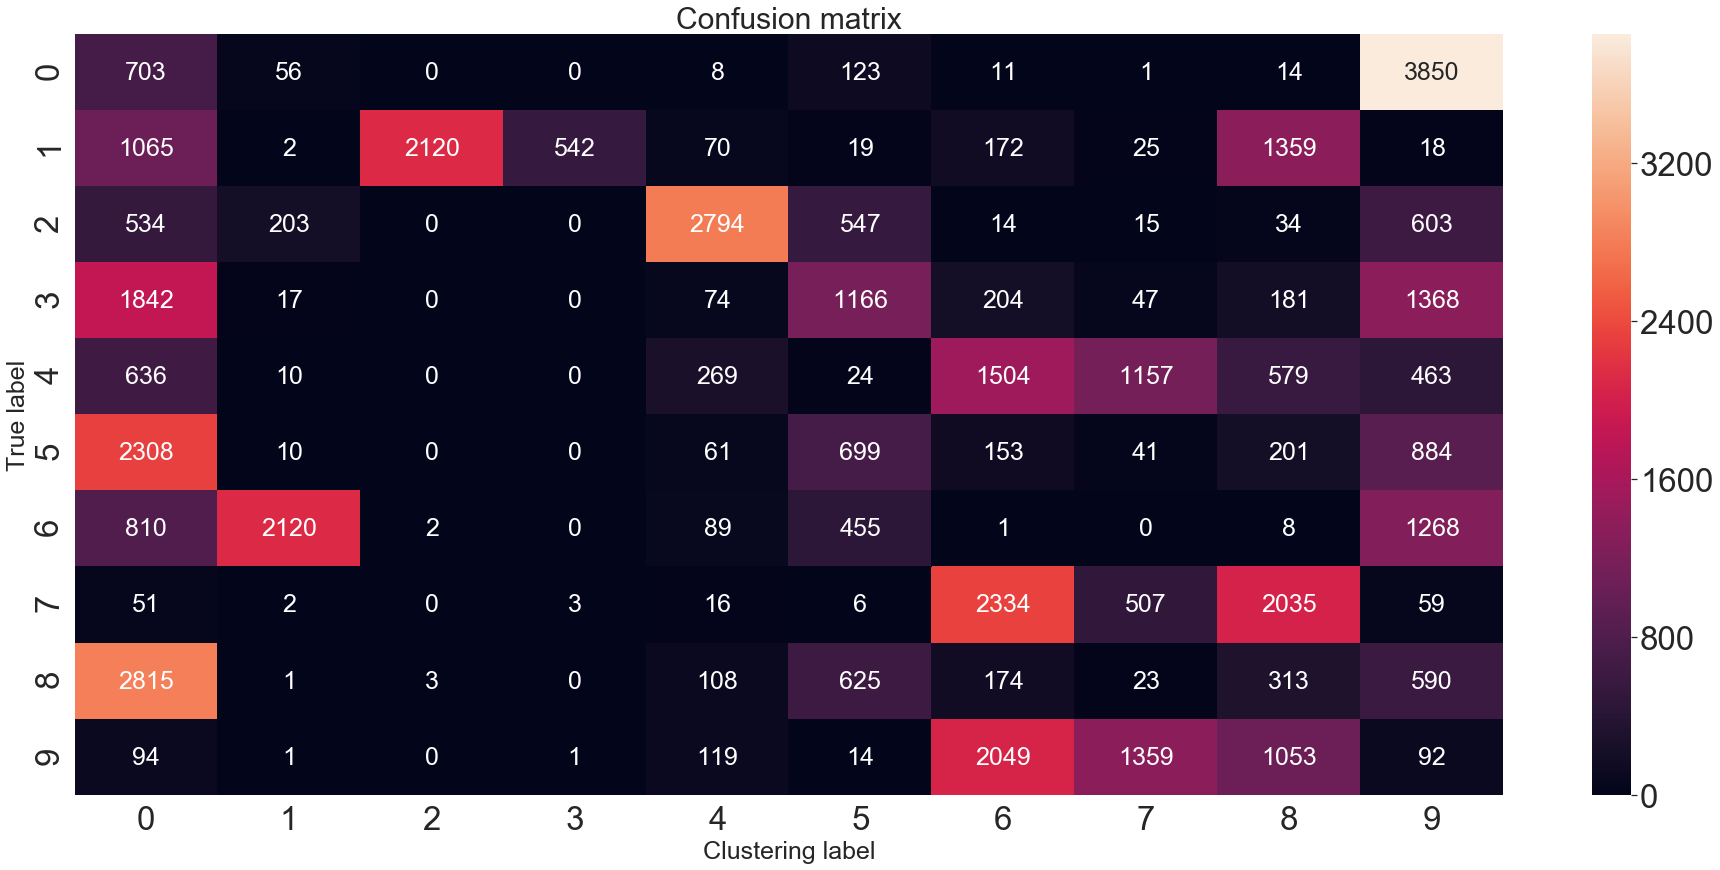

epoch:  30
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 18s 375us/sample - loss: 0.0284 - accuracy: 0.9651
Accuracy =  44.1375  - Error =  55.862500000000004
silhouette_avg 0.2955189
last silhouette_avg 0.307384
caso 2


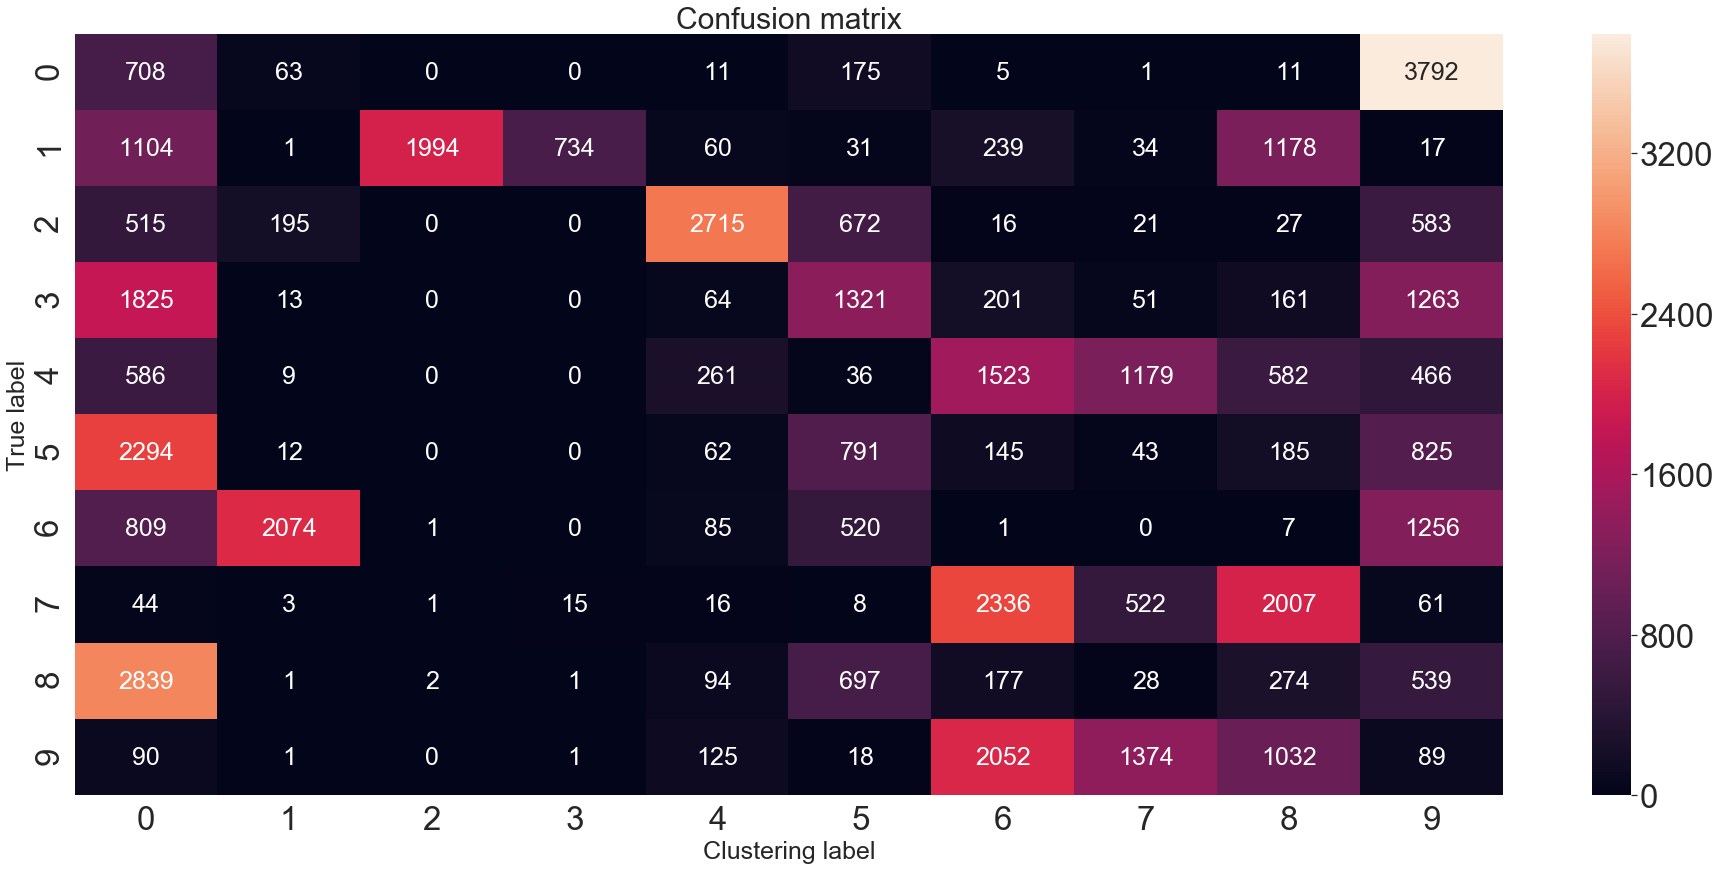

epoch:  31
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 14s 300us/sample - loss: 0.0243 - accuracy: 0.9657
Accuracy =  42.75208333333333  - Error =  57.24791666666667
silhouette_avg 0.31320214
last silhouette_avg 0.307384
caso 3


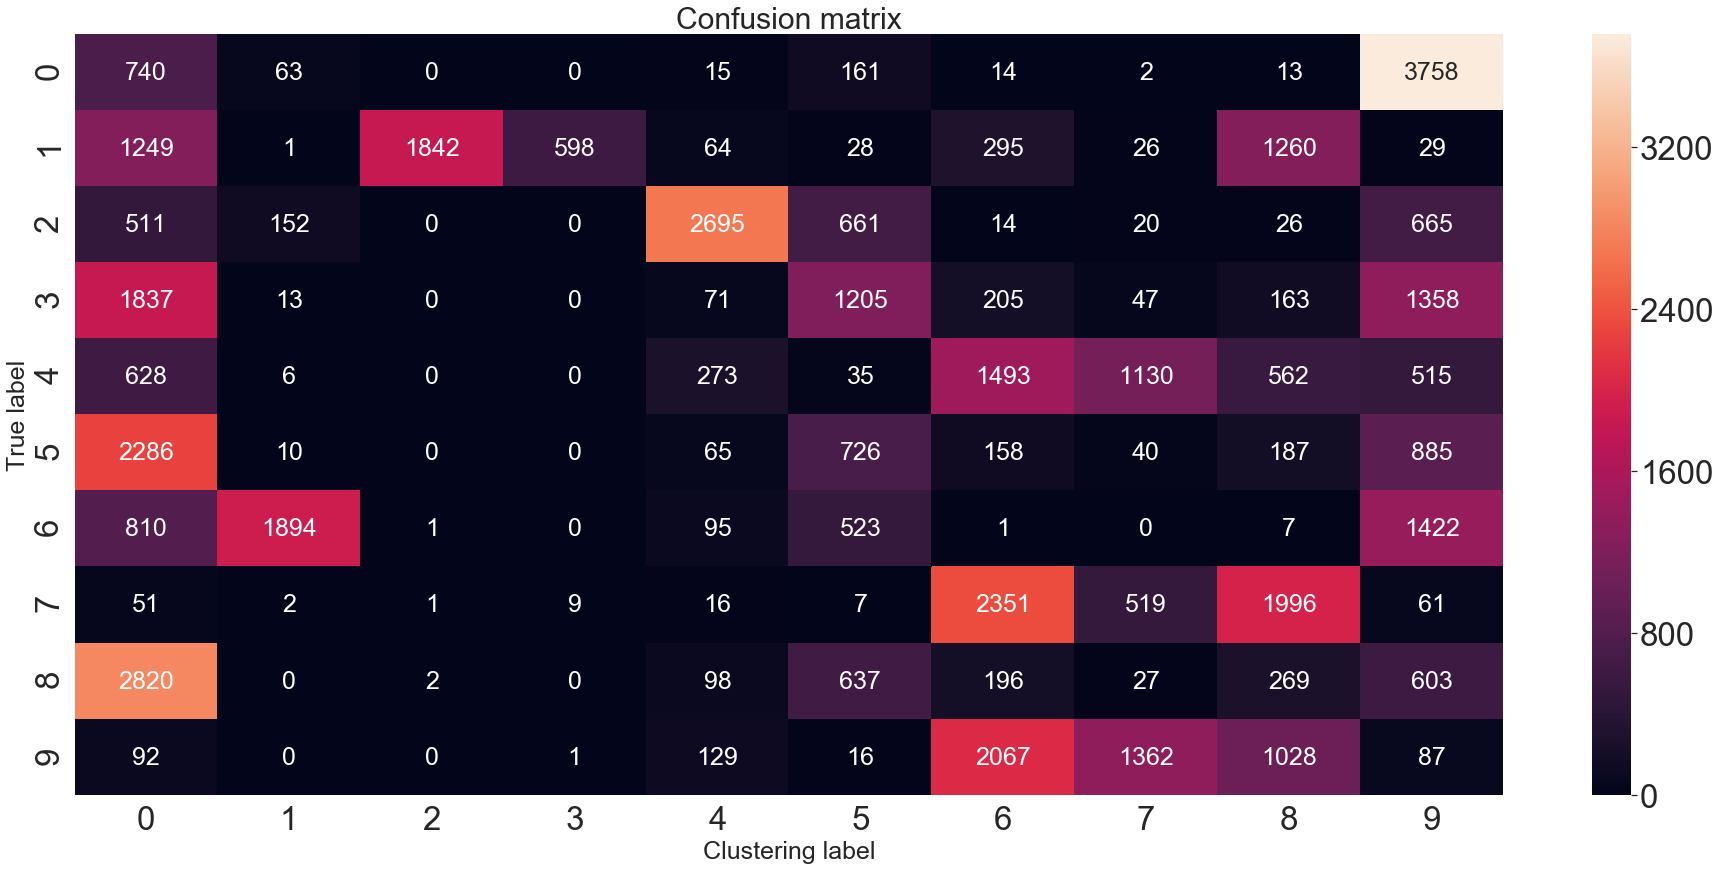

epoch:  32
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 17s 347us/sample - loss: 0.0297 - accuracy: 0.9672
Accuracy =  43.666666666666664  - Error =  56.333333333333336
silhouette_avg 0.30520788
last silhouette_avg 0.31320214
caso 2


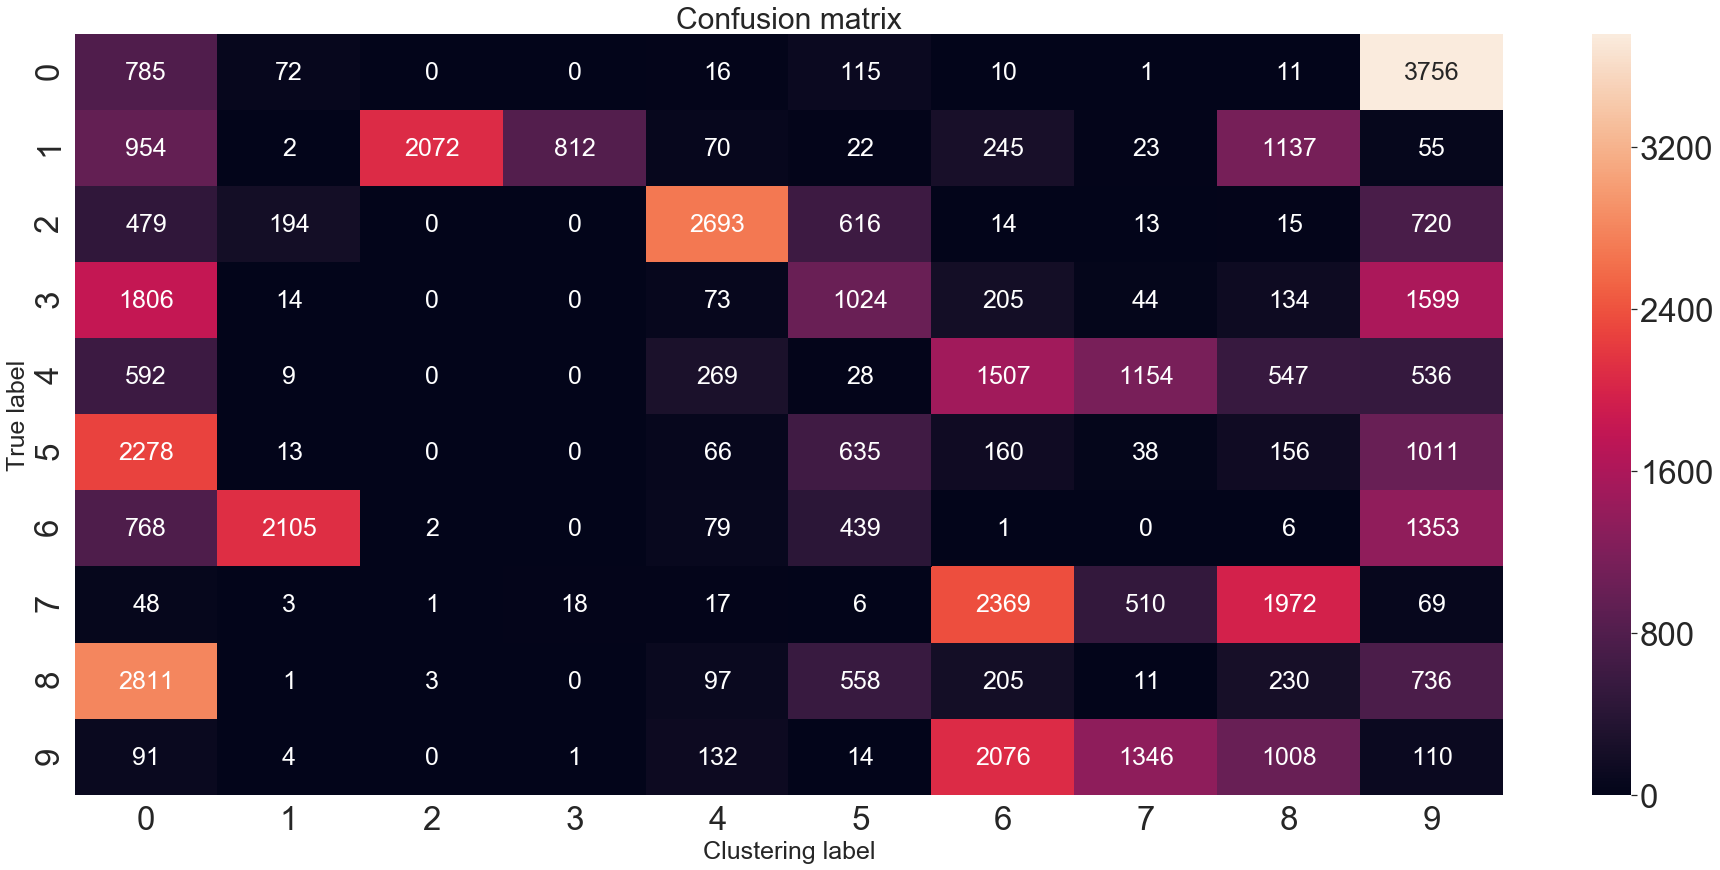

epoch:  33
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 16s 340us/sample - loss: 0.0289 - accuracy: 0.9647
Accuracy =  42.983333333333334  - Error =  57.01666666666667
silhouette_avg 0.31648403
last silhouette_avg 0.31320214
caso 3


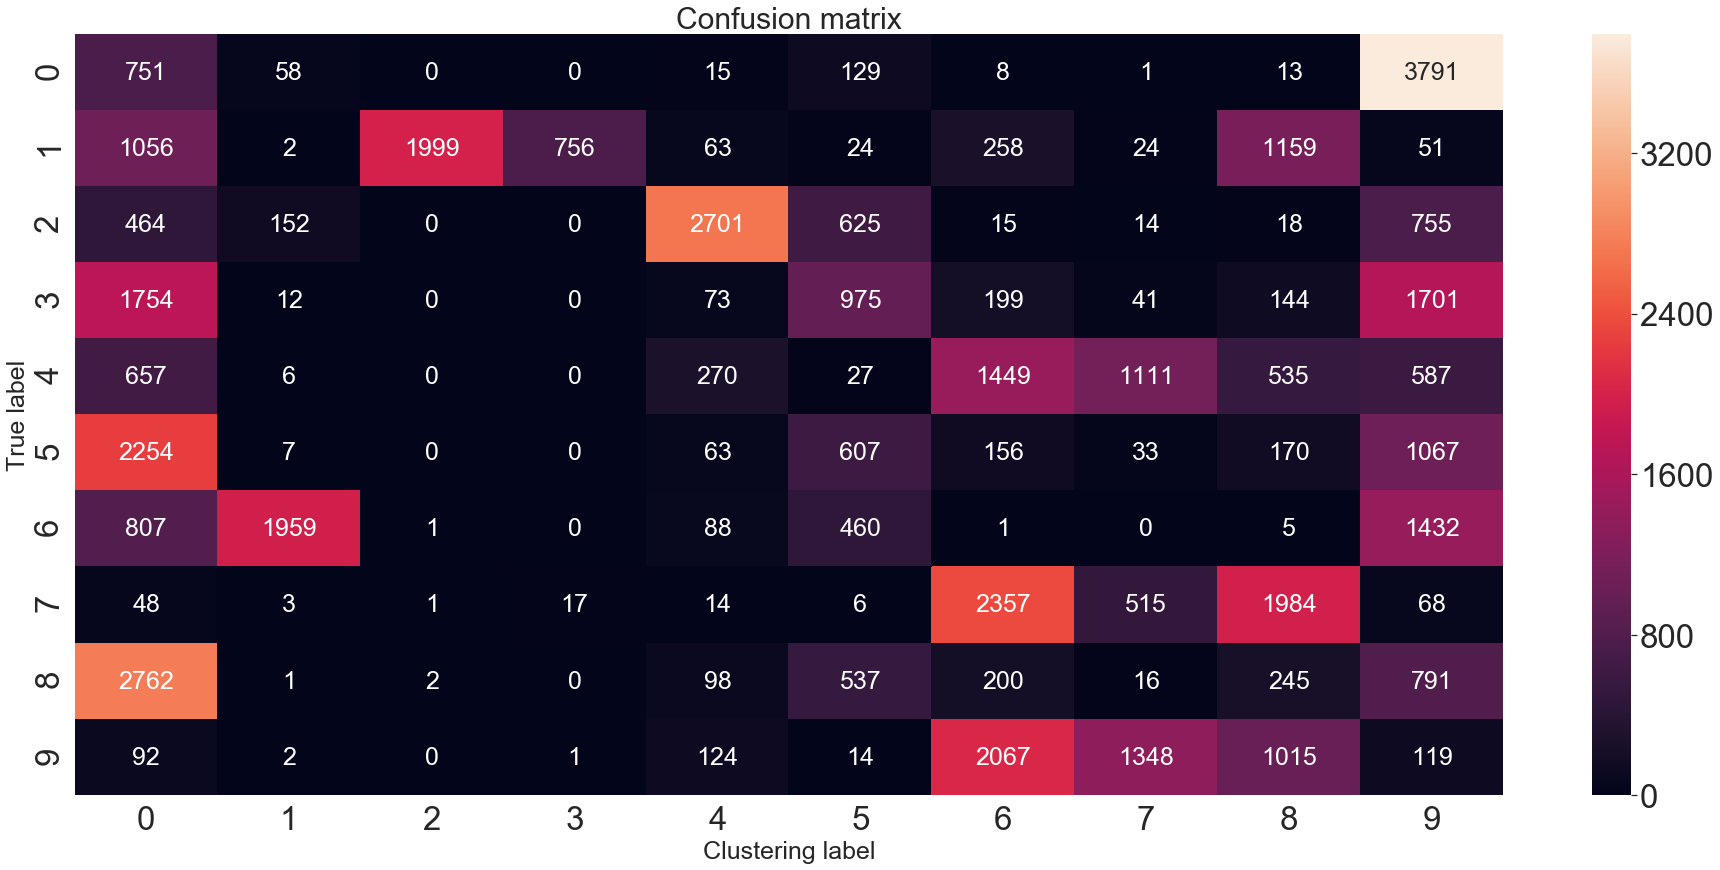

epoch:  34
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 10s 202us/sample - loss: 0.0320 - accuracy: 0.9645
Accuracy =  42.27708333333333  - Error =  57.72291666666667
silhouette_avg 0.31132612
last silhouette_avg 0.31648403
caso 2


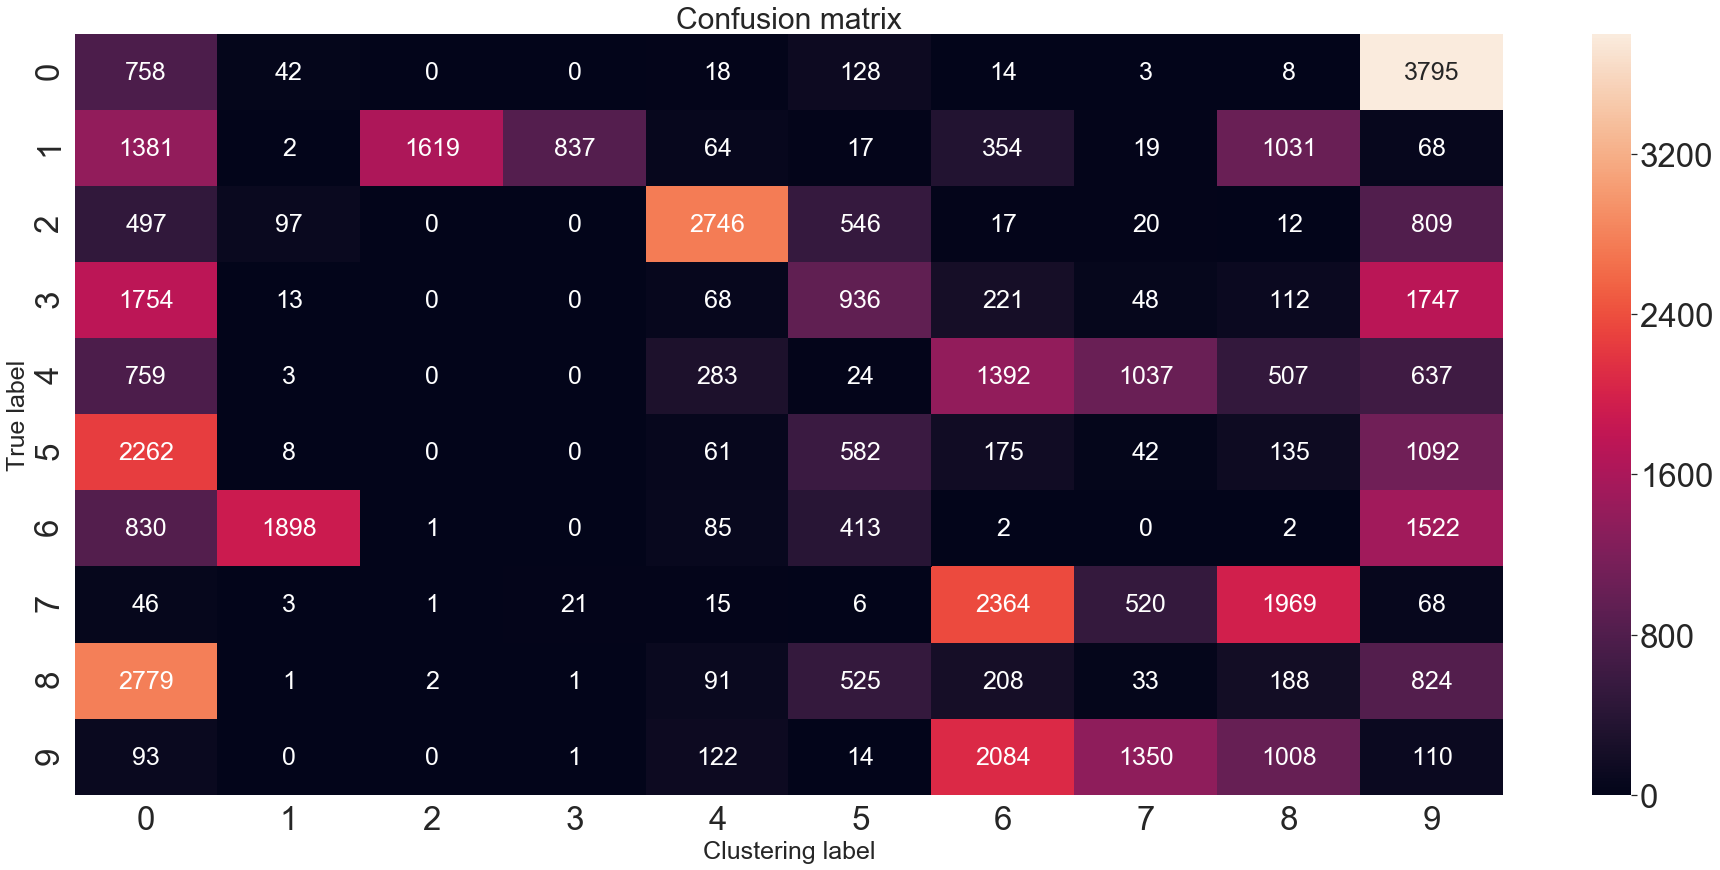

epoch:  35
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 12s 241us/sample - loss: 0.0306 - accuracy: 0.9601
Accuracy =  42.44791666666667  - Error =  57.552083333333336
silhouette_avg 0.30809692
last silhouette_avg 0.31648403
caso 2


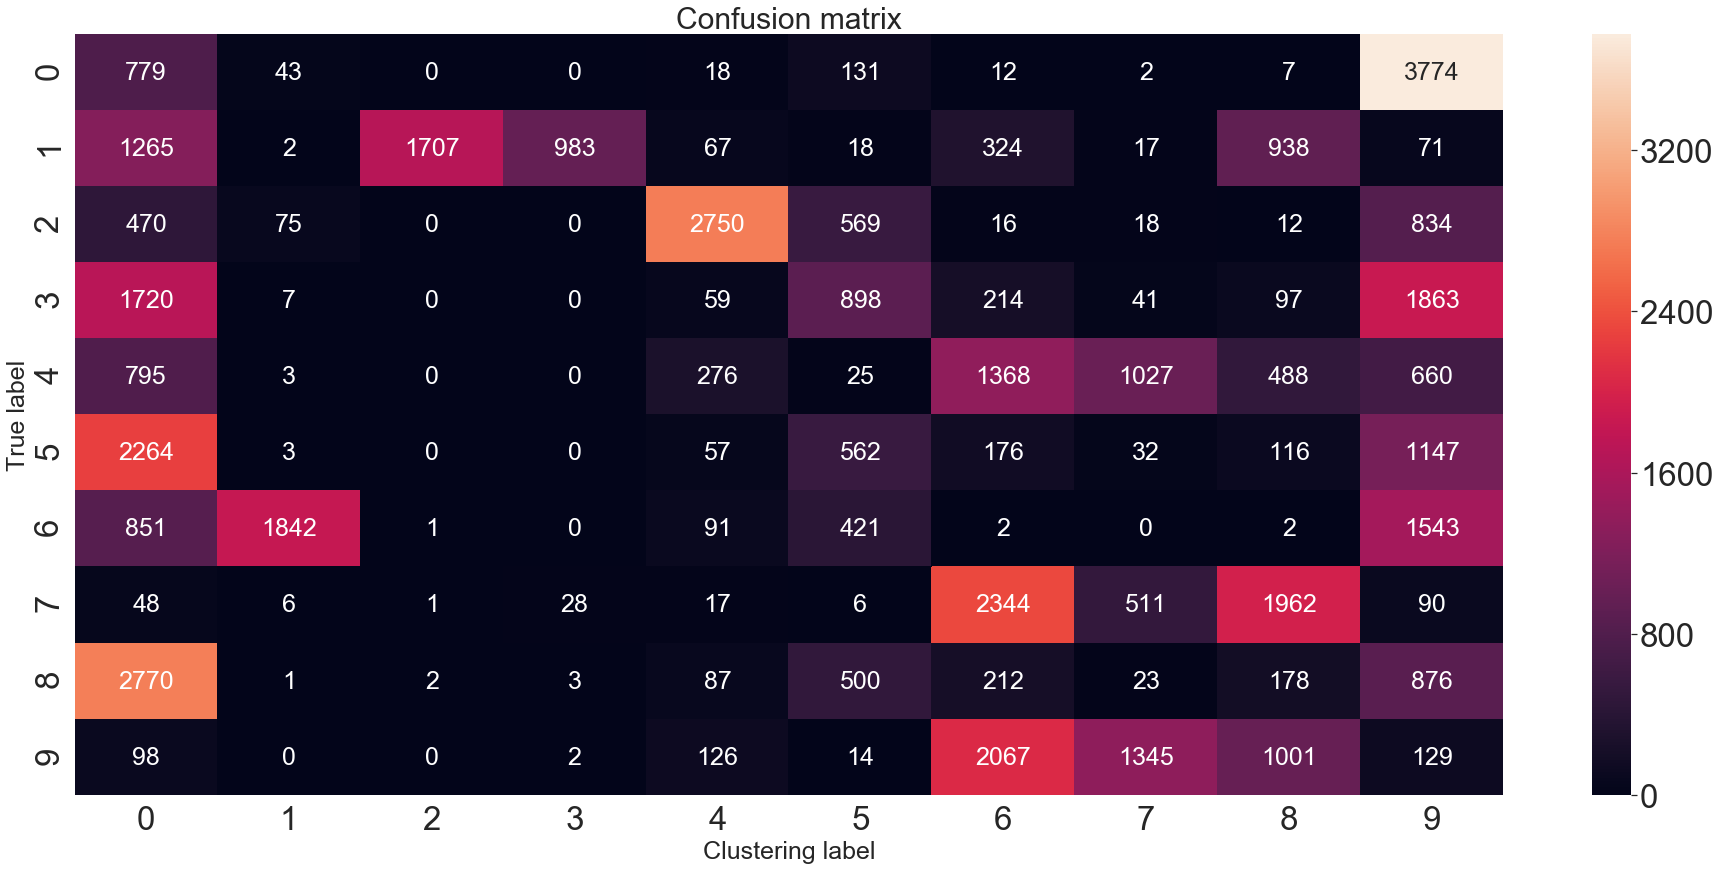

epoch:  36
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 16s 326us/sample - loss: 0.0348 - accuracy: 0.9616
Accuracy =  42.49166666666667  - Error =  57.508333333333326
silhouette_avg 0.2963368
last silhouette_avg 0.31648403
caso 2


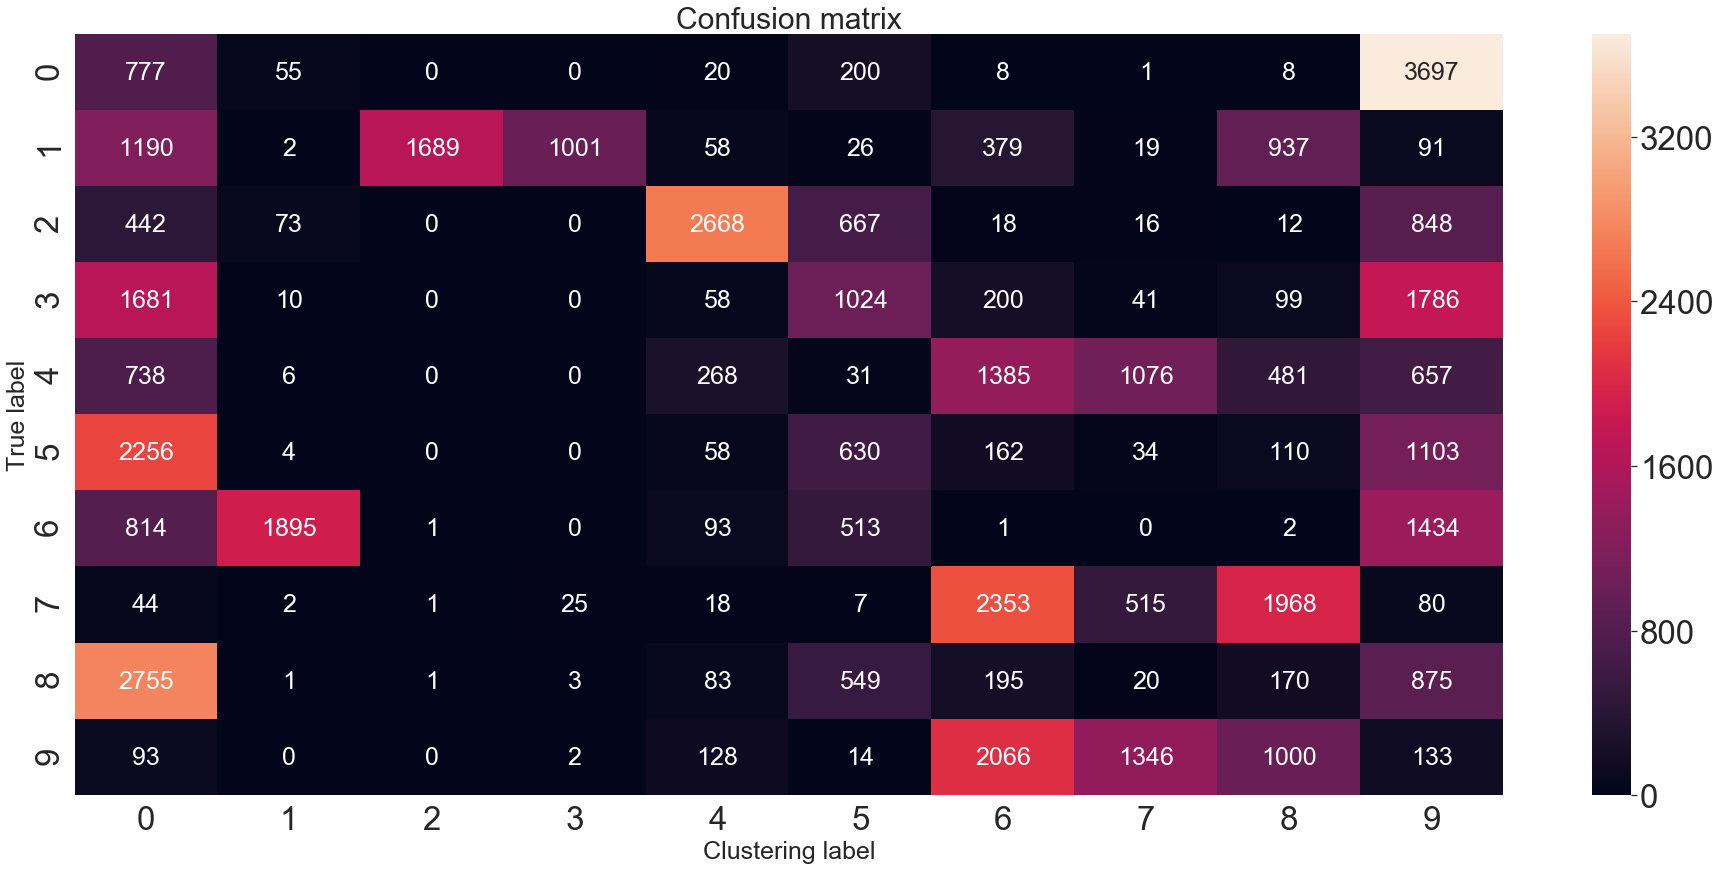

epoch:  37
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 16s 344us/sample - loss: 0.0318 - accuracy: 0.9650
Accuracy =  41.641666666666666  - Error =  58.358333333333334
silhouette_avg 0.29985633
last silhouette_avg 0.31648403
caso 2


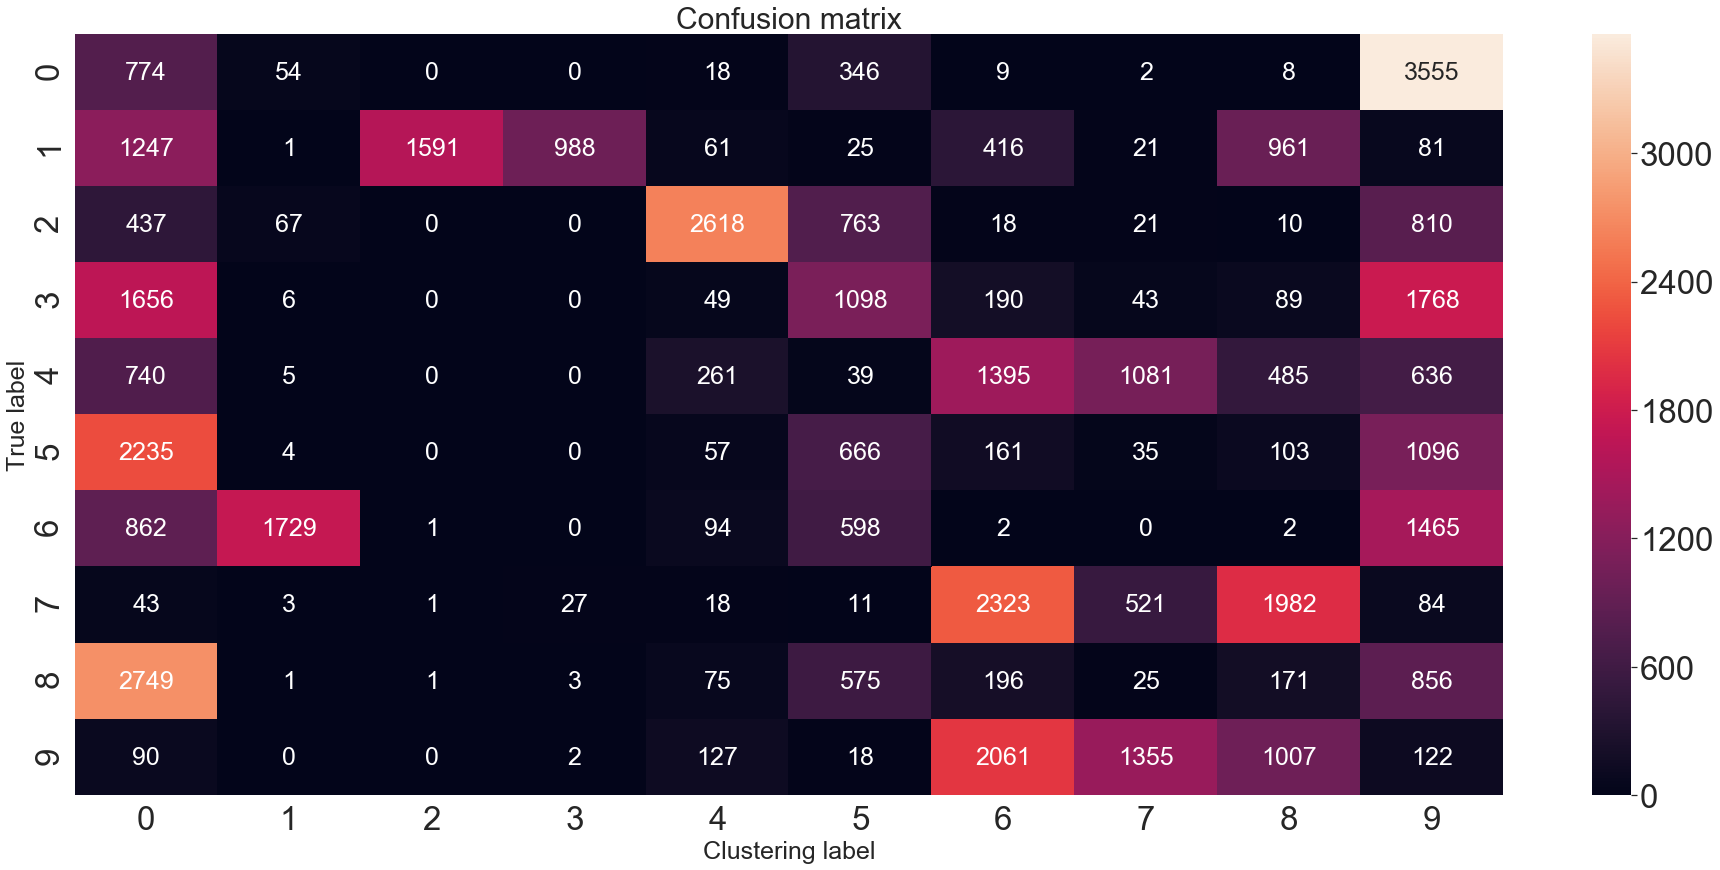

epoch:  38
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 18s 375us/sample - loss: 0.0357 - accuracy: 0.9596
Accuracy =  41.10625  - Error =  58.89375
silhouette_avg 0.2943845
last silhouette_avg 0.31648403
caso 2


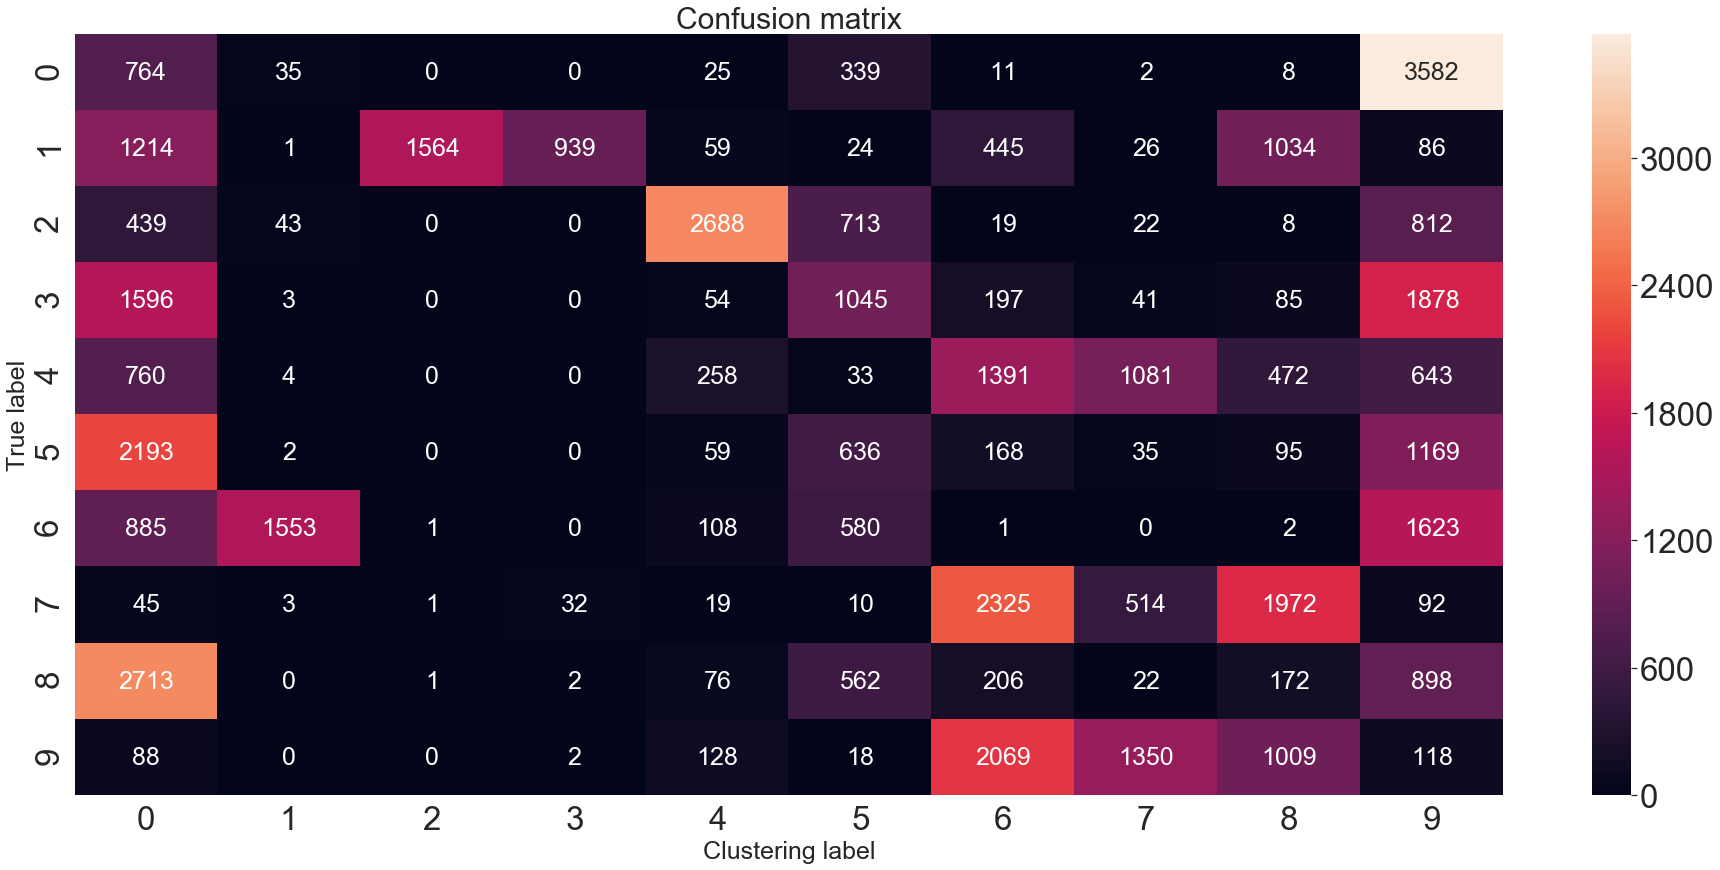

epoch:  39
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 16s 340us/sample - loss: 0.0334 - accuracy: 0.9615
Accuracy =  40.025  - Error =  59.975
silhouette_avg 0.29313964
last silhouette_avg 0.31648403
caso 2


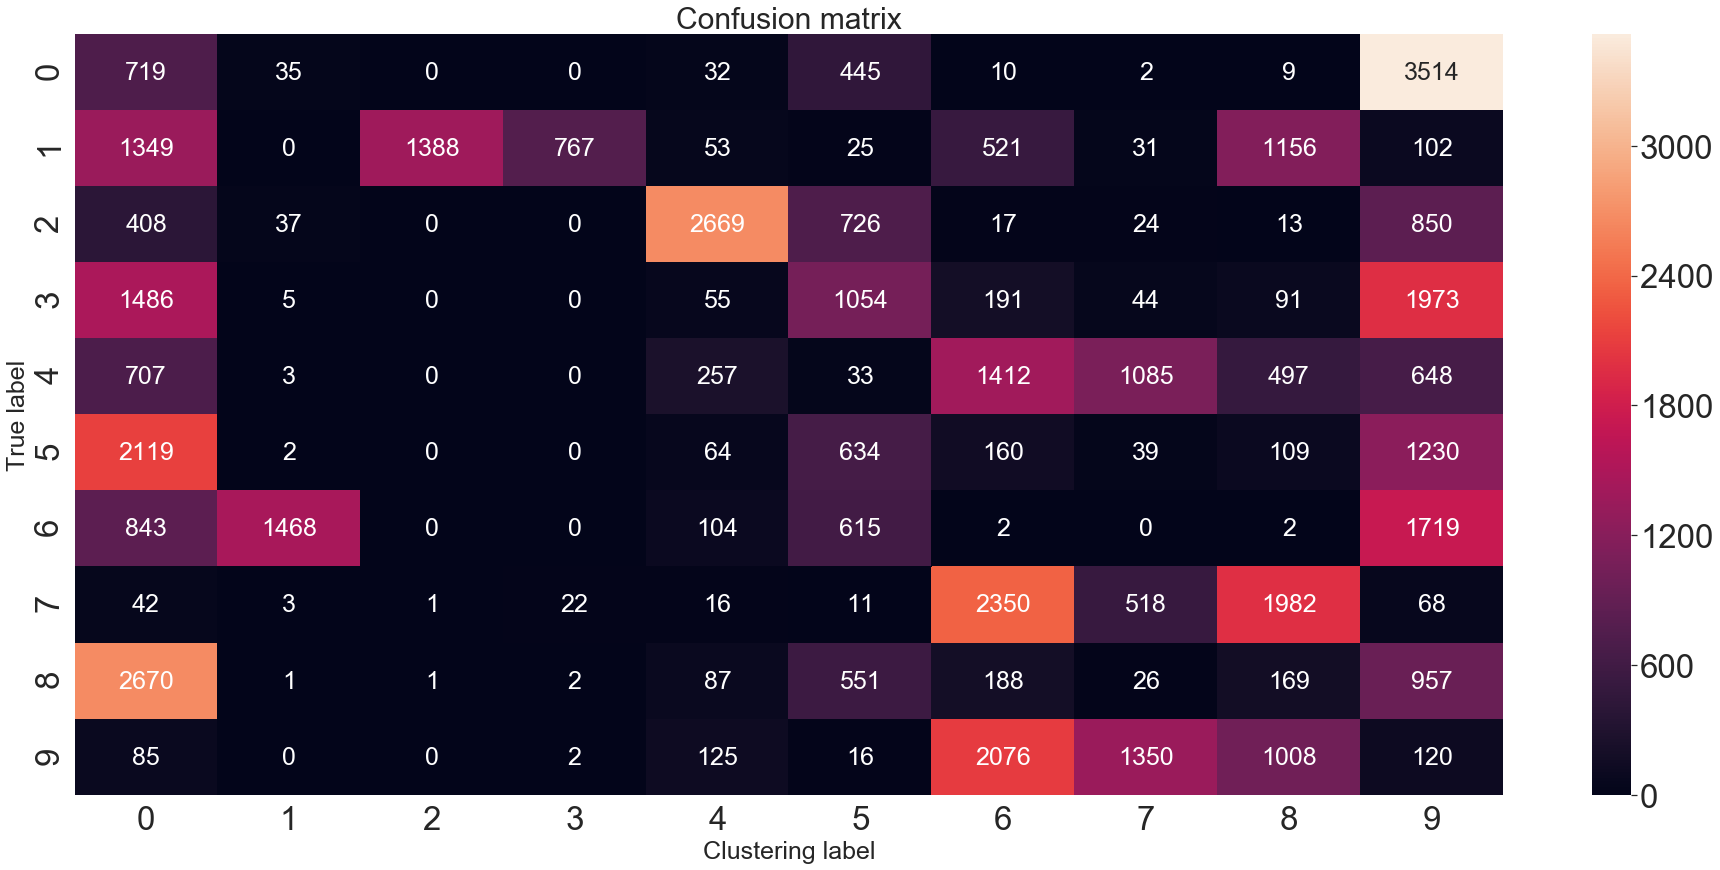

epoch:  40
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 20s 416us/sample - loss: 0.0318 - accuracy: 0.9601
Accuracy =  39.795833333333334  - Error =  60.20416666666667
silhouette_avg 0.30756485
last silhouette_avg 0.31648403
caso 2


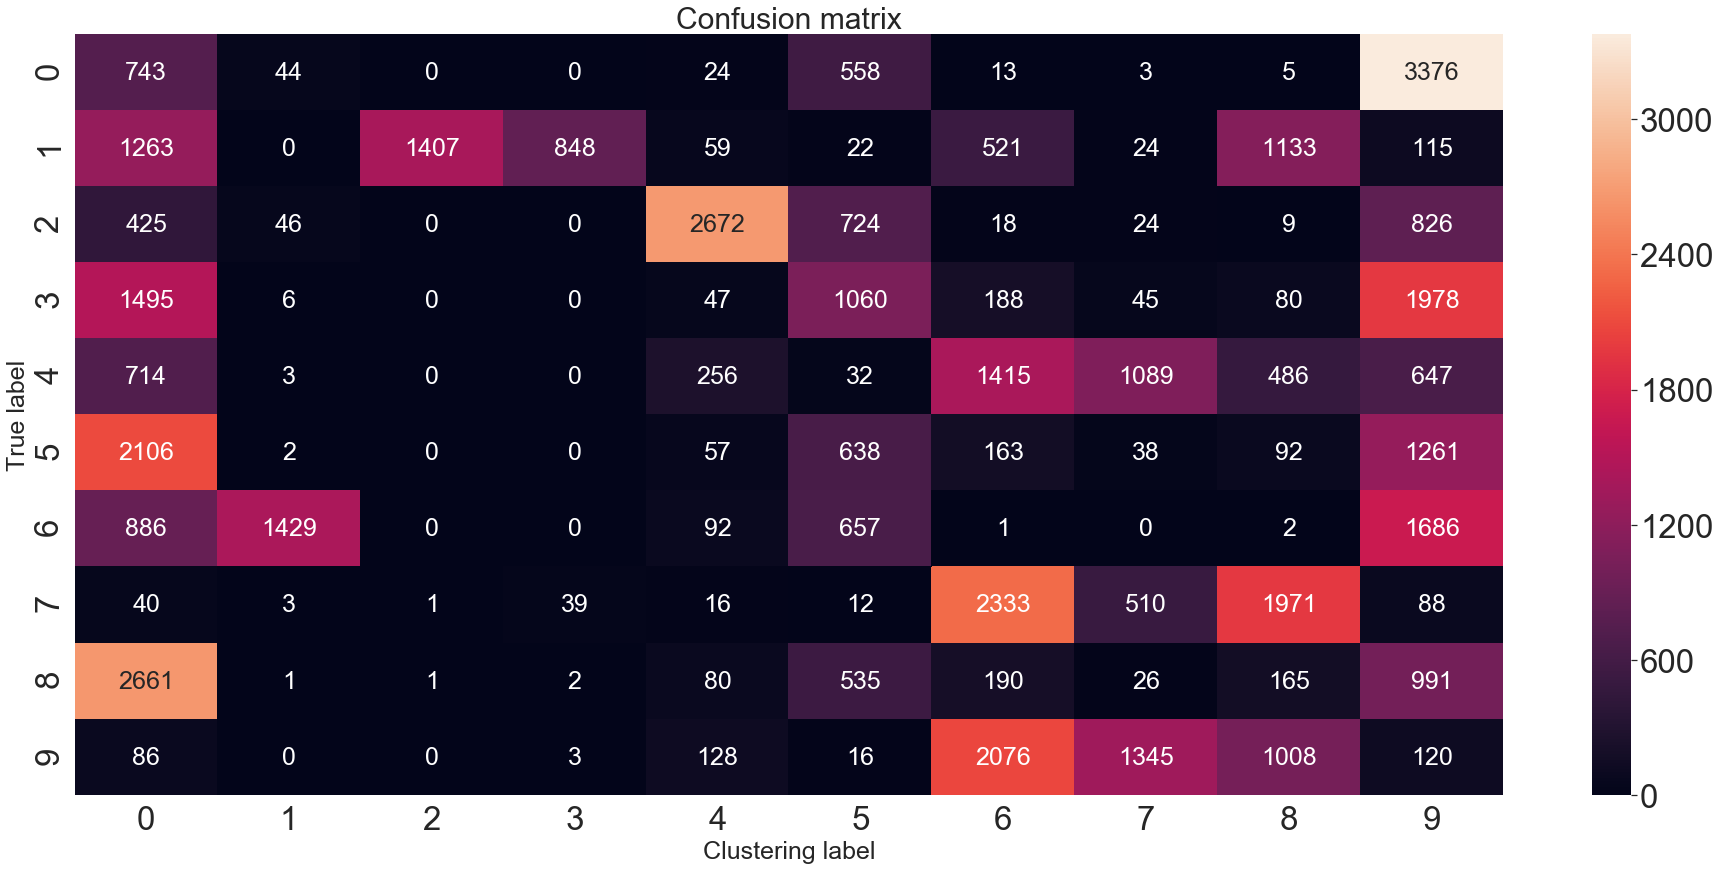

epoch:  41
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 16s 342us/sample - loss: 0.0386 - accuracy: 0.9571
Accuracy =  37.104166666666664  - Error =  62.89583333333333
silhouette_avg 0.28695828
last silhouette_avg 0.31648403
caso 1
epoch:  42
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 18s 376us/sample - loss: 0.0449 - accuracy: 0.9594
Accuracy =  39.94583333333333  - Error =  60.05416666666667
silhouette_avg 0.2926755
last silhouette_avg 0.31648403
caso 2


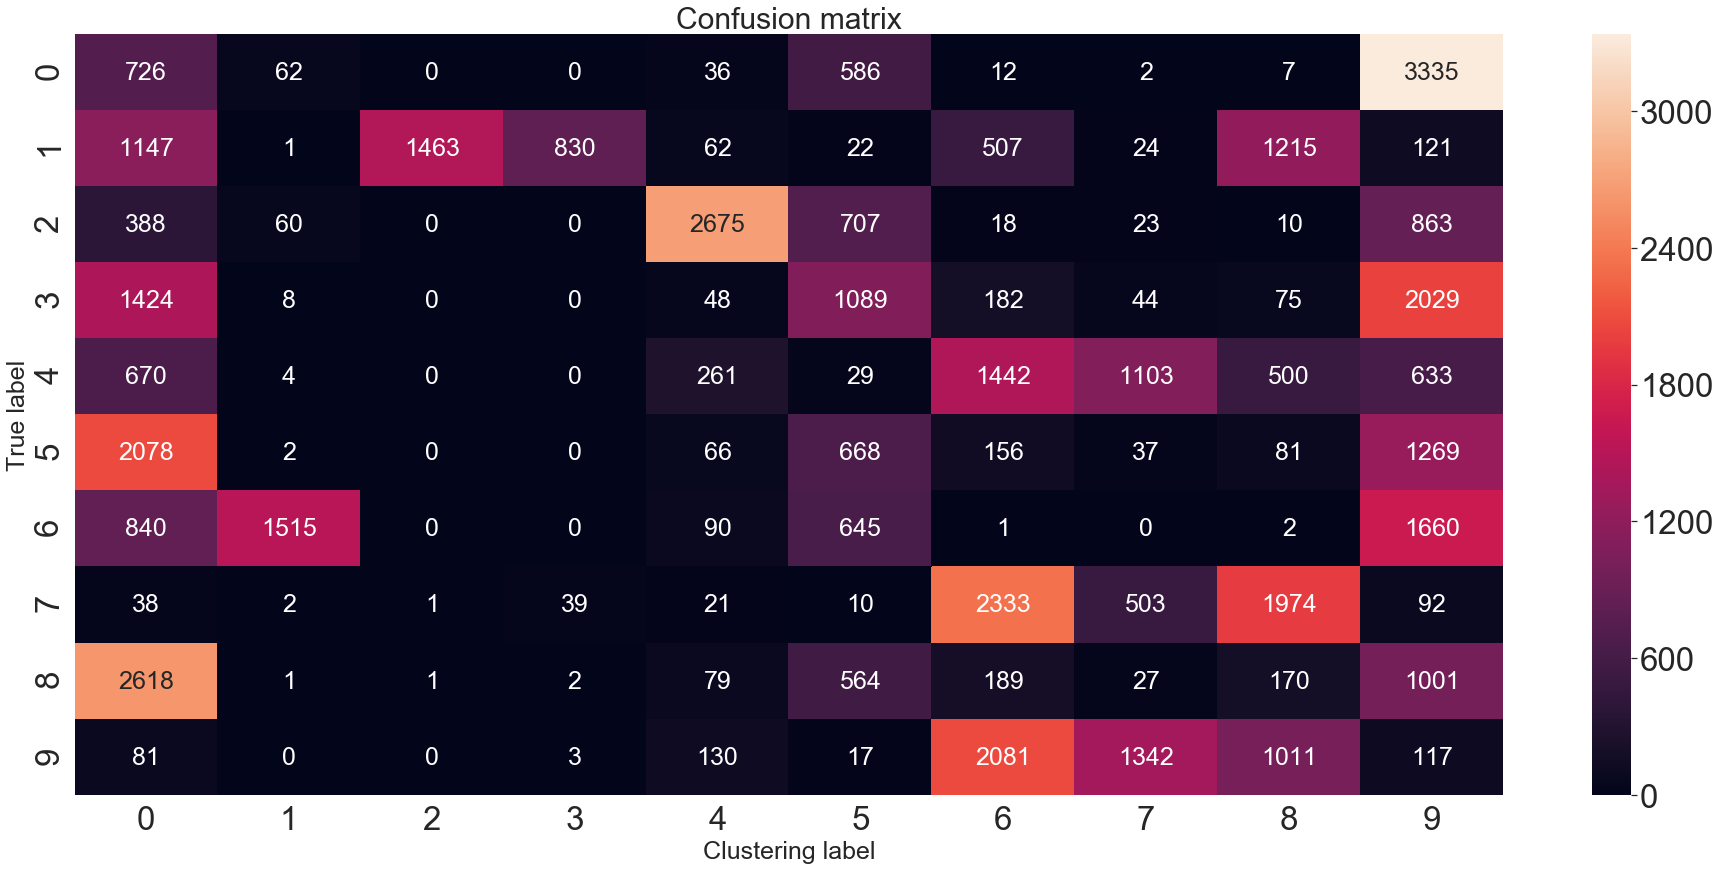

epoch:  43
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 16s 338us/sample - loss: 0.0335 - accuracy: 0.9625
Accuracy =  38.46875  - Error =  61.53125000000001
silhouette_avg 0.2979277
last silhouette_avg 0.31648403
caso 2


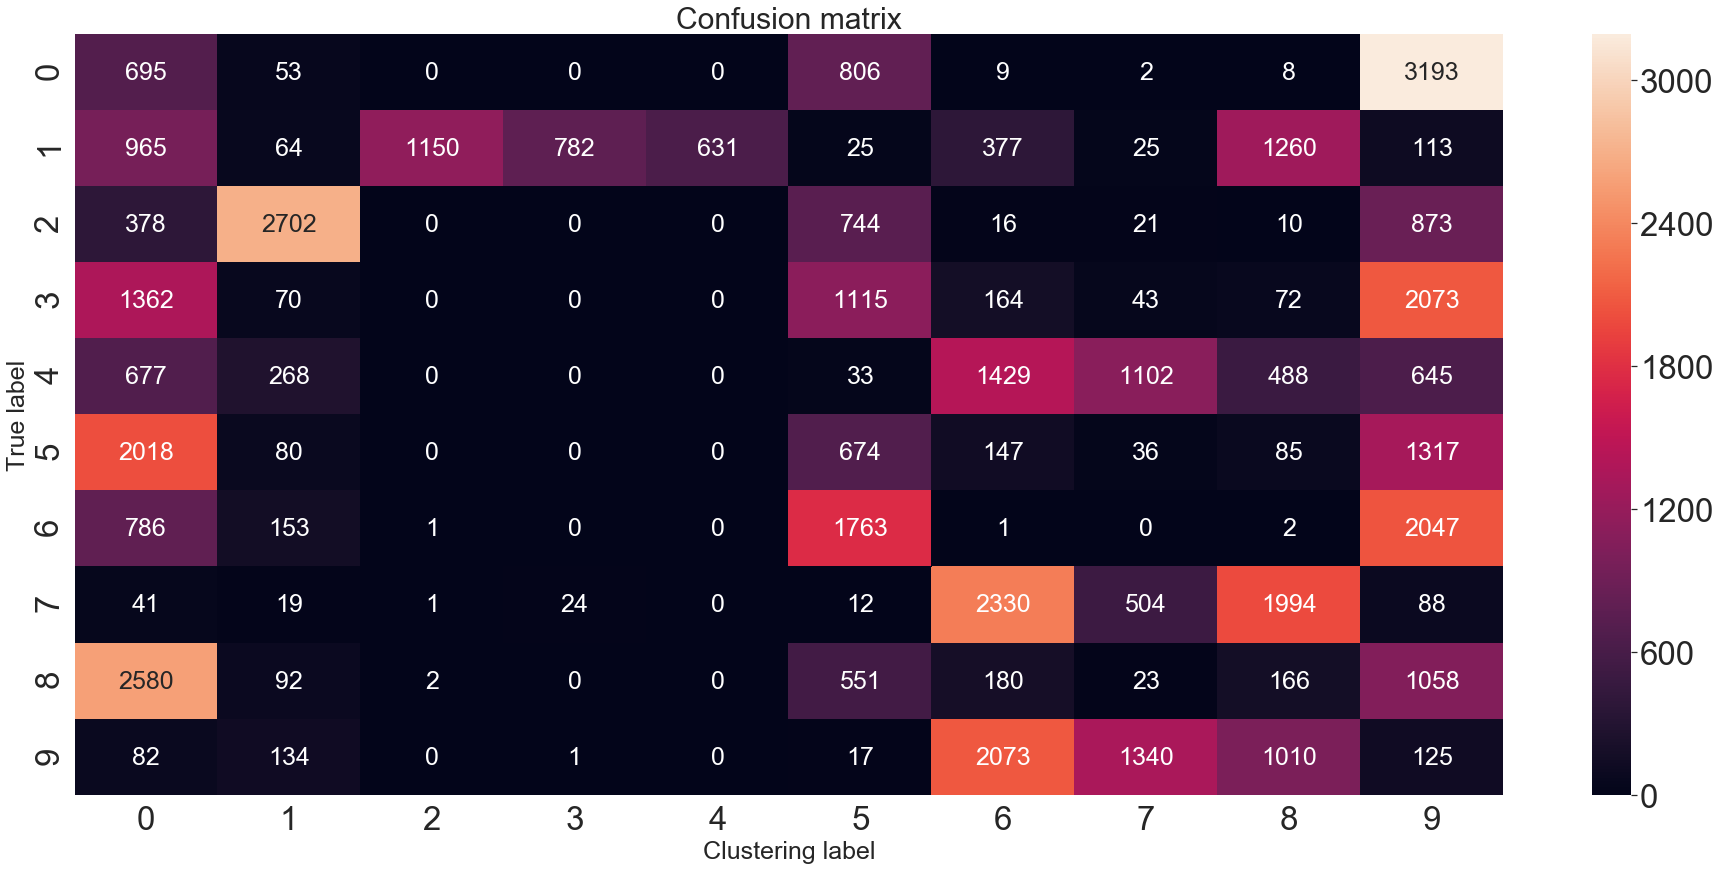

epoch:  44
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 18s 375us/sample - loss: 0.0999 - accuracy: 0.9123
Accuracy =  37.108333333333334  - Error =  62.891666666666666
silhouette_avg 0.26923662
last silhouette_avg 0.31648403
caso 1
epoch:  45
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 17s 361us/sample - loss: 0.1265 - accuracy: 0.9067
Accuracy =  36.952083333333334  - Error =  63.04791666666667
silhouette_avg 0.27316827
last silhouette_avg 0.31648403
caso 1
epoch:  46
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 18s 377us/sample - loss: 0.1364 - accuracy: 0.8997
Accuracy =  36.825  - Error =  63.175000000000004
silhouette_avg 0.2753486
last silhouette_avg 0.31648403
caso 1
epoch:  47
  ...
    to  
  ['...']
Train on 48000 samples
48000/48000 [==============================] - 15s 306us/sample - loss: 0.1622 - accuracy: 0.8866
Accuracy

In [15]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\mnist'
_, model = deep_clustering_model(arq_path + '\Encoder_model_0.h5', input_shape = (28,28,1))

n_clusters = 10
n_classes = 10

with open(arq_path+"\crossValidation_indexes.csv", newline='') as f:
    list_indexes = csv.reader(f)
    list_indexes = list(list(rec) for rec in csv.reader(f, delimiter=','))
list_indexes = (np.array(list_indexes)).astype(int)


arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\mnist'

i_crossVal = 0
i_train = np.array([w for w in range(5) if not w == i_crossVal])
indexes_val = list_indexes[i_crossVal]
indexes_train = np.empty(0)
for i in range(len(i_train)):
    indexes_train = np.concatenate ((indexes_train, list_indexes[i_train[i]]), axis=0 )
indexes_val = np.array(indexes_val)
indexes_train = np.array(indexes_train)
data_train, data_val, data_test, label_train, label_val, label_test = read_preprocess_dataset( indexes_train, indexes_val ) 


lr = 0.01
lr_dec = 0.7
max_perf_inc = 1.1
lr_inc = 1.05
model.add(Dense(n_clusters,activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

onehot_encoder = OneHotEncoder(sparse = False,categories = 'auto',dtype=np.float)

y_hat_encoded = model.predict( data_train )
y_hat = np.argmax(y_hat_encoded,axis=1)

features_model = tf.keras.Sequential()
#input_shape = (28,28,3)
z=0
while not model.layers[z].name=='encoderLayer_BN': # this is where I changed your code
    features_model.add(model.layers[z]) 
    z+=1    
features_model.add(model.layers[z]) 



#features_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
y_features = features_model.predict(data_train)

print('y_features shape: ',y_features.shape)
features_model.summary()

kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=5,algorithm='full', verbose=0)
kmeans.fit(y_features)  # Train K-Means.


y_pred_kmeans = kmeans.predict(y_features)  # Train K-Means.


y_pred_kmeans = find_corresponded_cluster (y_pred_kmeans, y_hat, n_clusters)

y_pred_kmeans_oneHot = onehot_encoder.fit_transform(y_pred_kmeans.reshape(len(y_pred_kmeans),-1))


last_y_pred_kmeans = np.copy(y_pred_kmeans)



confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_train), n_classes=n_classes, n_clusters=n_clusters)
plot_cm(confusion_matrix)
acc,err = accuracy(n_clusters, confusion_matrix)
print('Accuracy = ',acc*100,' - Error = ',err*100)

silhouette_avg = silhouette_score(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
sample_silhouette_values = silhouette_samples(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
#sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
#silhouette_avg = silhouette_score(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    
print('silhouette_avg', silhouette_avg)

model.save(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')

epochs = 1

cont = 0

print('-------------------')

for i in range(150):
    
    
    
    if cont == 10:
        break

    print('epoch: ',i)
    
    model = tf.keras.models.load_model(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')
    
    
  #  indexes = generate_indexes_epoch(n_clusters, y_pred_kmeans)
    indexes = np.arange(len(y_pred_kmeans))
  #  del model_aux
    w = (sample_silhouette_values[(indexes).astype(int)] - np.min(sample_silhouette_values)) / (np.max(sample_silhouette_values) - np.min(sample_silhouette_values))
    
    last_y_pred_kmeans = np.copy(y_pred_kmeans)
    last_silhouette_avg = silhouette_avg
    #model.fit( x=data_train[(indexes).astype(int),:], y=y_pred_kmeans_oneHot[(indexes).astype(int)], validation_data=(data_val, y_pred_kmeans_oneHot_val) ,batch_size=256, epochs=1 )
    model.fit( x=data_train[(indexes).astype(int),:], y=y_pred_kmeans_oneHot[(indexes).astype(int)] ,batch_size=256, epochs=epochs ,sample_weight = w)
    
    
    
    features_model = tf.keras.Sequential()
    #features_model.add( layers.Input(shape = input_shape, name = 'input'))
    z=0
    while not model.layers[z].name=='encoderLayer_BN': # this is where I changed your code
        features_model.add(model.layers[z]) 
        z+=1     
    features_model.add(model.layers[z]) 
 
  #  features_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    
    y_features = features_model.predict(data_train)
    
   
   
   # del features_model
    
    
    centroids=[np.mean(y_features[y_pred_kmeans==j,:],axis=0) for j in range(n_clusters)]
    centroids=np.array(centroids)
    
    #kmeans = KMeans(n_clusters=n_clusters,max_iter=1000, n_init=1,algorithm='full', verbose=0, init=centroids)
    kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=5,algorithm='full', verbose=0)
    kmeans.fit(y_features)  # Train K-Means.
    y_pred_kmeans = kmeans.predict(y_features)  # Train K-Means.
    
#    confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_train),n_classes=n_classes,n_clusters=n_clusters)
#    plot_cm(confusion_matrix)
    
    y_pred_kmeans = find_corresponded_cluster (y_pred_kmeans, last_y_pred_kmeans, n_clusters)
    
    confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_train),n_classes=n_classes,n_clusters=n_clusters)
    acc,err = accuracy(n_clusters, confusion_matrix)
    print('Accuracy = ',acc*100,' - Error = ',err*100)
    
    silhouette_avg = silhouette_score(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
    sample_silhouette_values = silhouette_samples(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
  #  sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
  #  silhouette_avg = silhouette_score(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    
    print('silhouette_avg', silhouette_avg)
    print('last silhouette_avg', last_silhouette_avg)
    
    #lr = lr * (silhouette_avg/last_silhouette_avg)
    
    if last_silhouette_avg/silhouette_avg > max_perf_inc:
        
        lr = lr*lr_dec
        
        
        model = tf.keras.models.load_model(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')
        
        cont+=1
      
        y_pred_kmeans = np.copy(last_y_pred_kmeans)
        silhouette_avg = last_silhouette_avg
        
        opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
       
        epochs = 1
        print('caso 1')
    else:
        
        cont = 0
        
        if silhouette_avg > last_silhouette_avg :
            
            print('caso 3')
            lr = lr*lr_inc 
            opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
            
            
            
            
            epochs = 1
            
            
        else:
            silhouette_avg = last_silhouette_avg
         #   lr = lr*lr_dec2
            epochs = 1
            print('caso 2')
            
        
        plot_cm(confusion_matrix)
    
    if lr < 0.00001:
        lr = lr*lr_inc    
        
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    model.save(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')
    y_pred_kmeans_oneHot = onehot_encoder.fit_transform(y_pred_kmeans.reshape(len(y_pred_kmeans),-1))
    
    

In [5]:
model.summary()
print(w)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
AC_0 (Activation)            (None, 28, 28, 32)        0         
_________________________________________________________________
BN_0 (BatchNormalization)    (None, 28, 28, 32)        128       
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 14, 14, 16)        12816     
_________________________________________________________________
AC_1 (Activation)            (None, 14, 14, 16)        0         
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 14, 14, 16)       

In [ ]:
l = np.argwhere( (np.squeeze(label_train)==1) & (y_pred_kmeans==6) )
u = (sample_silhouette_values - np.min(sample_silhouette_values)) / (np.max(sample_silhouette_values) - np.min(sample_silhouette_values))
print(l.shape)
print(u.shape)
print(np.sum(np.squeeze(u)>0.0))

In [ ]:
type(w)